# Project-BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.

# Outline


Importing libraries

Importing Dataset

Exploring Dataset

Preparing Dataset

Removing Outliers

Skewness

Visualization of dataset

Univariate Analysis

Bivariate Analysis

Multivariate Analysis

Pairplot Analysis For All Numercial Attributes:

Cleaning Up Data & Preparing Data For Model Building

Removing Any Missing Or Meaningless Values

Preprocessing  

Remove the outliers

Label Encoding


-Train/Test Split

Applying Machine Learning Models

Summary

Normalizing the  dataset:

Standardization:

Scalling:

Balance the dataset:

Best Random  State

Applying models


Machine Learning Models that are applied:

KNN

Logistic Regression

Decision Tree

SVM 

Random Forest


-Select best model:

Hyperparameter tunning:

AUC ROC plot:

Saving model:


# Attribute Information:

Here is the description of all the variables :


Variable: Definition

ID: Unique client ID

age: Age of the client

job: Type of job

marital: Marital status of the client

education: Education level

default: Credit in default.

housing: Housing loan

loan: Personal loan

contact: Type of communication

month: Contact month

day_of_week: Day of week of contact

duration: Contact duration

campaign: number of contacts performed during this campaign to the client

pdays: number of days that passed by after the client was last contacted

previous: number of contacts performed before this campaign

poutcome: outcome of the previous marketing campaign

Output variable (desired target):

Subscribed (target): has the client subscribed a term deposit? (YES/NO)

# Exploratory Data Analysis and Model Building -Bank Marketing Campaign.

Data Description:

In [ ]:
This is the classic marketing bank dataset uploaded originally in the UCI Machine Learning Repository.
The dataset gives you information about a marketing campaign of a financial institution in which you will
have to analyze in order to find ways to look for future startegies in order to improve future marketing 
campaings for the bank.

In [ ]:
Kaggle URL to Download Dataset-
.https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_train.csv
.https://raw.githubusercontent.com/dsrscientist/dataset5/main/termdeposit_test.csv


In [ ]:
Problem Statement
Your client is a retail banking institution. Term deposits are a major source of income for a bank.
A term deposit is a cash investment held at a financial institution. Your  money is invested for an 
agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to 
sell term deposits to their customers such as email marketing, advertisements, telephonic  marketing 
and digital marketing. Telephonic  marketing campaigns still remain one of the most effective way to 
reach out to people. However, they require huge investment as large call centers are hired to actually
execute these campaigns.Hence,it is crucial to identify the customers most likely to convert beforehand 
so that they can be specifically targeted via call.

You are provided with the client data such as : age of the client, their job type, their marital status, etc.
Along with the client data, you are also provided with the information of the call such as the duration of the
call,day and month of the call,etc. Given this information,your task is to predict if the client will subscribe 
to term deposit.

In [38]:
#import libraries
import numpy as np #for arrays
import pandas  as pd #for dataframes(rows,cols)
import matplotlib.pyplot as plt # for plotting
%matplotlib inline 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder #to convert categorical value in to numerical values
from sklearn.model_selection import train_test_split # to split data into train and test
import warnings
warnings.filterwarnings('ignore')

In [395]:
#Read the dataset:
train=pd.read_csv('termdeposit_train.csv2')
train

ID  age         job   marital  education default  balance housing  \
0      26110   56      admin.   married    unknown      no     1933      no   
1      40576   31     unknown   married  secondary      no        3      no   
2      15320   27    services   married  secondary      no      891     yes   
3      43962   57  management  divorced   tertiary      no     3287      no   
4      29842   31  technician   married  secondary      no      119     yes   
...      ...  ...         ...       ...        ...     ...      ...     ...   
31642  36483   29  management    single   tertiary      no        0     yes   
31643  40178   53  management  divorced   tertiary      no      380      no   
31644  19710   32  management    single   tertiary      no      312      no   
31645  38556   57  technician   married  secondary      no      225     yes   
31646  14156   55  management  divorced  secondary      no      204     yes   

      loan    contact  day month  duration  campaign  pdays  previous  \
0       no  telephone   19   nov        44         2     -1         0   
1       no   cellular   20   jul        91         2     -1         0   
2       no   cellular   18   jul       240         1     -1         0   
3       no   cellular   22   jun       867         1     84         3   
4       no   cellular    4   feb       380         1     -1         0   
...    ...        ...  ...   ...       ...       ...    ...       ...   
31642   no   cellular   12   may       116         2     -1         0   
31643  yes   cellular    5   jun       438         2     -1         0   
31644   no   cellular    7   aug        37         3     -1         0   
31645   no  telephone   15   may        22         7    337        12   
31646   no   cellular   11   jul      1973         2     -1         0   

      poutcome subscribed  
0      unknown         no  
1      unknown         no  
2      unknown         no  
3      success        yes  
4      unknown         no  
...        ...        ...  
31642  unknown         no  
31643  unknown        yes  
31644  unknown         no  
31645  failure         no  
31646  unknown        yes  

[31647 rows x 18 columns]

In [396]:
  #Read  the dataset:
test=pd.read_csv('termdeposit_test.csv1')
test

ID  age            job   marital  education default  balance  \
0      38441   32       services   married  secondary      no      118   
1      40403   78        retired  divorced    primary      no     2787   
2       3709   31  self-employed    single   tertiary      no      144   
3      37422   57       services    single    primary      no     3777   
4      12527   45    blue-collar  divorced  secondary      no     -705   
...      ...  ...            ...       ...        ...     ...      ...   
13559  23465   39     management   married   tertiary      no       45   
13560  11743   54    blue-collar   married    primary      no     2281   
13561  28292   35        retired   married    primary      no      285   
13562  45163   29         admin.    single  secondary      no      464   
13563  34839   29         admin.   married  secondary      no        2   

      housing loan    contact  day month  duration  campaign  pdays  previous  \
0         yes   no   cellular   15   may        20         6     -1         0   
1          no   no  telephone    1   jul       372         1     -1         0   
2         yes   no    unknown   16   may       676         1     -1         0   
3         yes   no  telephone   13   may        65         2     -1         0   
4          no  yes    unknown    3   jul       111         1     -1         0   
...       ...  ...        ...  ...   ...       ...       ...    ...       ...   
13559      no   no   cellular   28   aug       148         4     -1         0   
13560     yes   no    unknown   20   jun       158         1     -1         0   
13561     yes   no   cellular   29   jan       136         1     -1         0   
13562      no   no   cellular    9   nov       208         2     91         3   
13563     yes   no   cellular    6   may       339         1    362         1   

      poutcome  
0      unknown  
1      unknown  
2      unknown  
3      unknown  
4      unknown  
...        ...  
13559  unknown  
13560  unknown  
13561  unknown  
13562  success  
13563  failure  

[13564 rows x 17 columns]

# Understanding attributes:

In [5]:
 #checking  the shape of dataframe:
train.shape

(31647, 18)

In [6]:
#checking the  shape of dataframe:
test.shape

(13564, 17)

In [98]:
#Let's Get The Detail Data Info To Understand Each Independent Attribute, it's data type and its meaning
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


# Key Observation from the above dataframe.info() result

In [ ]:
Integer : int64 type values

There are 7 integer(Numeric) type attributes age : Age Of customer Balance : The Customer Holds Day : Here means the last contact day of the week (which is a categorical value :'mon','tue','wed','thu','fri') duration: last contact duration, in seconds (numeric).

Important note: duration attribute highly affects the output target (e.g., if duration=0 then y(Target value)='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.So we will drop it going forward

Campaign: Here means the number of contacts performed during this campaign and for this client (numeric, includes last contact)

pdays: pdays: Here means,the number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

previous: Here means number of contacts performed before this campaign and for this client (numeric)

String : object type attribute

There are 10 attribute which are of string type(Categorical)

 - Job: Here means, a type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
 - marital: Here means, marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed  
 - education: Here the level of eduaction of the customer, (categorical: primary, secondary, tertiary and unknown)                                     
 - default: means, customer has credit in default or not ? (categorical: 'no','yes','unknown')  
 - housing: mean, whether customer has a housing loan or not ? (categorical: 'no','yes','unknown')
 - loan: Means if customer has personal loan or not ? (categorical: 'no','yes','unknown')  
 - contact: means the type of contact communication which happened with the customer (categorical: 'cellular','telephone')                                       
 - month: last contact month of year when bank contacted with the customer (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
 - poutcome: here means what was the outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')   

 Target Variable :                                        
    Target: Means , has the client subscribed a term deposit? (binary: 'yes','no')                     

In [9]:
#display sample(5)
train.sample(5)

ID  age          job   marital  education default  balance housing  \
24399   4401   34   management    single  secondary      no       31     yes   
29782  23806   32   management   married   tertiary      no      134      no   
14763  16665   45  blue-collar   married    primary      no        0     yes   
4658    2761   44  blue-collar   married  secondary      no      326     yes   
17773  22135   50     services  divorced  secondary     yes     -210      no   

      loan   contact  day month  duration  campaign  pdays  previous poutcome  \
24399   no   unknown   20   may        20        14     -1         0  unknown   
29782  yes  cellular   29   aug       162         2     -1         0  unknown   
14763   no  cellular   24   jul       137         1     -1         0  unknown   
4658    no   unknown   14   may        35         2     -1         0  unknown   
17773  yes  cellular   21   aug       153         7     -1         0  unknown   

      subscribed  
24399         no  
29782         no  
14763         no  
4658          no  
17773         no

In [10]:
#dispaly sample(5)
test.sample(5)

ID  age          job   marital  education default  balance housing  \
271    35457   45  blue-collar   married  secondary      no       54     yes   
8379    9967   35  blue-collar   married  secondary      no        4      no   
10785  39593   24      student   married    unknown      no      146      no   
644     2686   53      retired  divorced   tertiary      no      599     yes   
10734  30238   32   technician   married  secondary      no     3322     yes   

      loan   contact  day month  duration  campaign  pdays  previous poutcome  
271     no  cellular    7   may       279         1    367         1  failure  
8379    no   unknown    9   jun       130         2     -1         0  unknown  
10785   no  cellular   26   may       147         1     40         1  failure  
644     no   unknown   13   may       322         3     -1         0  unknown  
10734   no  cellular    5   feb       588         2    175         2  failure

In [11]:
#cheking datatype
train.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

In [12]:
#cheking datatype:
test.dtypes

ID            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [14]:
#check null values in the dataframe: 
train.isnull()

ID    age    job  marital  education  default  balance  housing  \
0      False  False  False    False      False    False    False    False   
1      False  False  False    False      False    False    False    False   
2      False  False  False    False      False    False    False    False   
3      False  False  False    False      False    False    False    False   
4      False  False  False    False      False    False    False    False   
...      ...    ...    ...      ...        ...      ...      ...      ...   
31642  False  False  False    False      False    False    False    False   
31643  False  False  False    False      False    False    False    False   
31644  False  False  False    False      False    False    False    False   
31645  False  False  False    False      False    False    False    False   
31646  False  False  False    False      False    False    False    False   

        loan  contact    day  month  duration  campaign  pdays  previous  \
0      False    False  False  False     False     False  False     False   
1      False    False  False  False     False     False  False     False   
2      False    False  False  False     False     False  False     False   
3      False    False  False  False     False     False  False     False   
4      False    False  False  False     False     False  False     False   
...      ...      ...    ...    ...       ...       ...    ...       ...   
31642  False    False  False  False     False     False  False     False   
31643  False    False  False  False     False     False  False     False   
31644  False    False  False  False     False     False  False     False   
31645  False    False  False  False     False     False  False     False   
31646  False    False  False  False     False     False  False     False   

       poutcome  subscribed  
0         False       False  
1         False       False  
2         False       False  
3         False       False  
4         False       False  
...         ...         ...  
31642     False       False  
31643     False       False  
31644     False       False  
31645     False       False  
31646     False       False  

[31647 rows x 18 columns]

In [15]:
#check null values in the dataframe: 
test.isnull()

ID    age    job  marital  education  default  balance  housing  \
0      False  False  False    False      False    False    False    False   
1      False  False  False    False      False    False    False    False   
2      False  False  False    False      False    False    False    False   
3      False  False  False    False      False    False    False    False   
4      False  False  False    False      False    False    False    False   
...      ...    ...    ...      ...        ...      ...      ...      ...   
13559  False  False  False    False      False    False    False    False   
13560  False  False  False    False      False    False    False    False   
13561  False  False  False    False      False    False    False    False   
13562  False  False  False    False      False    False    False    False   
13563  False  False  False    False      False    False    False    False   

        loan  contact    day  month  duration  campaign  pdays  previous  \
0      False    False  False  False     False     False  False     False   
1      False    False  False  False     False     False  False     False   
2      False    False  False  False     False     False  False     False   
3      False    False  False  False     False     False  False     False   
4      False    False  False  False     False     False  False     False   
...      ...      ...    ...    ...       ...       ...    ...       ...   
13559  False    False  False  False     False     False  False     False   
13560  False    False  False  False     False     False  False     False   
13561  False    False  False  False     False     False  False     False   
13562  False    False  False  False     False     False  False     False   
13563  False    False  False  False     False     False  False     False   

       poutcome  
0         False  
1         False  
2         False  
3         False  
4         False  
...         ...  
13559     False  
13560     False  
13561     False  
13562     False  
13563     False  

[13564 rows x 17 columns]

In [17]:
#checking null values:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [18]:
#checking null values:
test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [20]:
#Statistical summary:
train.describe()

ID           age        balance           day      duration  \
count  31647.000000  31647.000000   31647.000000  31647.000000  31647.000000   
mean   22563.972162     40.957247    1363.890258     15.835466    258.113534   
std    13075.936990     10.625134    3028.304293      8.337097    257.118973   
min        2.000000     18.000000   -8019.000000      1.000000      0.000000   
25%    11218.000000     33.000000      73.000000      8.000000    104.000000   
50%    22519.000000     39.000000     450.000000     16.000000    180.000000   
75%    33879.500000     48.000000    1431.000000     21.000000    318.500000   
max    45211.000000     95.000000  102127.000000     31.000000   4918.000000   

           campaign         pdays      previous  
count  31647.000000  31647.000000  31647.000000  
mean       2.765697     39.576042      0.574272  
std        3.113830     99.317592      2.422529  
min        1.000000     -1.000000      0.000000  
25%        1.000000     -1.000000      0.000000  
50%        2.000000     -1.000000      0.000000  
75%        3.000000     -1.000000      0.000000  
max       63.000000    871.000000    275.000000

In [21]:
#Statistical summary:
test.describe()

ID           age       balance           day      duration  \
count  13564.000000  13564.000000  13564.000000  13564.000000  13564.000000   
mean   22704.057726     40.887128   1358.496535     15.738646    258.278679   
std    12994.043329     10.604108   3082.940623      8.288174    258.488648   
min        1.000000     18.000000  -3313.000000      1.000000      0.000000   
25%    11546.000000     33.000000     71.000000      8.000000    102.000000   
50%    22782.000000     39.000000    445.000000     16.000000    180.000000   
75%    33974.250000     48.000000   1413.250000     21.000000    319.000000   
max    45206.000000     95.000000  98417.000000     31.000000   3253.000000   

           campaign         pdays      previous  
count  13564.000000  13564.000000  13564.000000  
mean       2.759510     41.648555      0.594441  
std        3.060928    101.985178      1.998193  
min        1.000000     -1.000000      0.000000  
25%        1.000000     -1.000000      0.000000  
50%        2.000000     -1.000000      0.000000  
75%        3.000000     -1.000000      0.000000  
max       58.000000    850.000000     55.000000

In [22]:
#Transpose R into C :
train.describe().T

count          mean           std     min      25%      50%  \
ID        31647.0  22563.972162  13075.936990     2.0  11218.0  22519.0   
age       31647.0     40.957247     10.625134    18.0     33.0     39.0   
balance   31647.0   1363.890258   3028.304293 -8019.0     73.0    450.0   
day       31647.0     15.835466      8.337097     1.0      8.0     16.0   
duration  31647.0    258.113534    257.118973     0.0    104.0    180.0   
campaign  31647.0      2.765697      3.113830     1.0      1.0      2.0   
pdays     31647.0     39.576042     99.317592    -1.0     -1.0     -1.0   
previous  31647.0      0.574272      2.422529     0.0      0.0      0.0   

              75%       max  
ID        33879.5   45211.0  
age          48.0      95.0  
balance    1431.0  102127.0  
day          21.0      31.0  
duration    318.5    4918.0  
campaign      3.0      63.0  
pdays        -1.0     871.0  
previous      0.0     275.0

In [23]:
#Transpose R into C :
test.describe().T

count          mean           std     min      25%      50%  \
ID        13564.0  22704.057726  12994.043329     1.0  11546.0  22782.0   
age       13564.0     40.887128     10.604108    18.0     33.0     39.0   
balance   13564.0   1358.496535   3082.940623 -3313.0     71.0    445.0   
day       13564.0     15.738646      8.288174     1.0      8.0     16.0   
duration  13564.0    258.278679    258.488648     0.0    102.0    180.0   
campaign  13564.0      2.759510      3.060928     1.0      1.0      2.0   
pdays     13564.0     41.648555    101.985178    -1.0     -1.0     -1.0   
previous  13564.0      0.594441      1.998193     0.0      0.0      0.0   

               75%      max  
ID        33974.25  45206.0  
age          48.00     95.0  
balance    1413.25  98417.0  
day          21.00     31.0  
duration    319.00   3253.0  
campaign      3.00     58.0  
pdays        -1.00    850.0  
previous      0.00     55.0

In [ ]:
Our describe() statitics method here only serve numerical attribute and major attibutes which are categorical in nature here is 
ignored. 
Let's make some change in the method to including all atributes, to see if it makes any sense

Quick Insights From Descriptive Summary:

Age

Mean Age is aproximately 41 years old. (Minimum: 18 years old and Maximum: 95 years old.)
Age has mean and median almost equal to 40, it shows that the aga data is normally distributed
Balance:

Averege bank balance is 1,362
Standard Deviation (std) is a high number so we can understand through this that the balance is heavily distributed across the
dataset.Mean & Median value of the balance attribute has lot of difference which means you will find high level of data skewness
and outlier in its distributionThere are not much insights we can gain from the descriptive dataset since most of our 
descriptive data is located not in the "numeric" columns but in the "categorical columns".

# Removing Missing Data

As we can see from the above descriptive stats there seemsto be no missing values But 
there are values like “unknown”, “others”, which are not adding any significance. 
It's just like missing values.Thus, these ambiguous values are removed from the dataset.

In [102]:
#Delete the rows in the 'poutcome' columns where values  is 'others' as it is not helping in any inferences

del_condition = train.poutcome == 'others'
dataframe1 = train.drop(train[del_condition].index, axis = 0, inplace = False)
print("New dataframe 1 is :", train1['poutcome'].value_counts())

New dataframe 1 is : unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64


Data Distribution
We will perform univariate, bivariate & multivariate data distribution to understand how each attributes are behaving, how each attribute impacts each other

How our independent attributes impacts out target (Fixed Deposit) attributes

Visualize outliers, skewness and tails.

# univariate analysis:

In [104]:

#Numerical Attributes: We will be Using histogram, countplot, boxplot
%matplotlib inline

# Let's see how the numeric data is distributed.

#dataframe['duration'] = dataframe['duration'].apply(lambda n:n/60).round(2)

In [ ]:
Quick Observation:

AGE:

Age looks uniformally distributed with small standard deviation.
Majority of the people falls in the age group of 30 to 40, that goes to show that most of them are young professional -33 to 48 
years old fall within the 25th to 75th percentiles.
It seems that bank executve has also called up in the age group of 70-90 which are low in numbers but it is a clear error and 
kind of possible outlier, as they can't be our target age group who will be ineterested in FD.
It also seems that around 1500-1600 student has also been targeted for fd which is most likely to ignore the fd option we will
verify that in our bivariate analysis.

Balance:

Balance data is not normally distributed and looks highly skewed and seems to have lot of outliers. We will treat outliers going
forward.
There are around 7K, that is almost 10 % people with negative bank balance which may not be interested in fd at all as they are 
struggling with finance. So this needs to be taken care from bank side that the call to such people needs to be minimized .
The distribution of balance has a huge standard deviation relative to the mean, suggesting large variabilities in customers'
balance levels.

Duration :

    - As observed from the historgram plot, the duration of contact has a median of 3 minutes, with an interquartile range of 
    1.73 minutes to 5.3 minutes. The left-skewed boxplot indicates that most calls are relatively short. Also, there is a large
    number of outliers ranging from 10 minutes to 40 minutes, which are worth further studying.

Campaign:

The distribution of campagin: About half of the clients have been contacted by the bank for the second time, while 25% was first
    introduced to the term deposit. Most clients have been reached by the bank for one to three times, which is reasonable. 
    However, some clients have been contacted by as high as 58 times, which is not normal. These clients may have some special 
    needs that require frequent contact.

# Let's Convert duration attributes from seconds to minute to have better measure and analysis

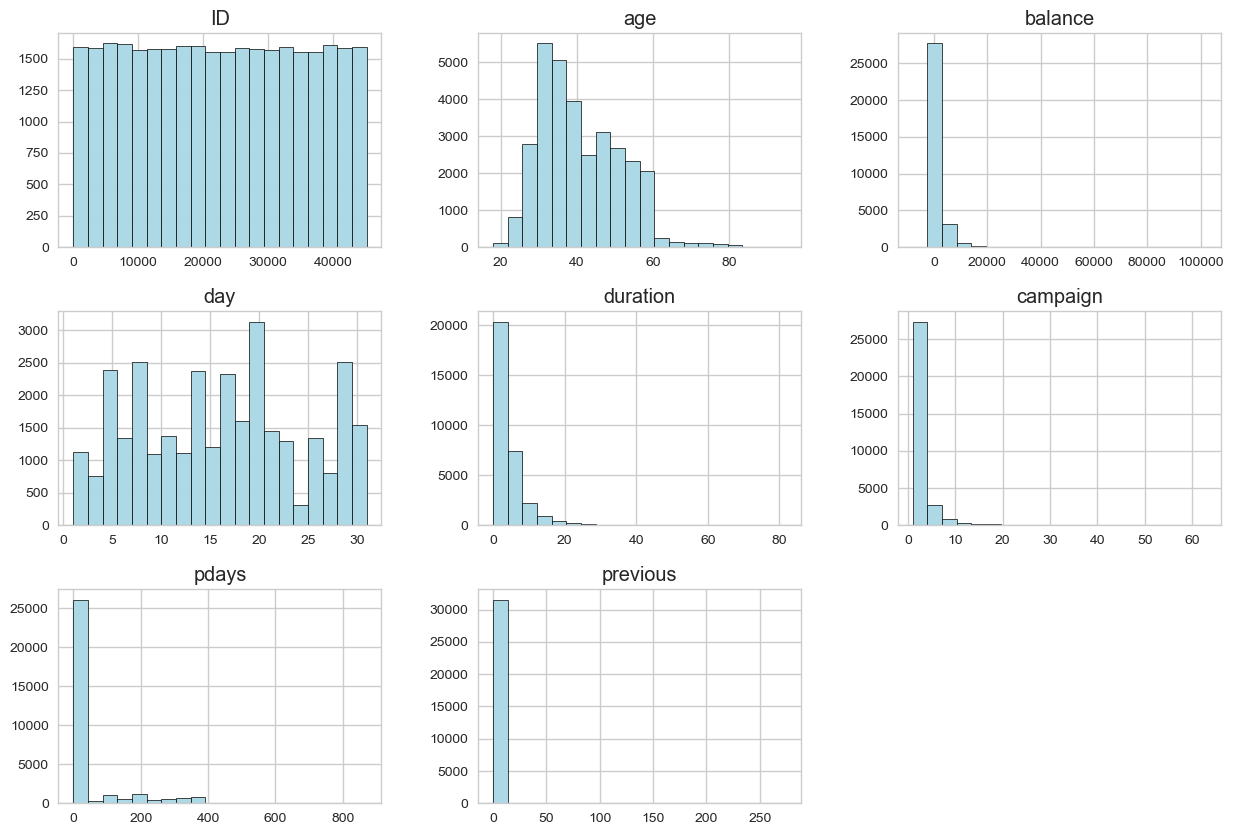

Descriptive stats of duration count    31647.000000
mean         4.301909
std          4.285303
min          0.000000
25%          1.730000
50%          3.000000
75%          5.310000
max         81.970000
Name: duration, dtype: float64
Descriptive stats of campaign count    31647.000000
mean         2.765697
std          3.113830
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64
Descriptive stats of day count    31647.000000
mean        15.835466
std          8.337097
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64
Descriptive stats of no of day past the capaign was last done:  count    31647.000000
mean        39.576042
std         99.317592
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64


In [106]:
#Change the unit of 'duration' from seconds to minutes

newdf = train.copy()

newdf['duration'] = newdf['duration'].apply(lambda n:n/60).round(2)

plt.style.use('seaborn-whitegrid')

newdf.hist(bins=20, figsize=(15,10), color='lightblue', edgecolor = 'black')
plt.show()


#print("Descriptive stats of age",dataframe1['age'].describe())
print("Descriptive stats of duration",newdf['duration'].describe())
print("Descriptive stats of campaign",newdf['campaign'].describe())
print("Descriptive stats of day", newdf['day'].describe())
print("Descriptive stats of no of day past the capaign was last done: ", newdf['pdays'].describe())

# Quick Observation:

    AGE:

Age looks uniformally distributed with small standard deviation.
Majority of the people falls in the age group of 30 to 40, that goes to show that most of them are young professional -33 to 48
years old fall within the 25th to 75th percentiles.
There seems that bank executve has also called up in the age group of 70-90 which are low in numbers but it i a clear error as 
they can't be our target age group who will be ineterested in FD.
It also seems that around 1500-1600 student has also been targeted for fd which is most likely to ignore the fd option we will 
verify that in our bivariate analysis.

Balance:

Balance data is not normally distributed and looks highly skewed and seems to have lot of outliers. We will treat outliers going
forward.
There are around 7K, that is almost 10 % people with negative bank balance which may not be interested in fd at all as they are
struggling with finance. So this needs to be taken care from bank side that the call to such people needs to be minimized .
The distribution of balance has a huge standard deviation relative to the mean, suggesting large variabilities in customers' 
balance levels.

Duration :

    - As observed from the historgram plot, the duration of contact has a median of 3 minutes, with an interquartile range of 
    1.73 minutes to 5.3 minutes. The left-skewed boxplot indicates that most calls are relatively short. Also, there is a large
    number of outliers ranging from 10 minutes to 40 minutes, which are worth further study.

Campaign:

- Median value for no of times bank contacted  to the given customer is 2 times amd max value is 63 times which seems way to 
high than the normal. These clients may have some special requirement i feel. 

Day : seems to be normally dustributed,with median value of 16 being the last day of contact

pday & Other numerical values doesn't help much to infer anything significant here. Infact most of the independent numerical 
attributes has nothing much to descibe().We will have to do bivariate & multivariate analysis to catch some meaningful insights.

# Boxplot(Univariate analysis) : For Numercial Attributes:

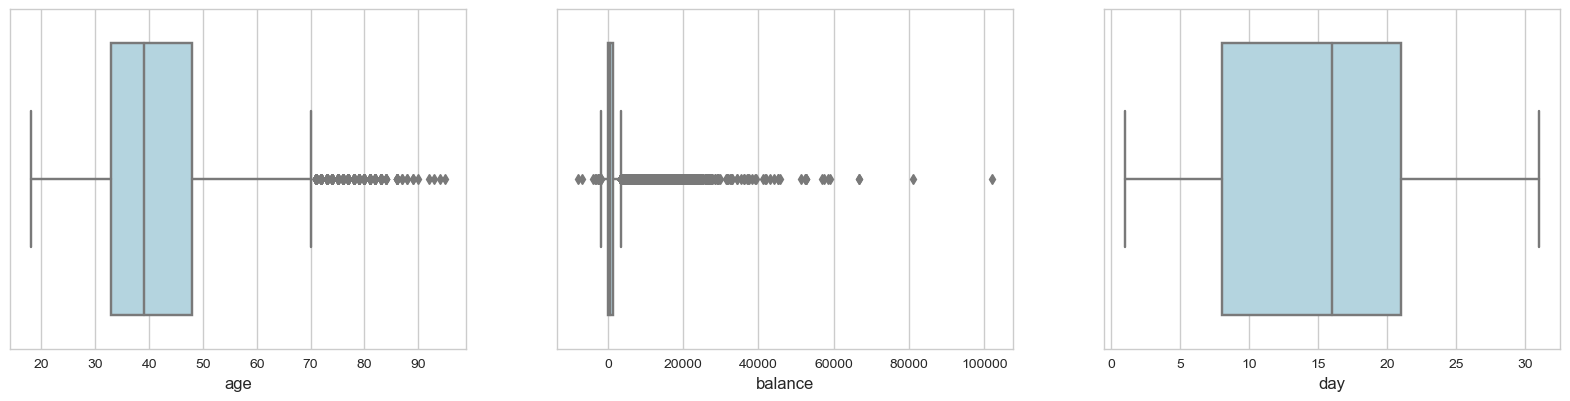

In [107]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.boxplot(x= newdf.age, color='lightblue')

plt.subplot(3,3,2)
sns.boxplot(x= newdf.balance, color='lightblue')

plt.subplot(3,3,3)
sns.boxplot(x= newdf.day, color='lightblue')

plt.show()

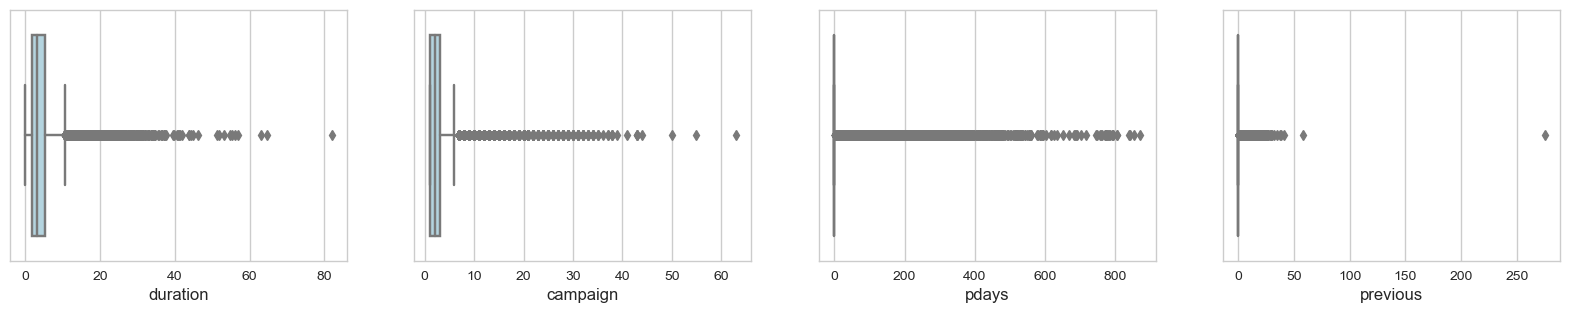

In [108]:
plt.figure(figsize= (20,15))
plt.subplot(4,4,1)
sns.boxplot(x= newdf.duration, color='lightblue')

plt.subplot(4,4,2)
sns.boxplot(x= newdf.campaign, color='lightblue')

plt.subplot(4,4,3)
sns.boxplot(x= newdf.pdays, color='lightblue')

plt.subplot(4,4,4)
sns.boxplot(x= newdf.previous, color='lightblue')

plt.show()

# Quick Insights From Boxplot Univariate distribution:

There seems to be an outlier in age, between the age group 70-90.
Max customer falls in the age range of 32-48 . Median age is very close to 40 which i feel banks have targeted consideringf 
that they will will more aligned to take fd option. but i don't feel so. As the tendency of person nearing retorement or early
starter in professinal, i feel can opt for fd. We will verify that going forward.

In balance attribute there seems to be high level of skewness which we also observed in our histplot analayis. There are some 
extreme outliers brtween 60k euro to 100k euro. There are long tails towards right side so it seems to be highly skewed. 
-Balance attribute needs to be treated for removing the outlier which we will deal next.

Day attribite seems to be normally distributed with no significant outliers as such.
Rest of the numerical attribute doesn,t seems to be significant and are highly skewed with long tail mostly on the right side.
As they are mostly skewed specially pdays and previous days,. There is nothing to statistically find here.

Let's treat outlier in balance attribute below:

# Removing Outler In Balance Attribute:
As we found the oultiers in balance column abive in our descriptive stats , let's find and treat them.
Also let,s print skew values for all numerical attributes
We will make use of zscore here for the same
Outliers are defined as the values which are more than three standard deviations away from the mean

In [114]:
#SKEWNESS

from scipy.stats import zscore
import scipy.stats as stats

#Let's check Skew in all numercial attributes


Skewness = pd.DataFrame({'Skewness' : [stats.skew(dataframe1.age),stats.skew(dataframe1.day),stats.skew(dataframe1.balance),stats.skew(dataframe1.duration),stats.skew(dataframe1.campaign),stats.skew(dataframe1.pdays),stats.skew(dataframe1.previous) ]},
                        index=['age','day','balance', 'duration', 'campaign', 'pdays', 'previous'])  # Measure the skeweness of the required columns
Skewness 

Skewness
age        0.681574
day        0.087181
balance    7.995317
duration   3.199614
campaign   4.873704
pdays      2.642249
previous  49.300011

# Quick Insights:

We will interpret the skewness number, using Bulmer (1979) — a classic — suggests this rule of thumb:

If skewness is less than −1 or greater than +1, the distribution is highly skewed. If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed. If skewness is between −½ and +½, the distribution is approximately symmetric.

- age & day seems to be doing ok in terms of skewness
- while balance , duration, campaign, pdays, previous are highly skewed and seems to have lot of outlier

We visualized the outliers and skewness when we plotted the distributon of the numercial data using boxplot above.

We managed to get rid to some extreme outlier shown below. 


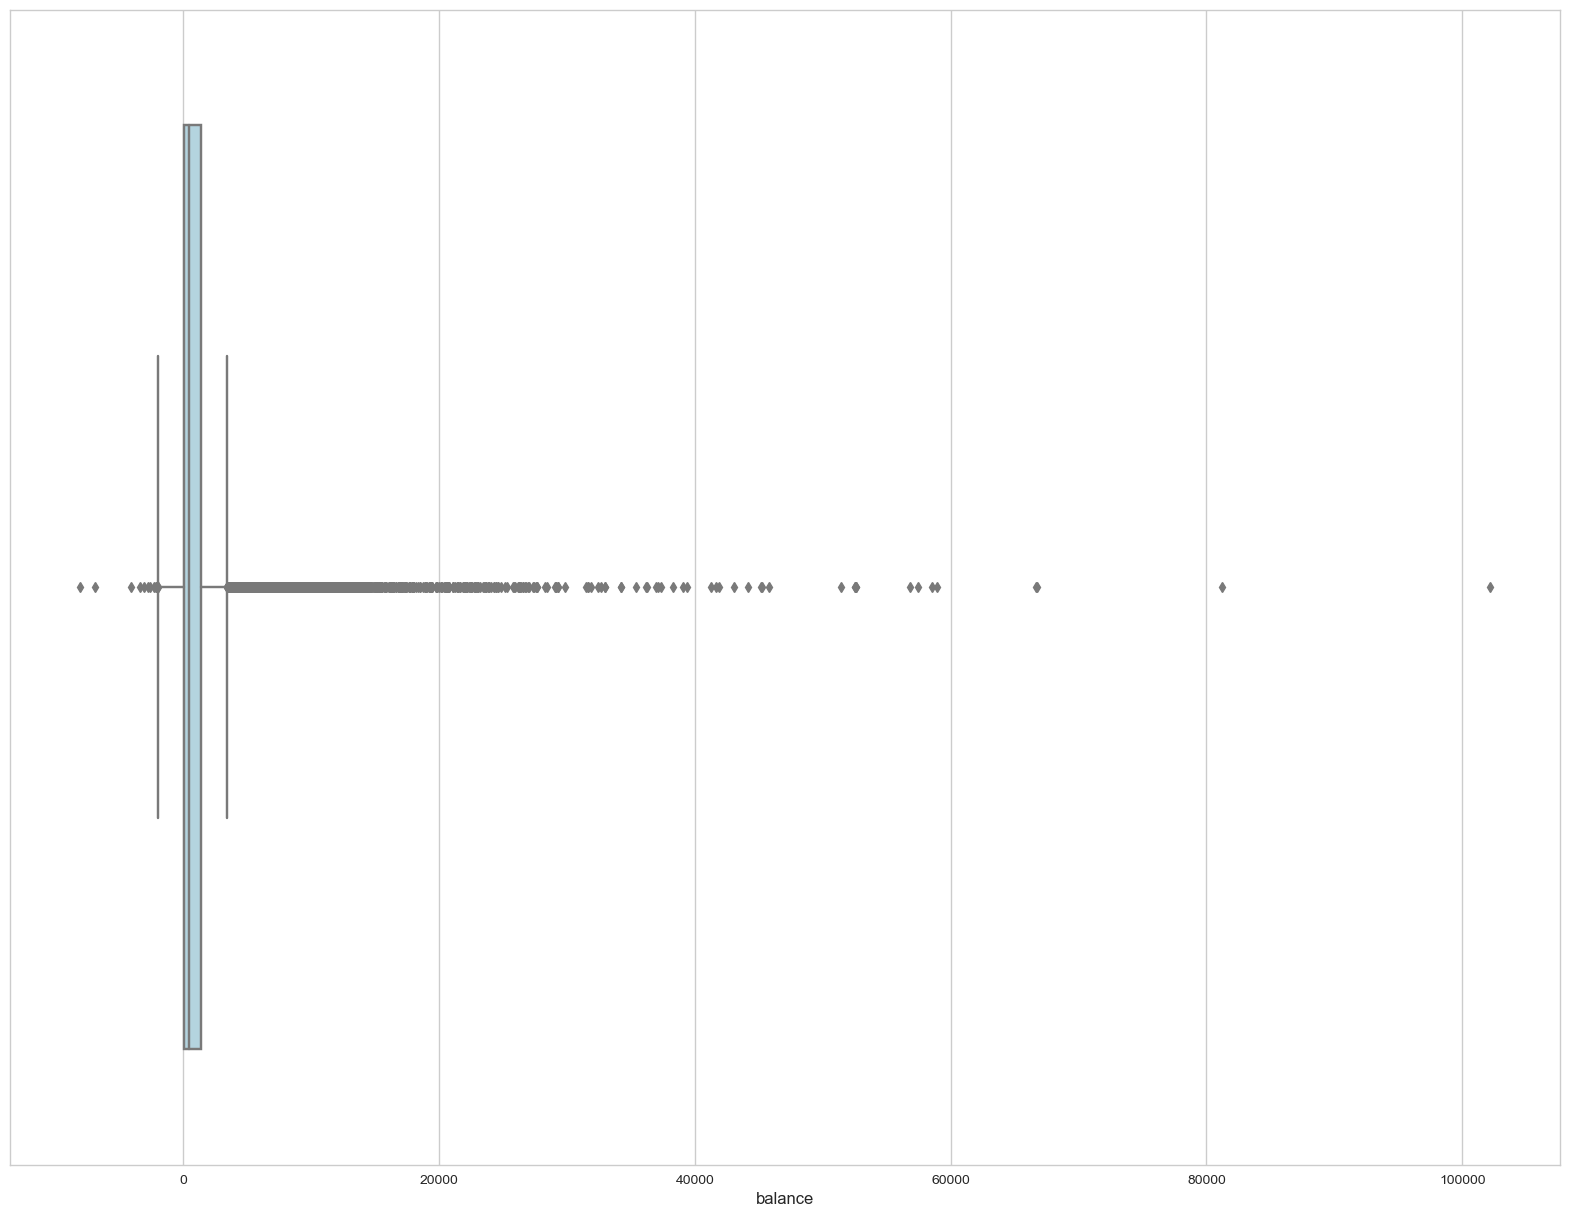

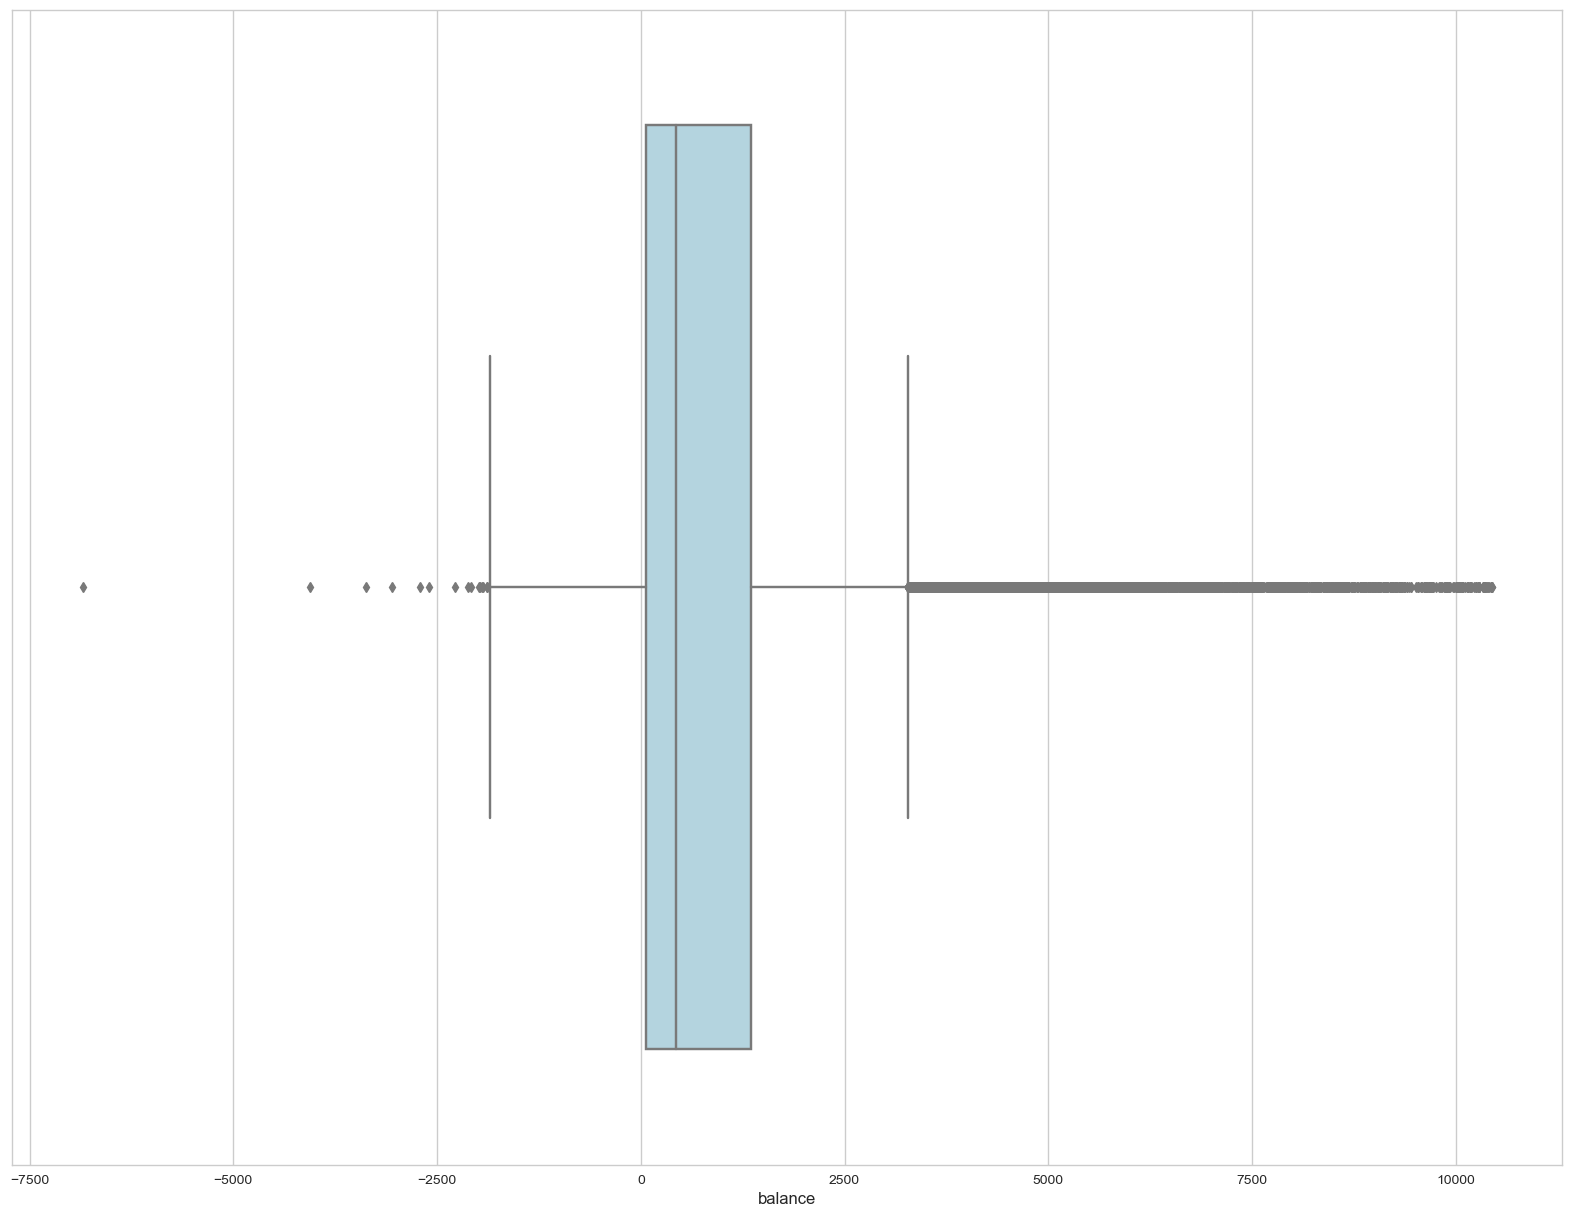

In [110]:
#Removing outliers in balance data using zscore:

from scipy.stats import zscore

newdf[['balance']].mean()
newdf[['balance']].mean()

newdf['balance_outliers'] = newdf['balance']
newdf['balance_outliers']= zscore(newdf['balance_outliers'])

condition1 = (newdf['balance_outliers']>3) | (newdf['balance_outliers']<-3 )
newdf1 = newdf.drop(newdf[condition1].index, axis = 0, inplace = False)
newdf2 = newdf1.drop('balance_outliers', axis=1)

#original one 
plt.figure(figsize= (20,15))
sns.boxplot(x= newdf.balance, color='lightblue')

#After outlier treatment using z score

plt.figure(figsize= (20,15))
sns.boxplot(x= newdf2.balance, color='lightblue')
print("We managed to get rid to some extreme outlier shown below. ")

In [115]:
#CHECKING UPPER ROWS:
objdf = newdf.select_dtypes(include ='object') 
objdf.head(5)

job   marital  education default housing loan    contact month  \
0      admin.   married    unknown      no      no   no  telephone   nov   
1     unknown   married  secondary      no      no   no   cellular   jul   
2    services   married  secondary      no     yes   no   cellular   jul   
3  management  divorced   tertiary      no      no   no   cellular   jun   
4  technician   married  secondary      no     yes   no   cellular   feb   

  poutcome subscribed  
0  unknown         no  
1  unknown         no  
2  unknown         no  
3  success        yes  
4  unknown         no

# Univariate Analysis: Categorical Data
We will be making use of countplot to visulaize categorical distribution of the data

job count distribution :  blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: job, dtype: int64

x1 marital attribute count:  married     19095
single       8922
divorced     3630
Name: marital, dtype: int64

x2 education level count distribution:  secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: education, dtype: int64

x3 Credit default count distribution:  no     31062
yes      585
Name: default, dtype: int64

x4 housing loan count distribution:  yes    17584
no     14063
Name: housing, dtype: int64

Personal loan count distribution:  no     26516
yes     5131
Name: loan, dtype: int64


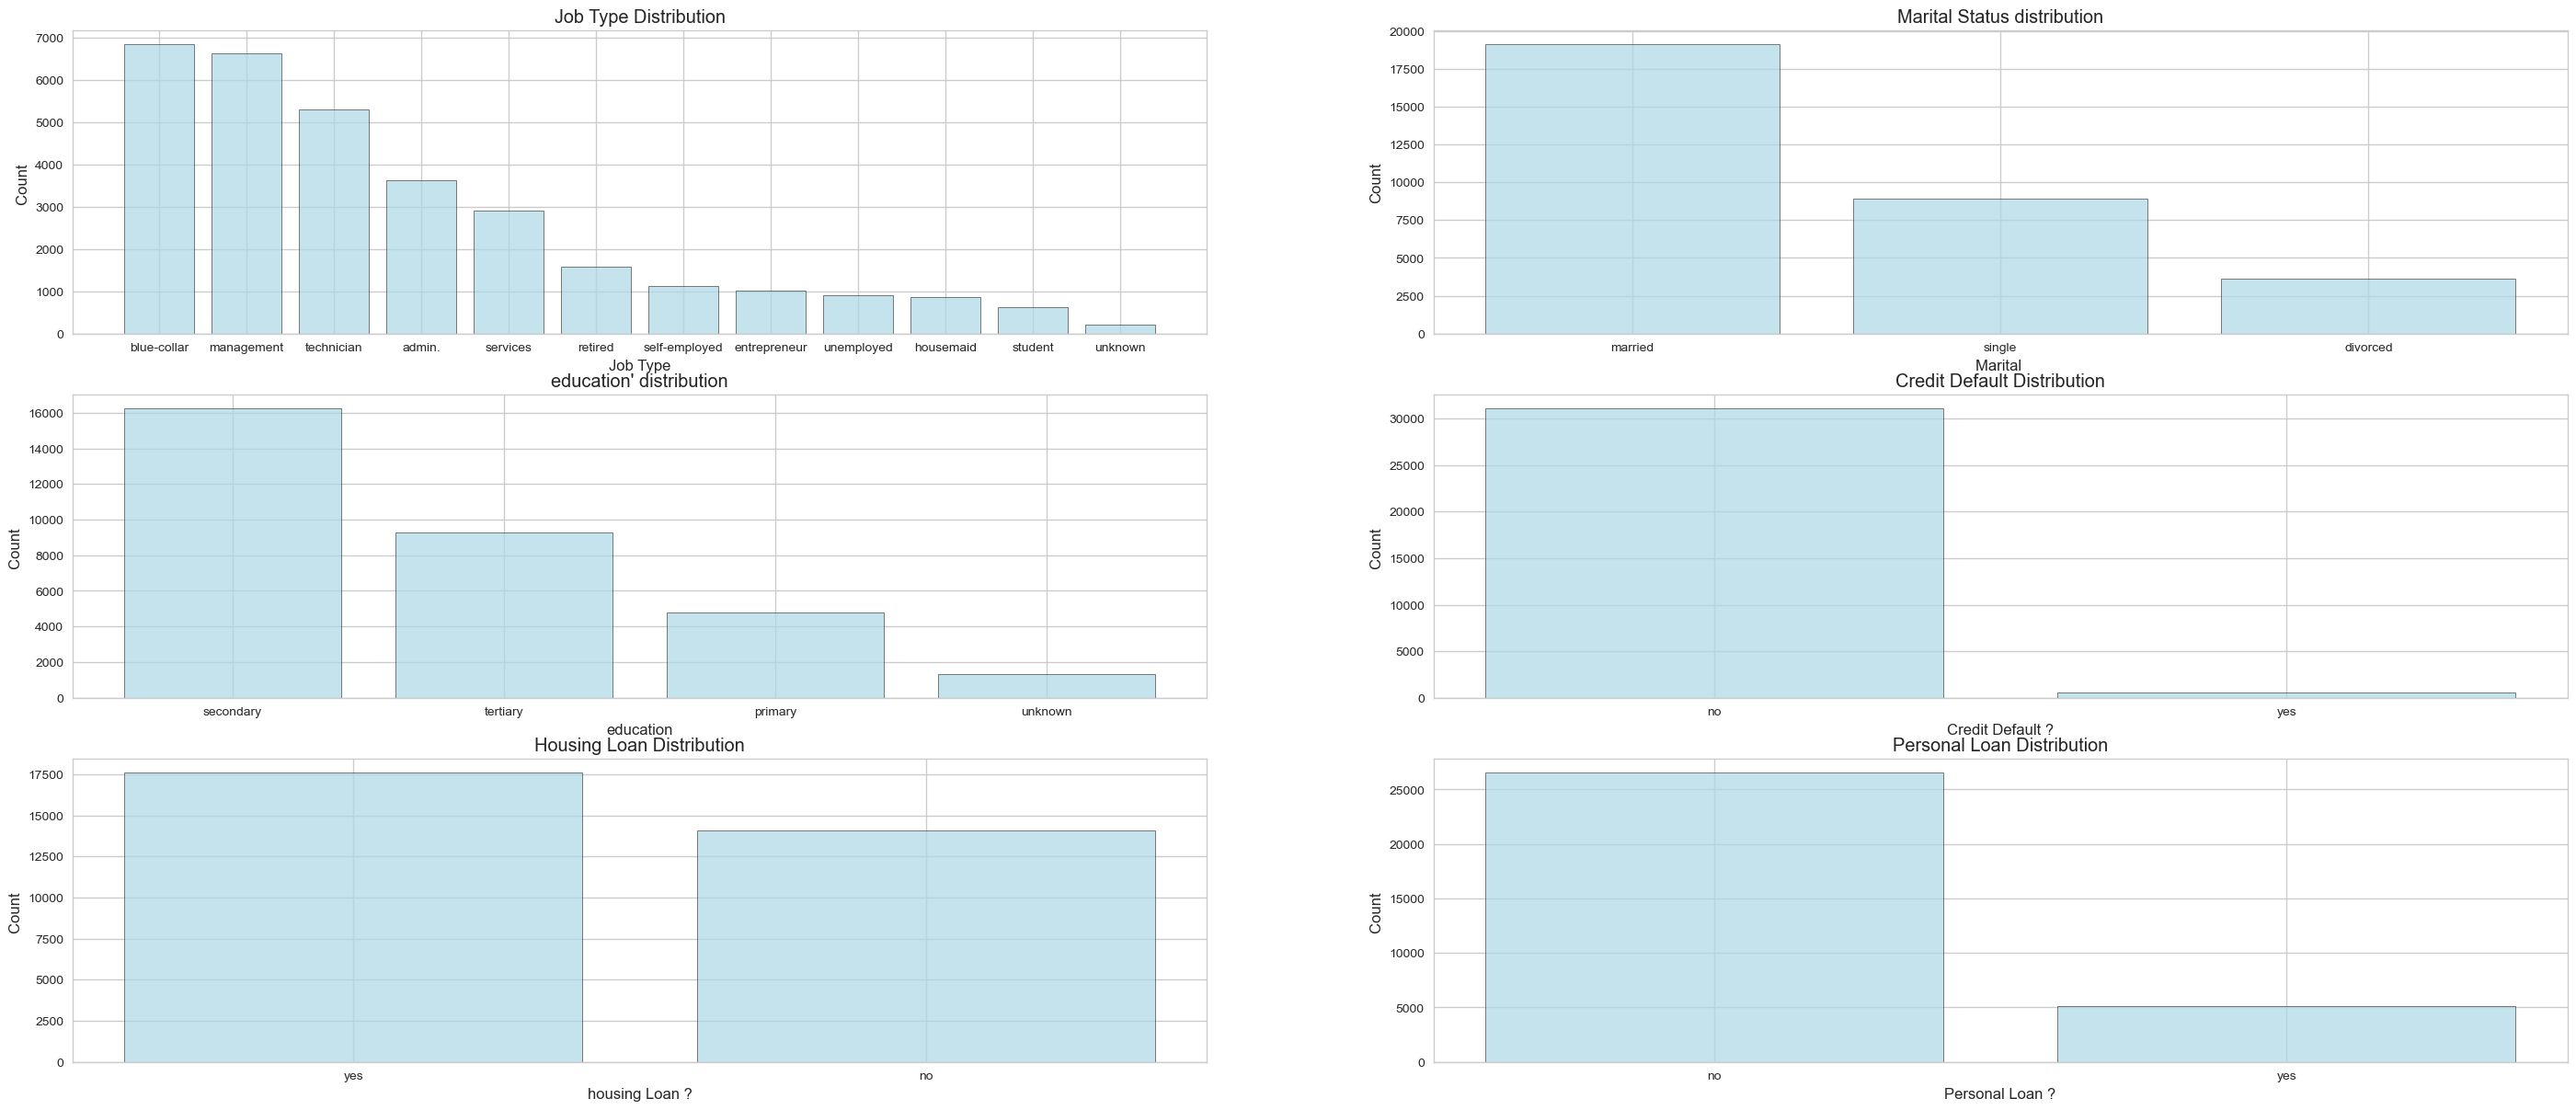

In [116]:
plt.figure(figsize=(35,30))

#Job category

x = newdf.job.value_counts().index    #Values for x-axis
print("job count distribution : ", newdf.job.value_counts())
y = [newdf['job'].value_counts()[i] for i in x]   # Count of each class on y-axis

plt.subplot(6,2,1)
plt.bar(x,y, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Job Type')
plt.ylabel('Count ')
plt.title('Job Type Distribution')


#Marital Status 
x1 = newdf.marital.value_counts().index    #Values for x-axis
y1 = [newdf['marital'].value_counts()[j] for j in x1]   # Count of each class on y-axis

print("\nx1 marital attribute count: ", newdf.marital.value_counts())
plt.subplot(6,2,2)
plt.bar(x1,y1, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Marital ')
plt.ylabel('Count')
plt.title('Marital Status distribution')

#education level

x2 = newdf.education.value_counts().index    #Values for x-axis
y2 = [newdf['education'].value_counts()[k] for k in x2]   # Count of each class on y-axis

print("\nx2 education level count distribution: ", newdf.education.value_counts())

plt.subplot(6,2,3)
plt.bar(x2,y2, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('education')
plt.ylabel('Count ')
plt.title("education' distribution")

#credit defaulter or not?

x3 = newdf.default.value_counts().index    #Values for x-axis
y3 = [newdf['default'].value_counts()[l] for l in x3]   # Count of each class on y-axis

print("\nx3 Credit default count distribution: ", newdf.default.value_counts())
plt.subplot(6,2,4)
plt.bar(x3,y3, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Credit Default ?')
plt.ylabel('Count ')
plt.title("Credit Default Distribution")

#housing loan availed or not 

x4 = newdf.housing.value_counts().index    #Values for x-axis
y4 = [newdf['housing'].value_counts()[m] for m in x4]   # Count of each class on y-axis

print("\nx4 housing loan count distribution: ", newdf.housing.value_counts())
plt.subplot(6,2,5)
plt.bar(x4,y4, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('housing Loan ?')
plt.ylabel('Count ')
plt.title("Housing Loan Distribution")

#Personal Loan
x5 = newdf.loan.value_counts().index    #Values for x-axis
y5 = [newdf['loan'].value_counts()[n] for n in x5]   # Count of each class on y-axis
print("\nPersonal loan count distribution: ", newdf.loan.value_counts())
plt.subplot(6,2,6)
plt.bar(x5,y5, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Personal Loan ?')
plt.ylabel('Count ')
plt.title("Personal Loan Distribution")
plt.show()


In [ ]:
Quick Observation On The Above Categorical PlotJob Type Distribution:

blue-collar 9732 management 9458 technician 7597 admin. 5171 services 4154 retired 2264 self-employed 1579 entrepreneur 1487 
unemployed 1303 housemaid 1240 student 938 unknown 288

Job:

Blue-Collar, Management professionals & technicican jobs are in majority which were targeted by the bank.
There are some cutomers who are unemployed, housemaid, student which were also targeted, which is not the good move as mostly 
they will not convert as fd customer. Though they are not significant in numbers
There are few unknowns(around 220) people who were targeted, which don't seems to be a value addition so these needs to be 
ignored
There are also some entrepreneurs and self-employed people which i feel will be hard to convert as fd customer. Chance of
entrepreneurs and sel-employed person having FD i feel will be low. We will be verifying
that when we do the bivariate analysis on categorical values using Target as hue.
MaritalStataus:

married 27214 single 12790 divorced 5207

ALmost 50% counting to 27214, customers are married which is as expected as they are more saving conscious.
28 % people are single , we expect more convesion rate from young single working professional,we will verify that when we do 
bivariate analysis
There are some broken customers who are divorced, they account for 11 %, we should not expect them to convert to fd customers. 
That we will check going forward.
EDUCATION:

Education Level Distribution:

secondary 23202 tertiary 13301 primary 6851 unknown 1857

It seems that around 51 % of the targeted customers are having secondar level of education and around 29 % customers are having
qualification beyoind 12th class. It means that the targeted customers 51 % with secondary level education is somewhat not as 
per expectation and the campaign will not bear fruitful result. We neded to rethink the target audience here. Our focus should 
be more on working profesionals whose qualification will be beyound secondary level.

We also found some unknown customers whose level of education is not clear this needs to be ignored or resampled.

Arounf 6851 customers are still studying and should not be our target audience.They are very less liskely to take fd option. We
will verify the same going forward.

Credit Default:

Distribution: No : 44396 yes : 815

- It is good to see that almost 98 %  of the targeted customers don't default 
 - Only 815 out 45211 people are defaulter and are not credit worthy. These people needs to be ignored while targeting for fd 
    conversion. 

PERSONAL LOAN: no 37967 yes 7244

- 83 % customers have no personal loan lying with them only 17% people who were targeted have personal loan availed. We will 
see if people with no PL may have availed FD or not when we do bivariate analysis. I feel they are more likely to avail FD as 
compared to person who already have PL on their head to pay. 

# -Subplot:


Distribution Of Mode Of Communication With Customers:  cellular     20423
unknown       9177
telephone     2047
Name: contact, dtype: int64

Distribution Of communication result:  unknown    25929
failure     3362
other       1288
success     1068
Name: poutcome, dtype: int64

Distribution Of monthly customer contact detail :  may    9669
jul    4844
aug    4333
jun    3738
nov    2783
apr    2055
feb    1827
jan     977
oct     512
sep     410
mar     342
dec     157
Name: month, dtype: int64

Distribution Of customer W.R.T FD :  no     27932
yes     3715
Name: subscribed, dtype: int64


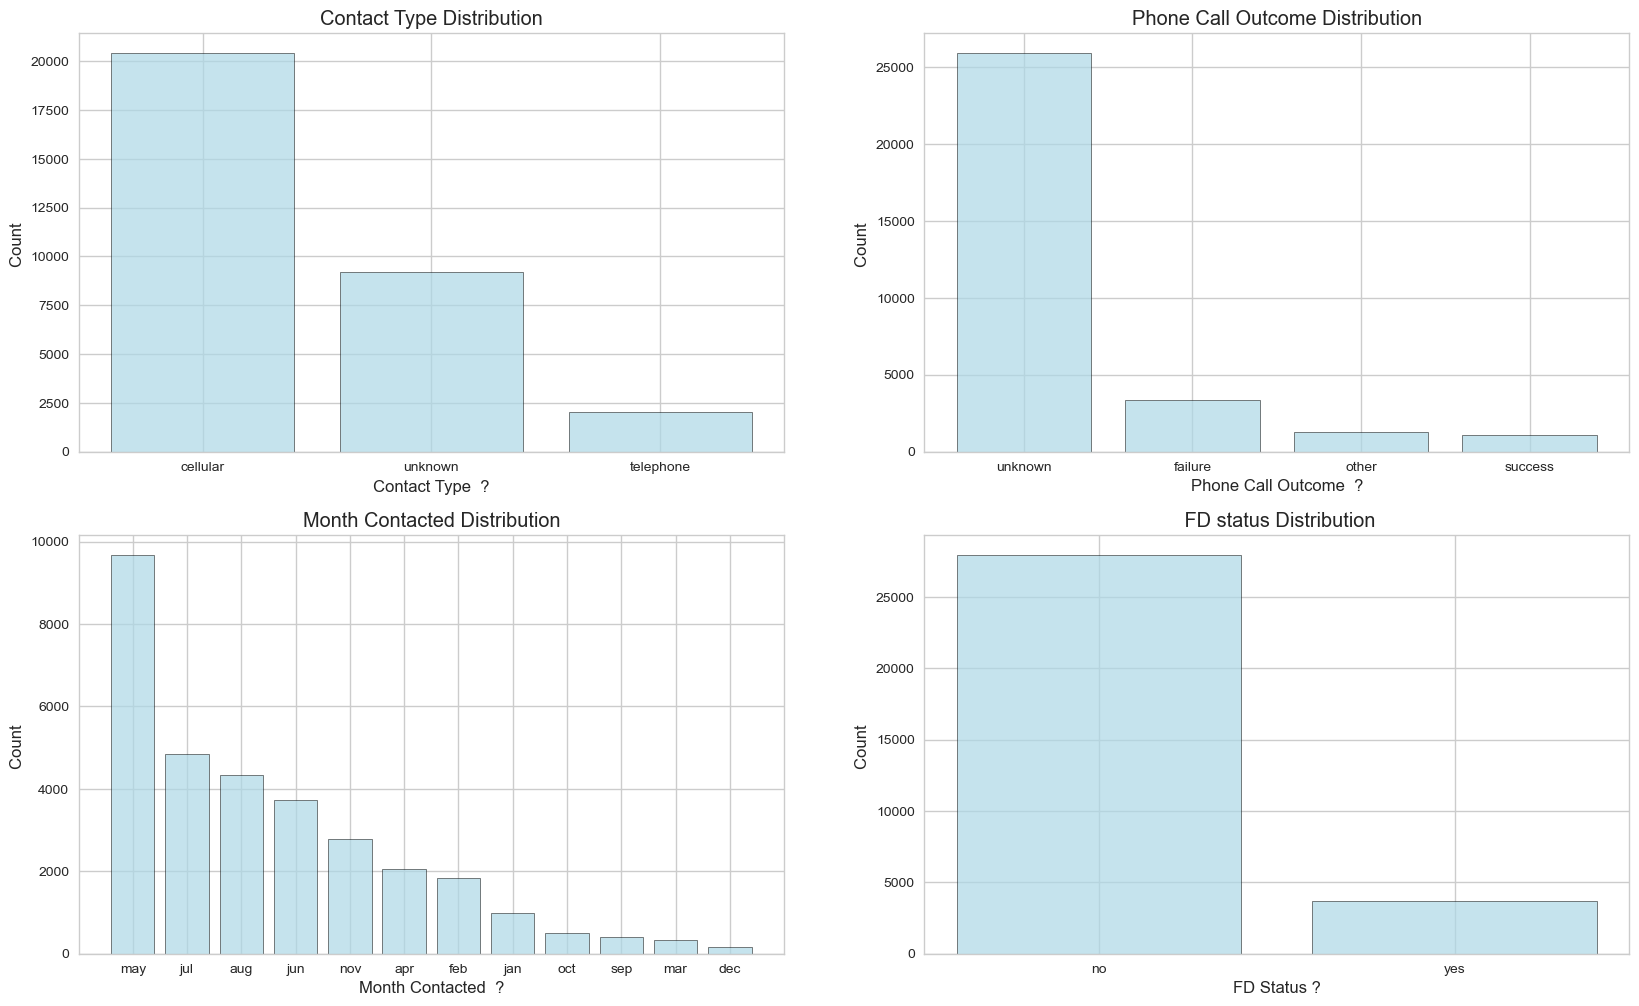

In [122]:
plt.figure(figsize=(20,25))

#Mode of communication with customers
x6 = newdf.contact.value_counts().index    #Values for x-axis
y6 = [newdf['contact'].value_counts()[o] for o in x6]   # Count of each class on y-axis

print("\nDistribution Of Mode Of Communication With Customers: ", newdf.contact.value_counts())

plt.subplot(4,2,1)
plt.bar(x6,y6, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Contact Type  ?')
plt.ylabel('Count ')
plt.title("Contact Type Distribution")

#communication result

x7 = newdf.poutcome.value_counts().index    #Values for x-axis
y7 = [newdf['poutcome'].value_counts()[p] for p in x7]   # Count of each class on y-axis

print("\nDistribution Of communication result: ", newdf.poutcome.value_counts())

plt.subplot(4,2,2)
plt.bar(x7,y7, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Phone Call Outcome  ?')
plt.ylabel('Count ')
plt.title("Phone Call Outcome Distribution")

#month when customer was last contacted

x8 = newdf.month.value_counts().index    #Values for x-axis
y8 = [newdf['month'].value_counts()[q] for q in x8]   # Count of each class on y-axis

print("\nDistribution Of monthly customer contact detail : ", newdf.month.value_counts())
plt.subplot(4,2,3)
plt.bar(x8,y8, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Month Contacted  ?')
plt.ylabel('Count ')
plt.title("Month Contacted Distribution")


#FD status Which is our target variable

x9 = newdf.subscribed.value_counts().index    #Values for x-axis
y9 = [newdf['subscribed'].value_counts()[r] for r in x9]   # Count of each class on y-axis

print("\nDistribution Of customer W.R.T FD : ", newdf.subscribed.value_counts())
plt.subplot(4,2,4)
plt.bar(x9,y9, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('FD Status ?')
plt.ylabel('Count ')
plt.title(" FD status Distribution")

plt.show()

In [ ]:
-Quick Observation On Above Category Plot :

# Mode Of Communication With Customer:
cellular 29285 unknown 13020 telephone 2906

- Around 64 % mobile phone was used to contact potential customer. It will be interesting to see what was the call duration for
the same, as it will impact the conversion rate to larger extent
- Almost 28 % people mode of communication has ot been captured as needed with unknown categorization . These data don't seems
to add any value as we don't know how to infer the outcome here. We need to resample this data to make sense and as this 
accounts for significant potion of the customer. 
- Landline as expected has very low share as a mode of client communication. It gos to show that mobile has overpowered any 
other mode of people communication including the legendary landline. 

Phone Call Outcome:
unknown 36959 failure 4901 other 1840 success 1511

- It seems that large share of poutcome result which accounts for 80 % has not been captured meaningfully. This makes outcome 
as an attribute very insignificant to measure and gain any insight
- The entire exercise to convert potentoal customer has not performed to the expecations as paltry 1511 person only responded 
positive. 
- This attribute needs to be resampled or ignored 

Month Wise Distribution , in a given year When Customer Was Last Contacted
may 13766 jul 6895 aug 6247 jun 5341 nov 3970 apr 2932 feb 2649 jan 1403 oct 738 sep 579 mar 477 dec 214.

May month seems to have more frequency(13766) where banl connected to the potential customer for FD campaign. It can be also 
dure to previous year financial closing and to add new customers for FD instrument, to increase bank revenue.

Jun, July , August also have far share but not as mich compared to may month.

Frequency of customer contact seems to be droppong as the month progreses after may in a given year. Specially dec month.
March also has very frequency where bank contacted potential customer which looks as expected beacuse of financial year closing.

Target(FD) Variable : no : 39922 yes: 5289

- 88 % of the contacted customers seems to be not interested in FD which usually is the case specially for young customers due
to low rate of interest. Also we have see the data distribution of various attributwe where many unkown records existed which 
are not at all adding to the analysis.
So the  result is not surprising. Here data is imbalanced mostly classified in favour of NO. This situation may lead to high 
accuracy score and lots of model error for individual clasification models.

Ensemble model where it combines many model seems to be the right solution to compensate the error rate and build string model.
We will see this going forward.

# BIVARIATE ANALYSIS:
Bivariate analysis is the simultaneous analysis of two variables (attributes). It explores the concept of relationship between
two variables, whether there exists an association and the strength of this association, or whether there are differences
between two variables and the significance of these differences.

We Will See how each attribute impacts each other using bivariate boxplot & Scatter Plot Ananlysis:

# Let us see the count of customers who subscribed to FD based on their age
We Will making using of count plot with Target var as hue.

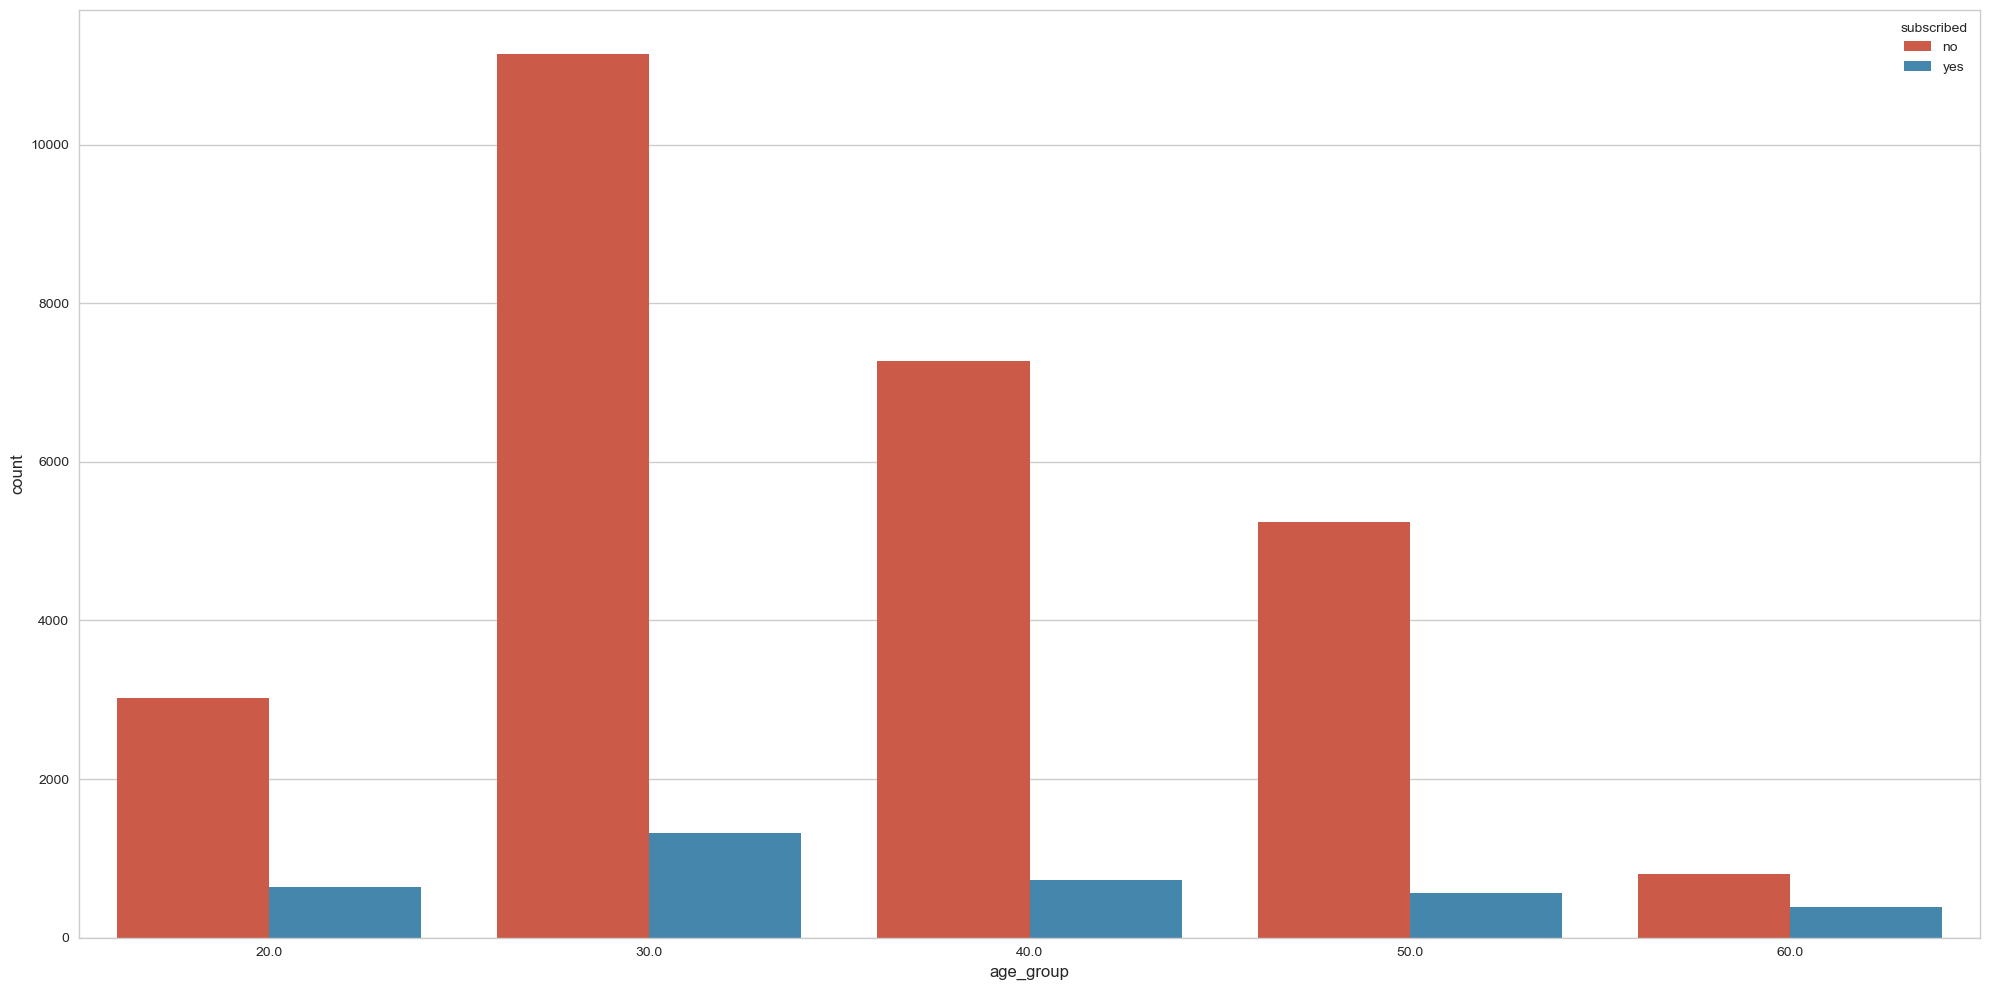

In [128]:
# 1. FD Subscribers Age Distribution: 

#But First Let's Craete Age Grouping: 

lst = [newdf2]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60
    
    count_age_response_pct = pd.crosstab(newdf2['subscribed'],newdf2['age_group']).apply(lambda x: x/x.sum() * 100)
    
count_age_response_pct = count_age_response_pct.transpose() 

age = pd.DataFrame(newdf2['age_group'].value_counts())
age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% FD subscribed'] = count_age_response_pct['yes']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)


plt.figure(figsize=(20,10))
sns.countplot(newdf2['age_group'], hue = "subscribed", data=newdf2)
plt.tight_layout()

Quick Insights:

- FD subscription rate is higher among young people between the age of 30-40 , but one should also consider the fact that 
distribution of sampled data is imbalanced in terms of no & yes. Given this fact people with 60 and beyond also has fared well 
in term s of FD subscription

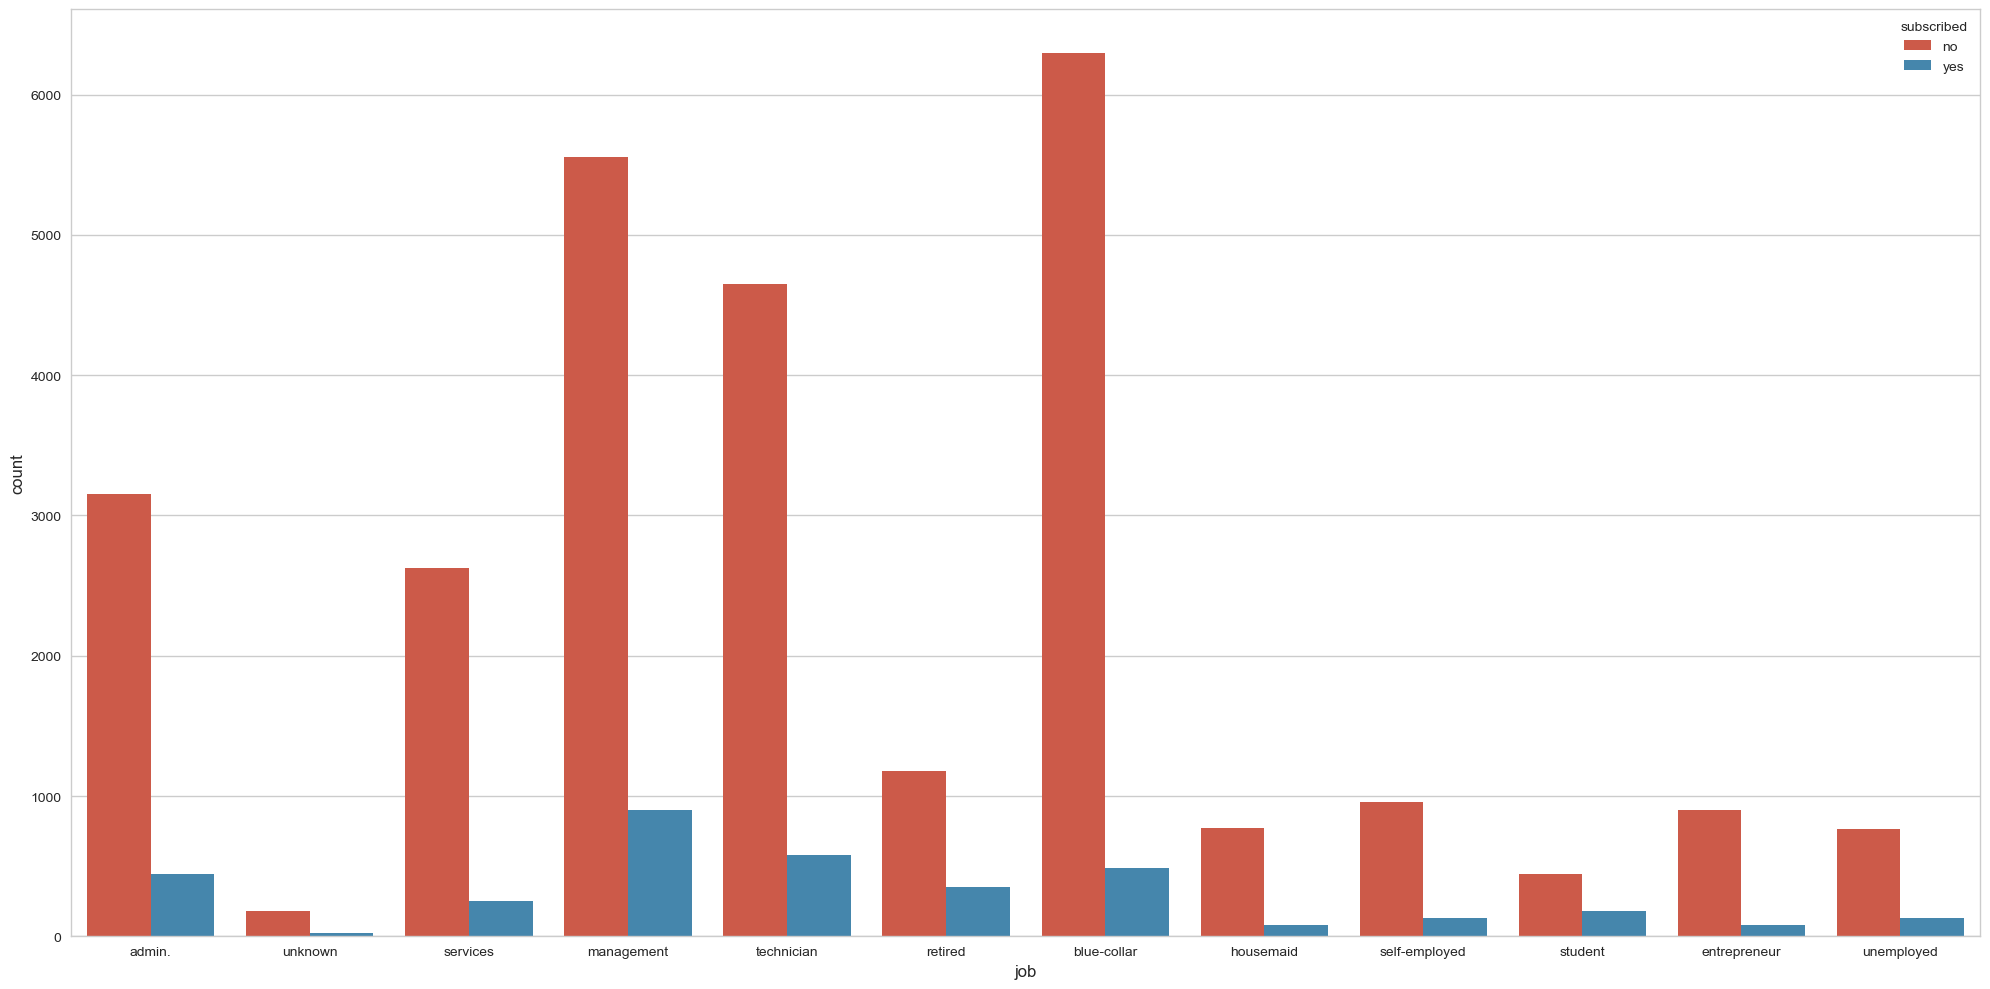

In [130]:
# Let us see the count of customers who subscribed to FD based on their job profile


plt.figure(figsize=(20,10))
sns.countplot(newdf2.job, hue = "subscribed", data=newdf2)
plt.tight_layout()


Quick Insights:

  - Management professional seems to be more likely to avail FD option here. 
  - Technician also seems to faring well along with blue collar professionals.   

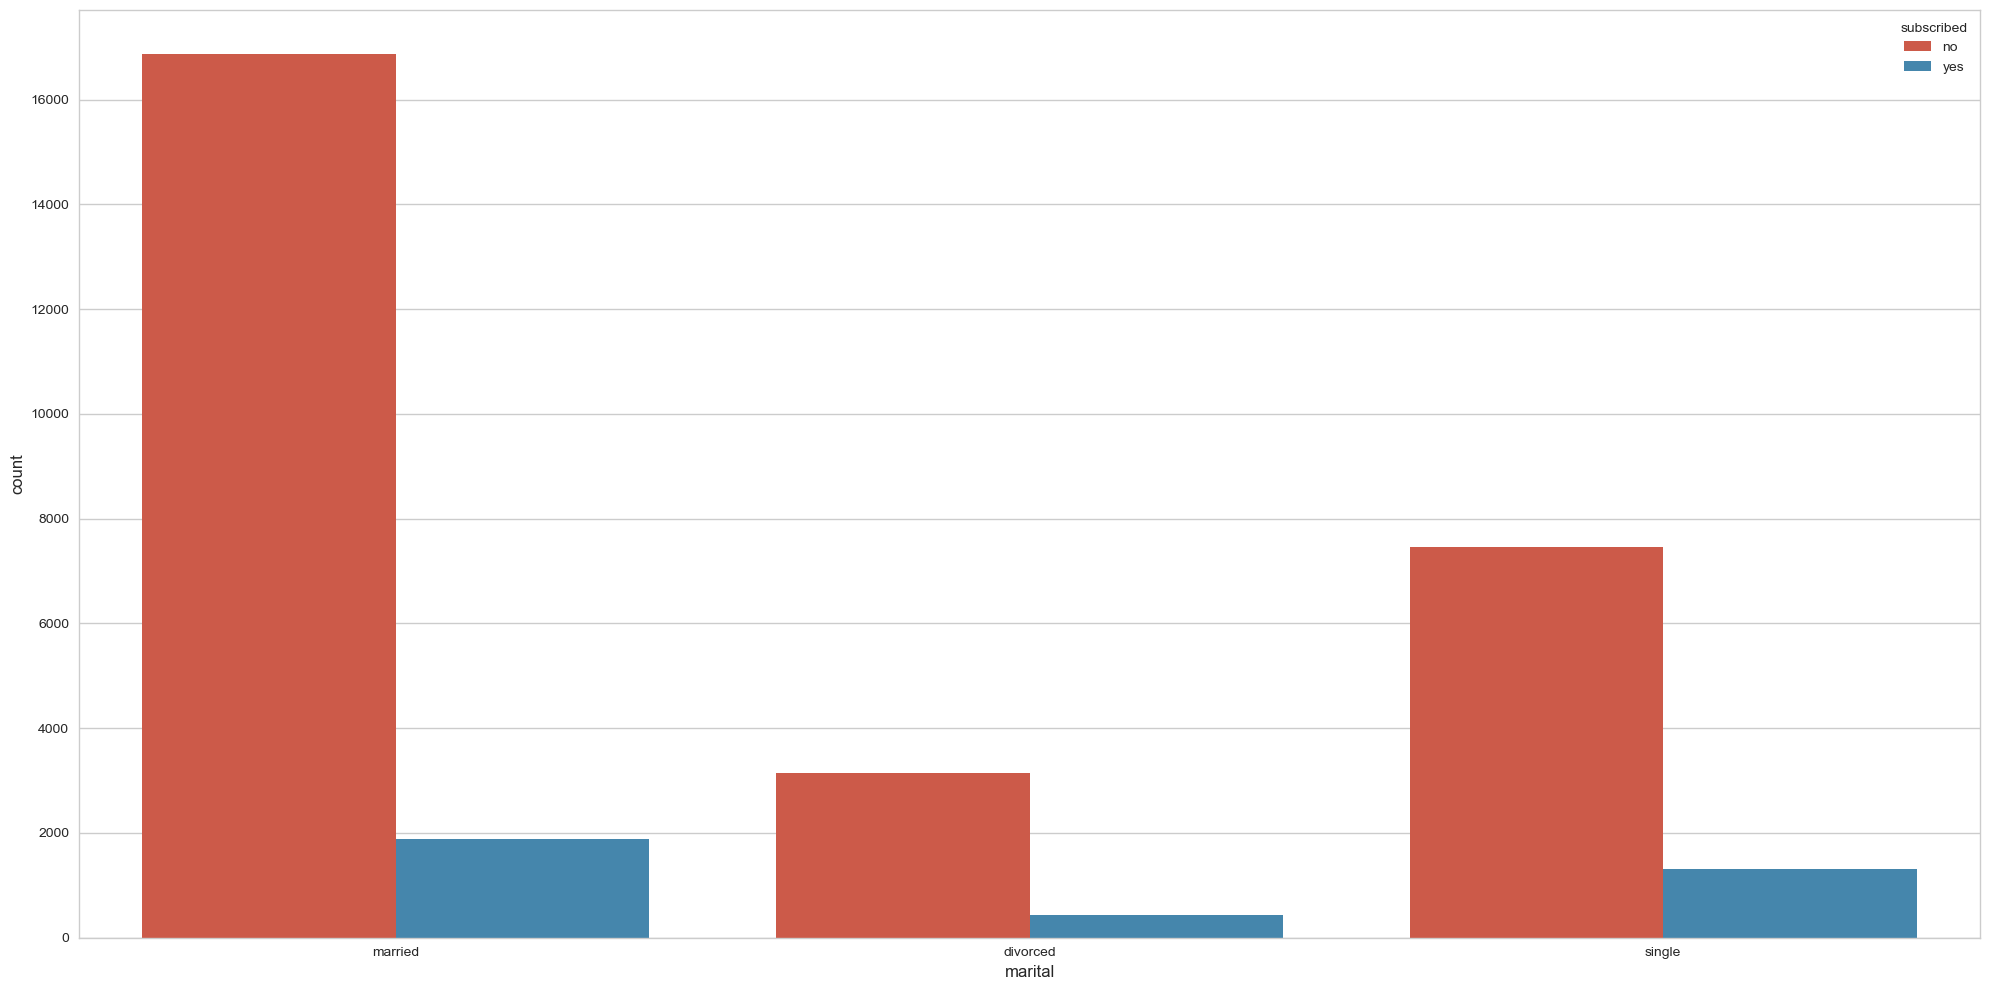

In [132]:
# Let us see the count of customers who subscribed to FD based on their Marital Status


plt.figure(figsize=(20,10))
sns.countplot(newdf2.marital, hue = "subscribed", data=newdf2)
plt.tight_layout()

Marital Status Impacts On FD Subscription :

Married customers has higher fd subscription, divorced people are broken and are less likely to avail FD

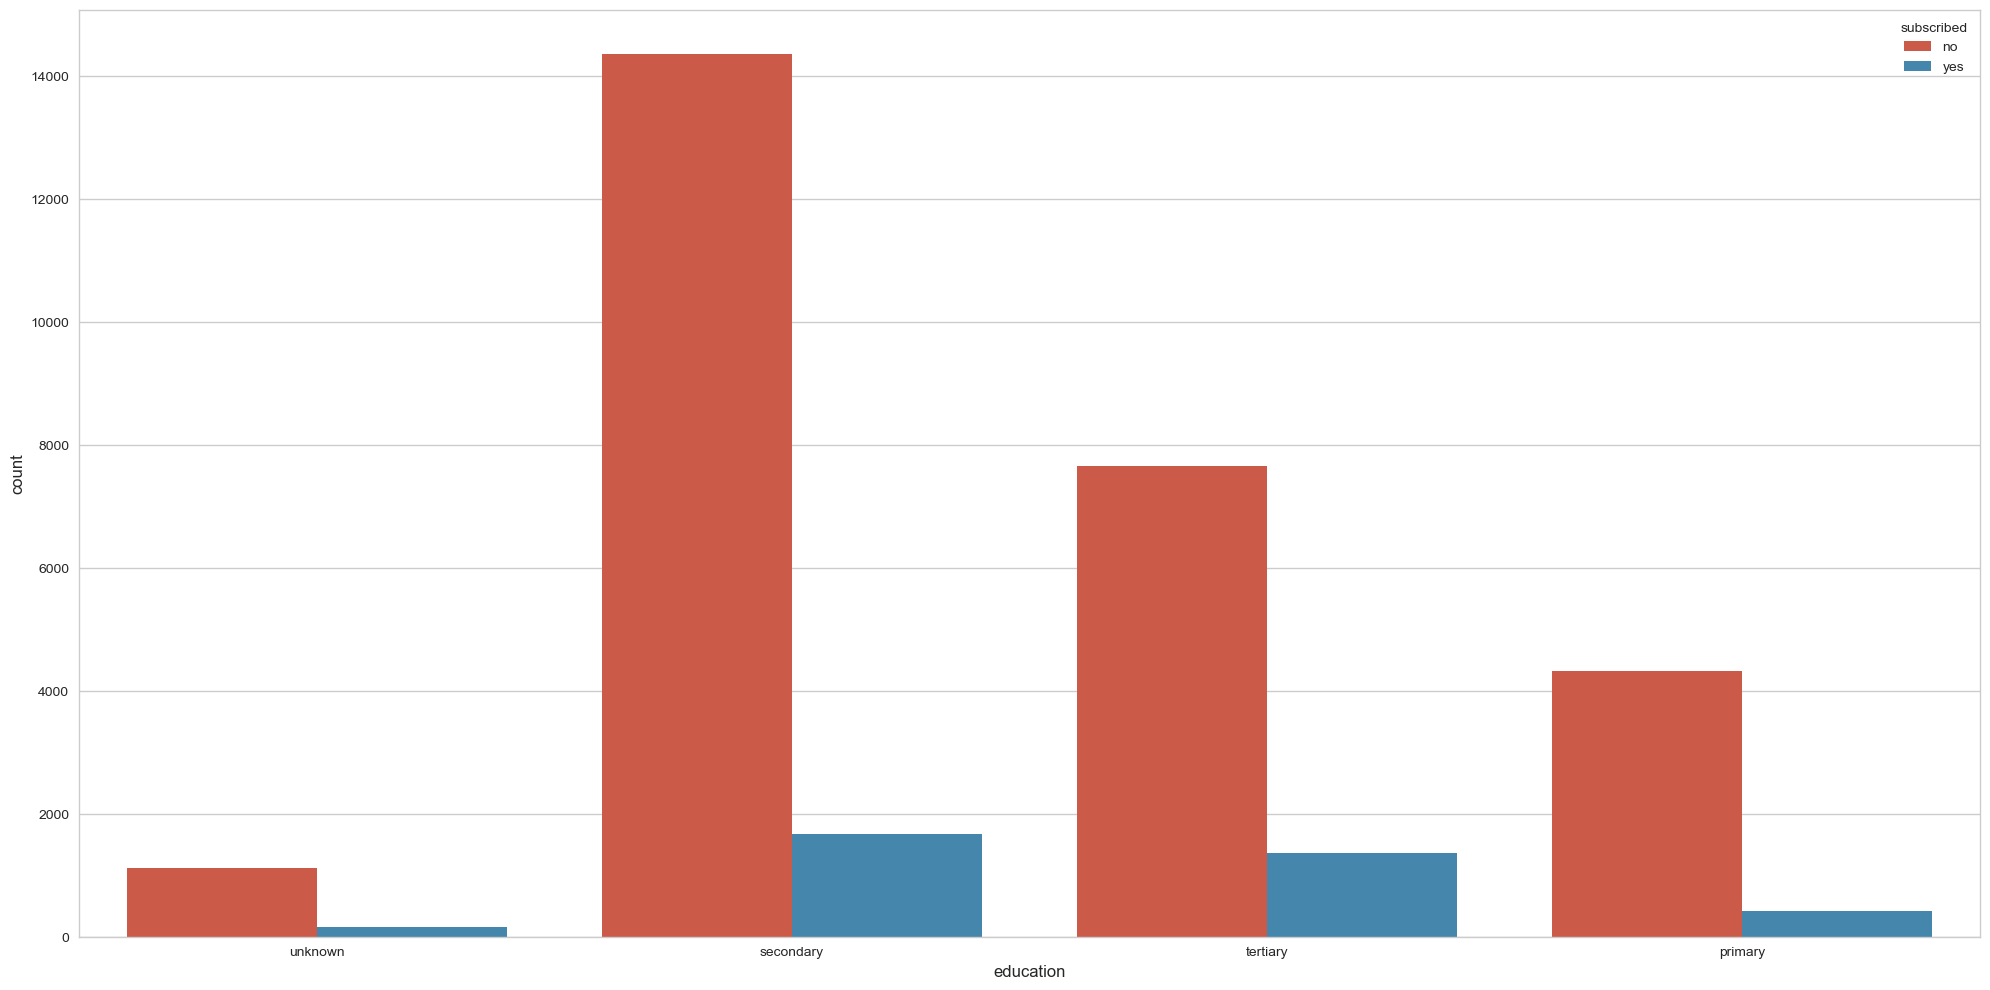

In [133]:
# Let us see the count of customers who subscribed to FD based on their education level


plt.figure(figsize=(20,10))
sns.countplot(newdf2.education, hue = "subscribed", data=newdf2)
plt.tight_layout()

Quick Insights:

Higher the education level higher is the rate of Fd subscription

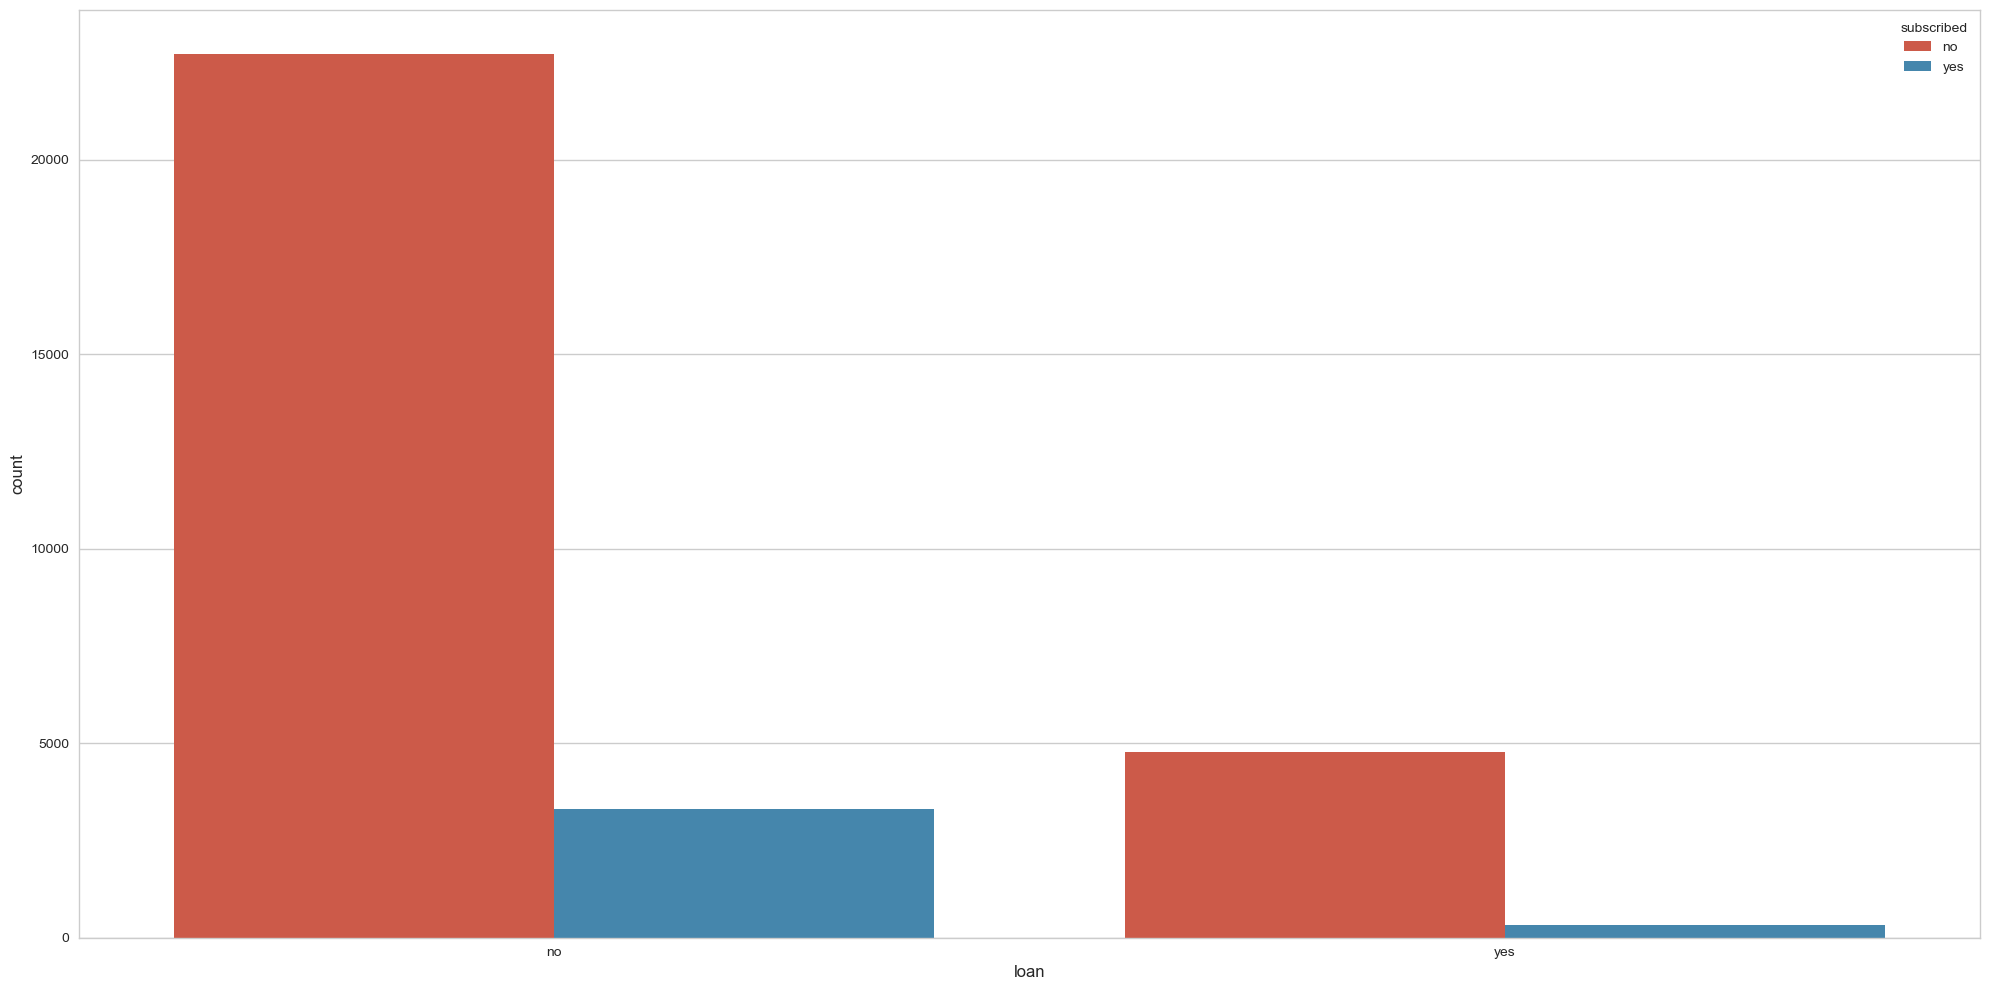

In [135]:
# Let us see the count of customers who subscribed to FD based on their Personal Loan Status


plt.figure(figsize=(20,10))
sns.countplot(newdf2.loan, hue = "subscribed", data=newdf2)
plt.tight_layout()

Quick Insights:

Customer with no Personal loan has higher FD subscription Rate.

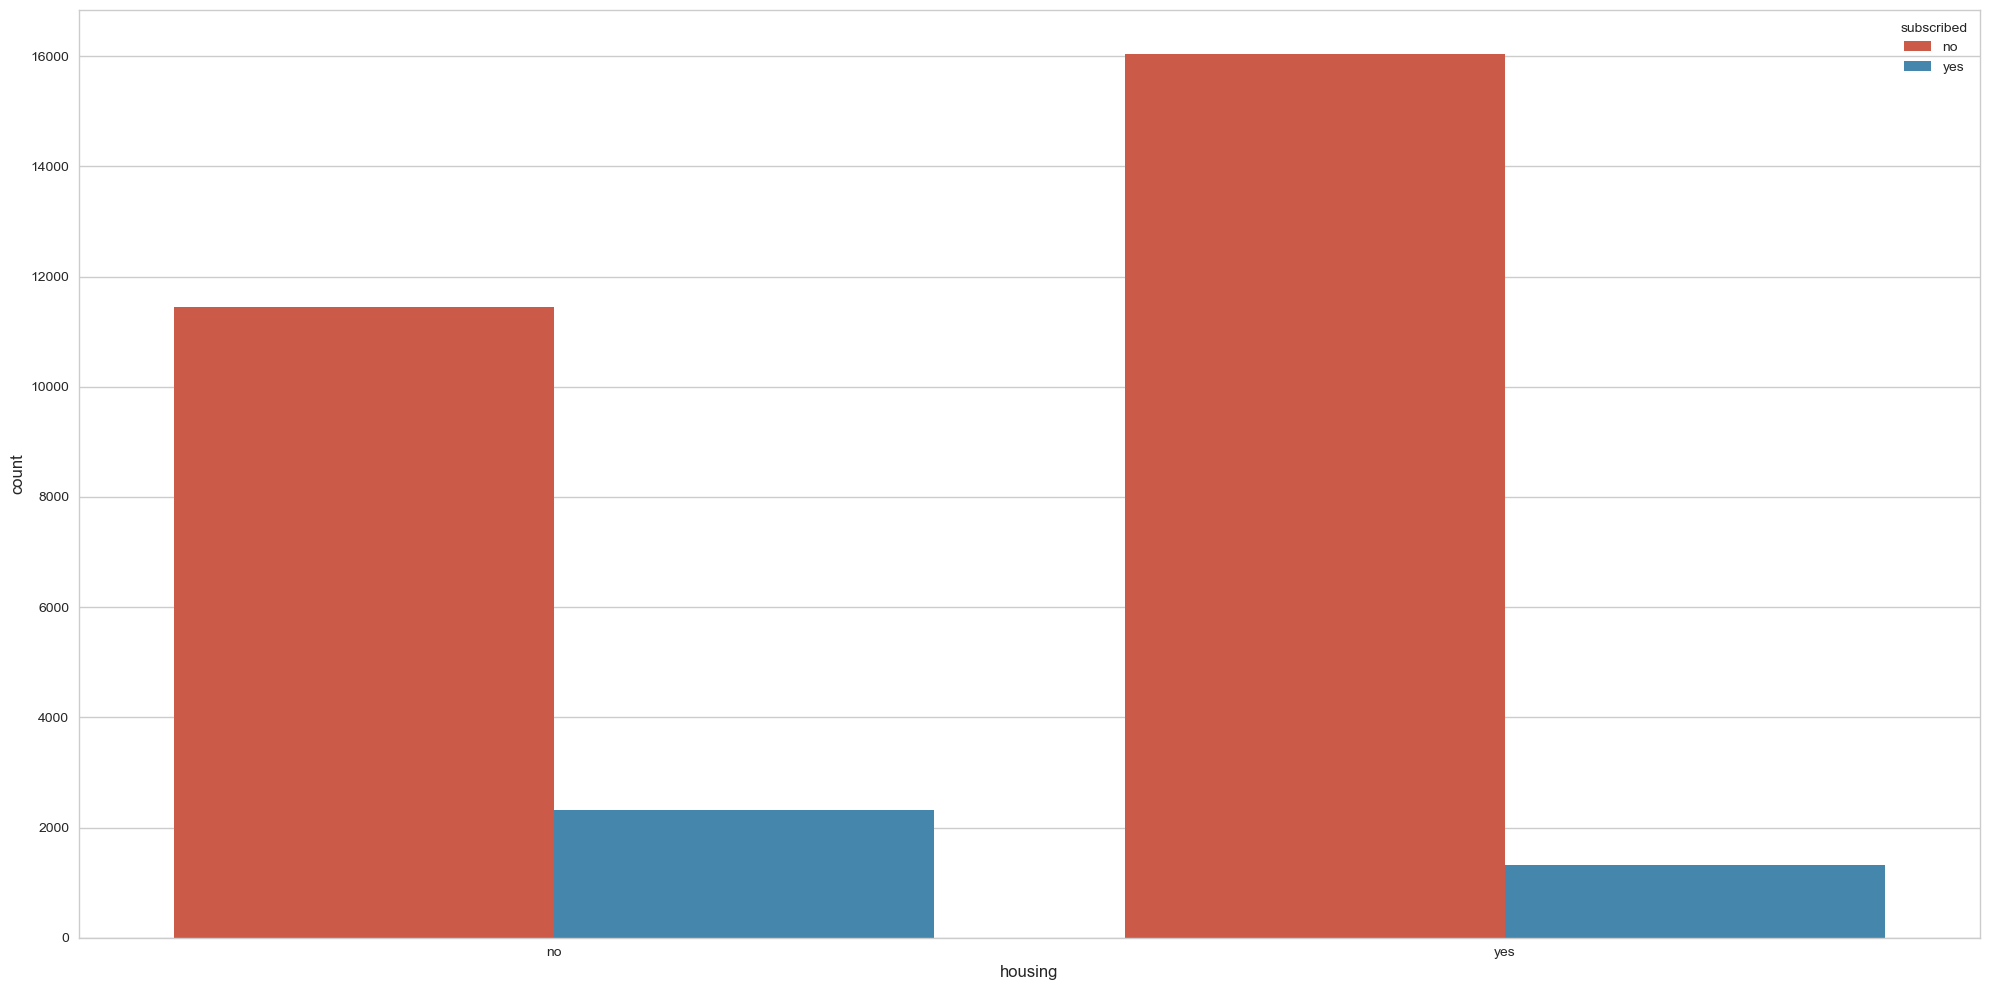

In [137]:
# Let us see the count of customers who subscribed to FD based on their Housing Loan Status


plt.figure(figsize=(20,10))
sns.countplot(newdf2.housing, hue = "subscribed", data=newdf2)
plt.tight_layout()

Quick Insights:

Person who has past housing loan seems to avoid FD option as compared to those who doesn,t have Housinh loan

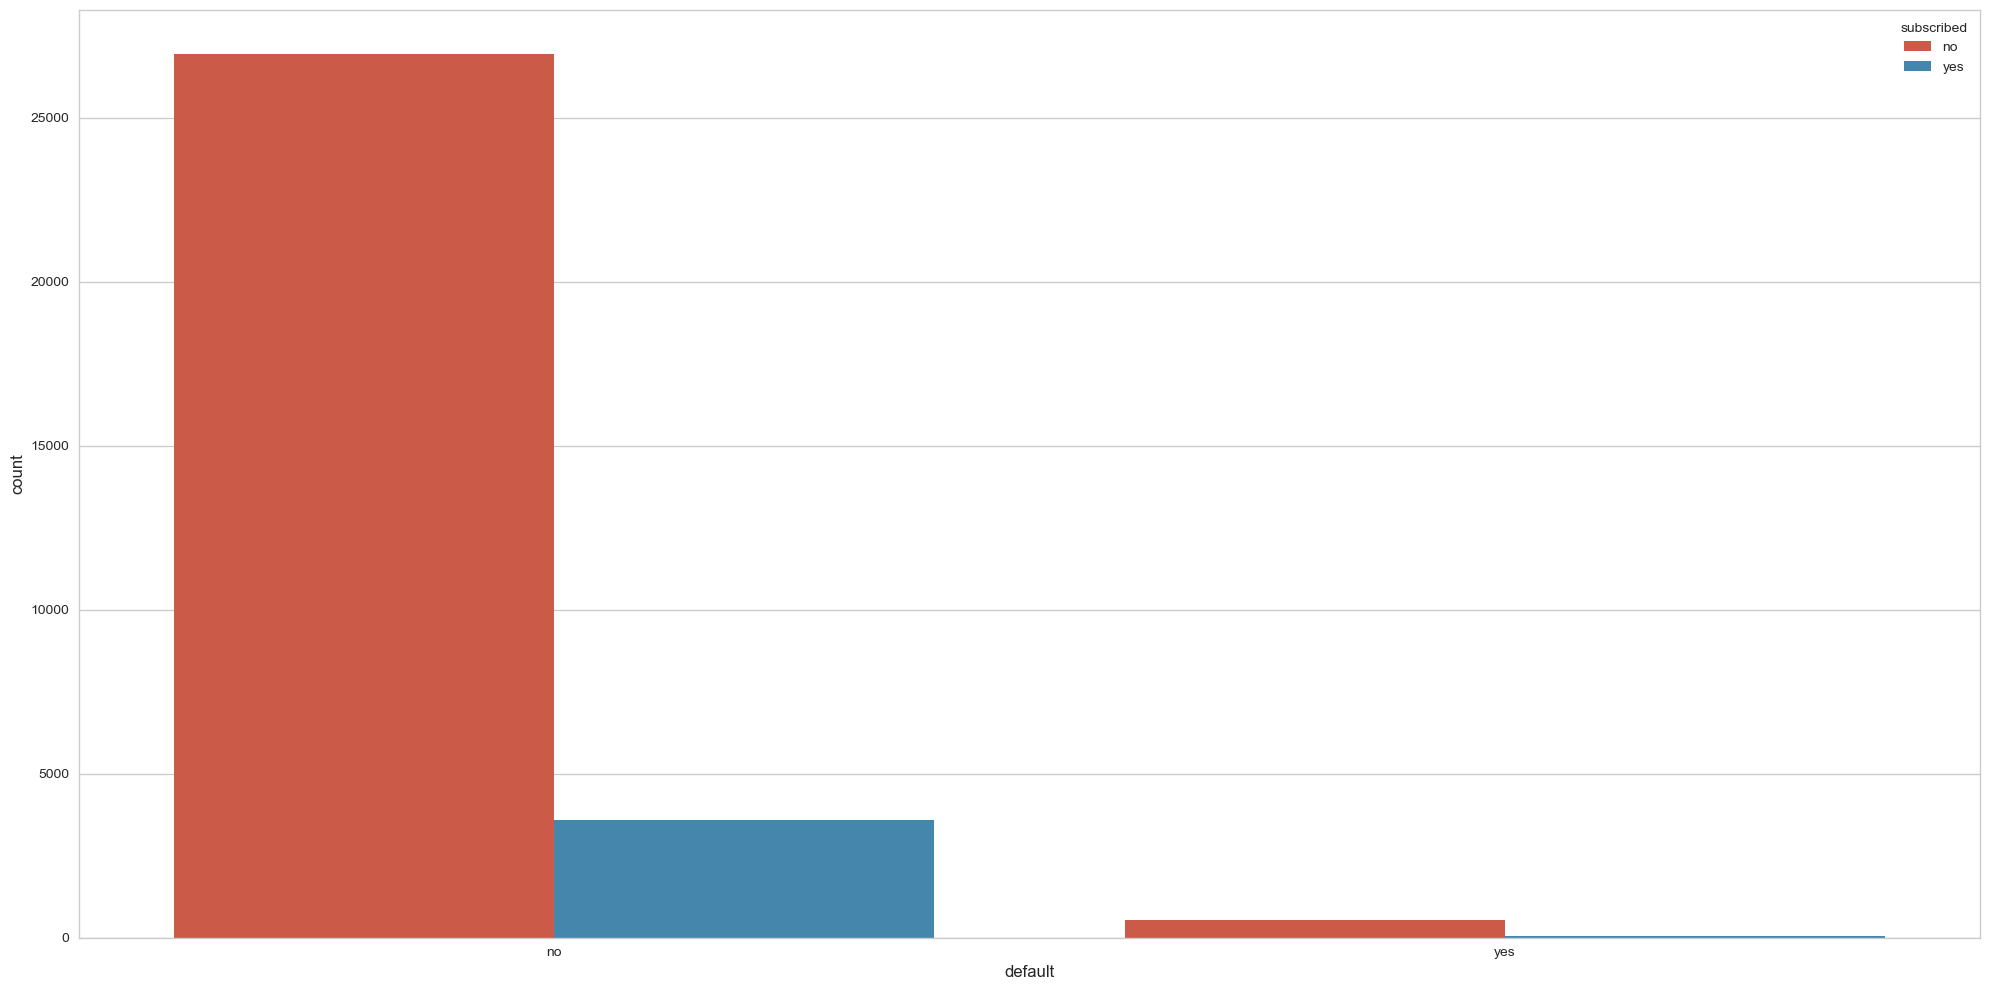

In [138]:
# Let us see the count of customers who subscribed to FD based on their Credit Default  Status


plt.figure(figsize=(20,10))
sns.countplot(newdf2.default, hue = "subscribed", data=newdf2)
plt.tight_layout()

Quick Insights:

 - As expected customer with no default history are more liley to opt for FD

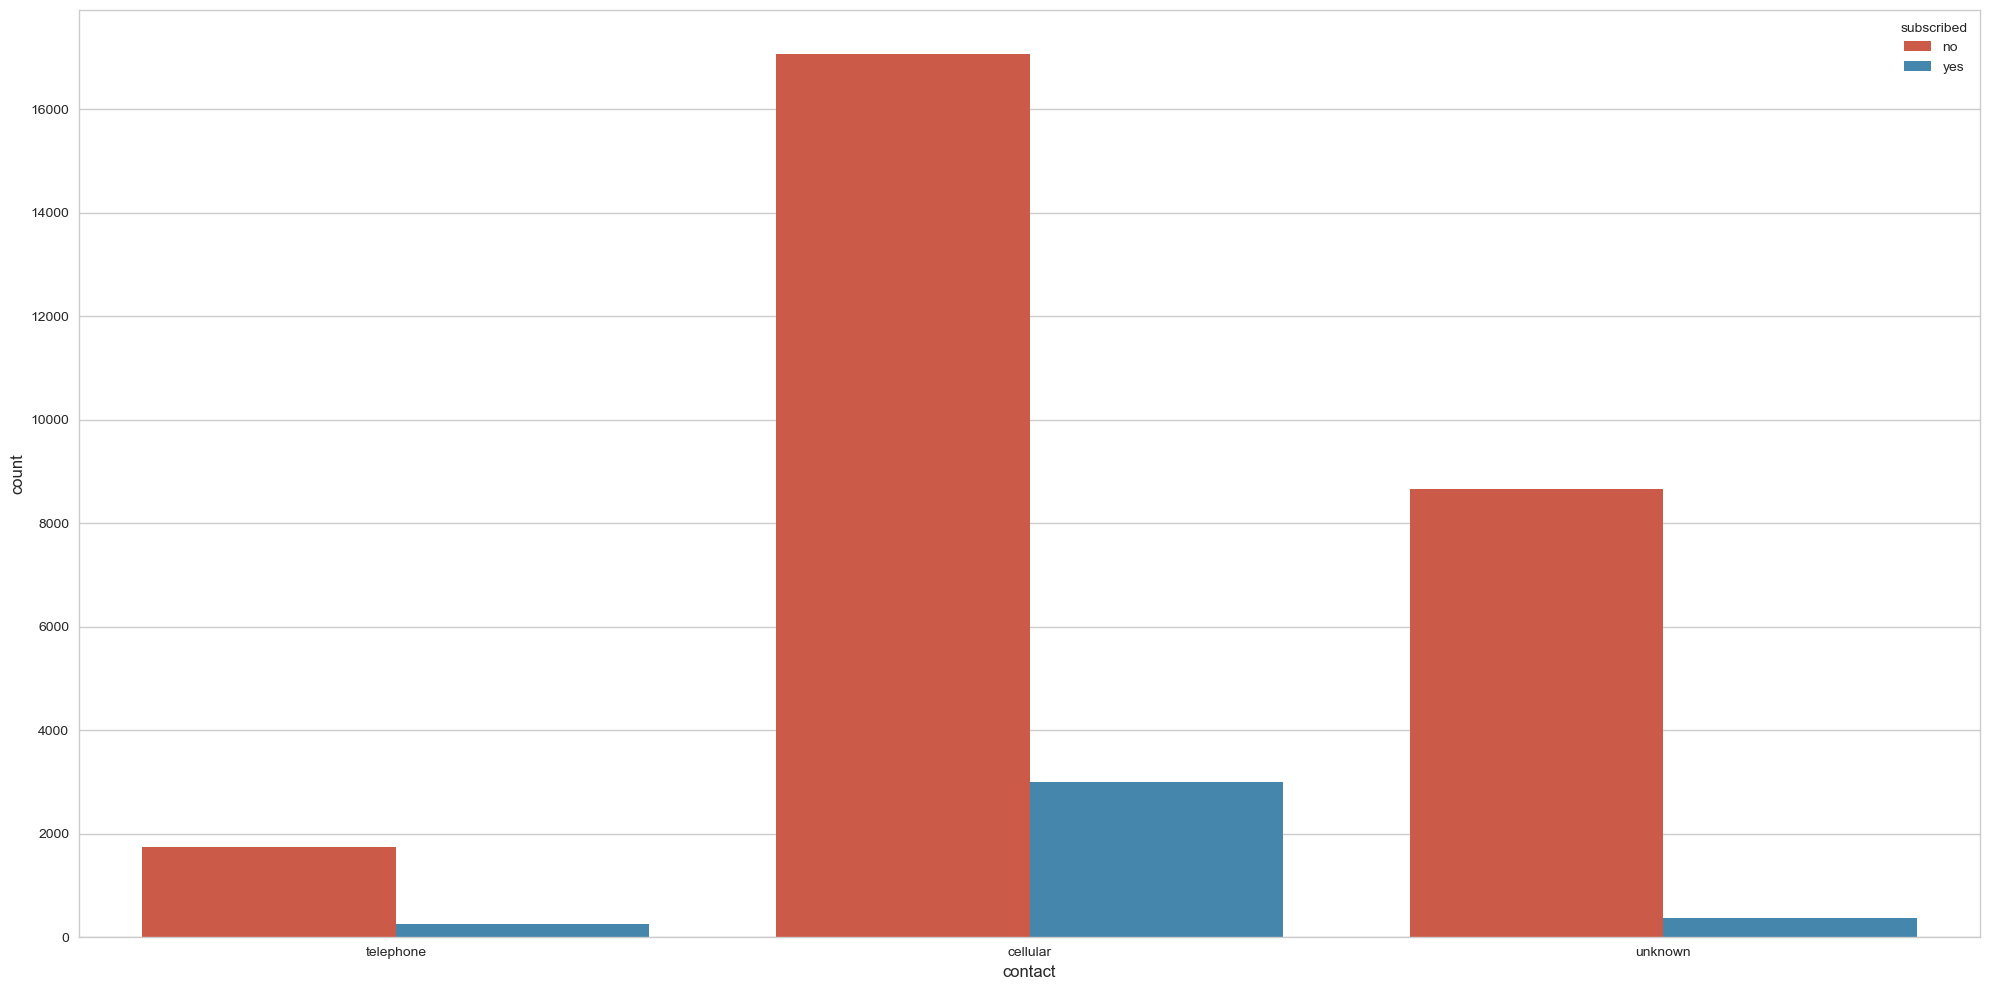

In [139]:
# Let us see the count of customers who subscribed to FD based on their mode of client communication


plt.figure(figsize=(20,10))
sns.countplot(newdf2.contact, hue = "subscribed", data=newdf2)
plt.tight_layout()

Quick Insights:

- As expected cellualr as a mode of communication is leading the count and also the fd subscription rate

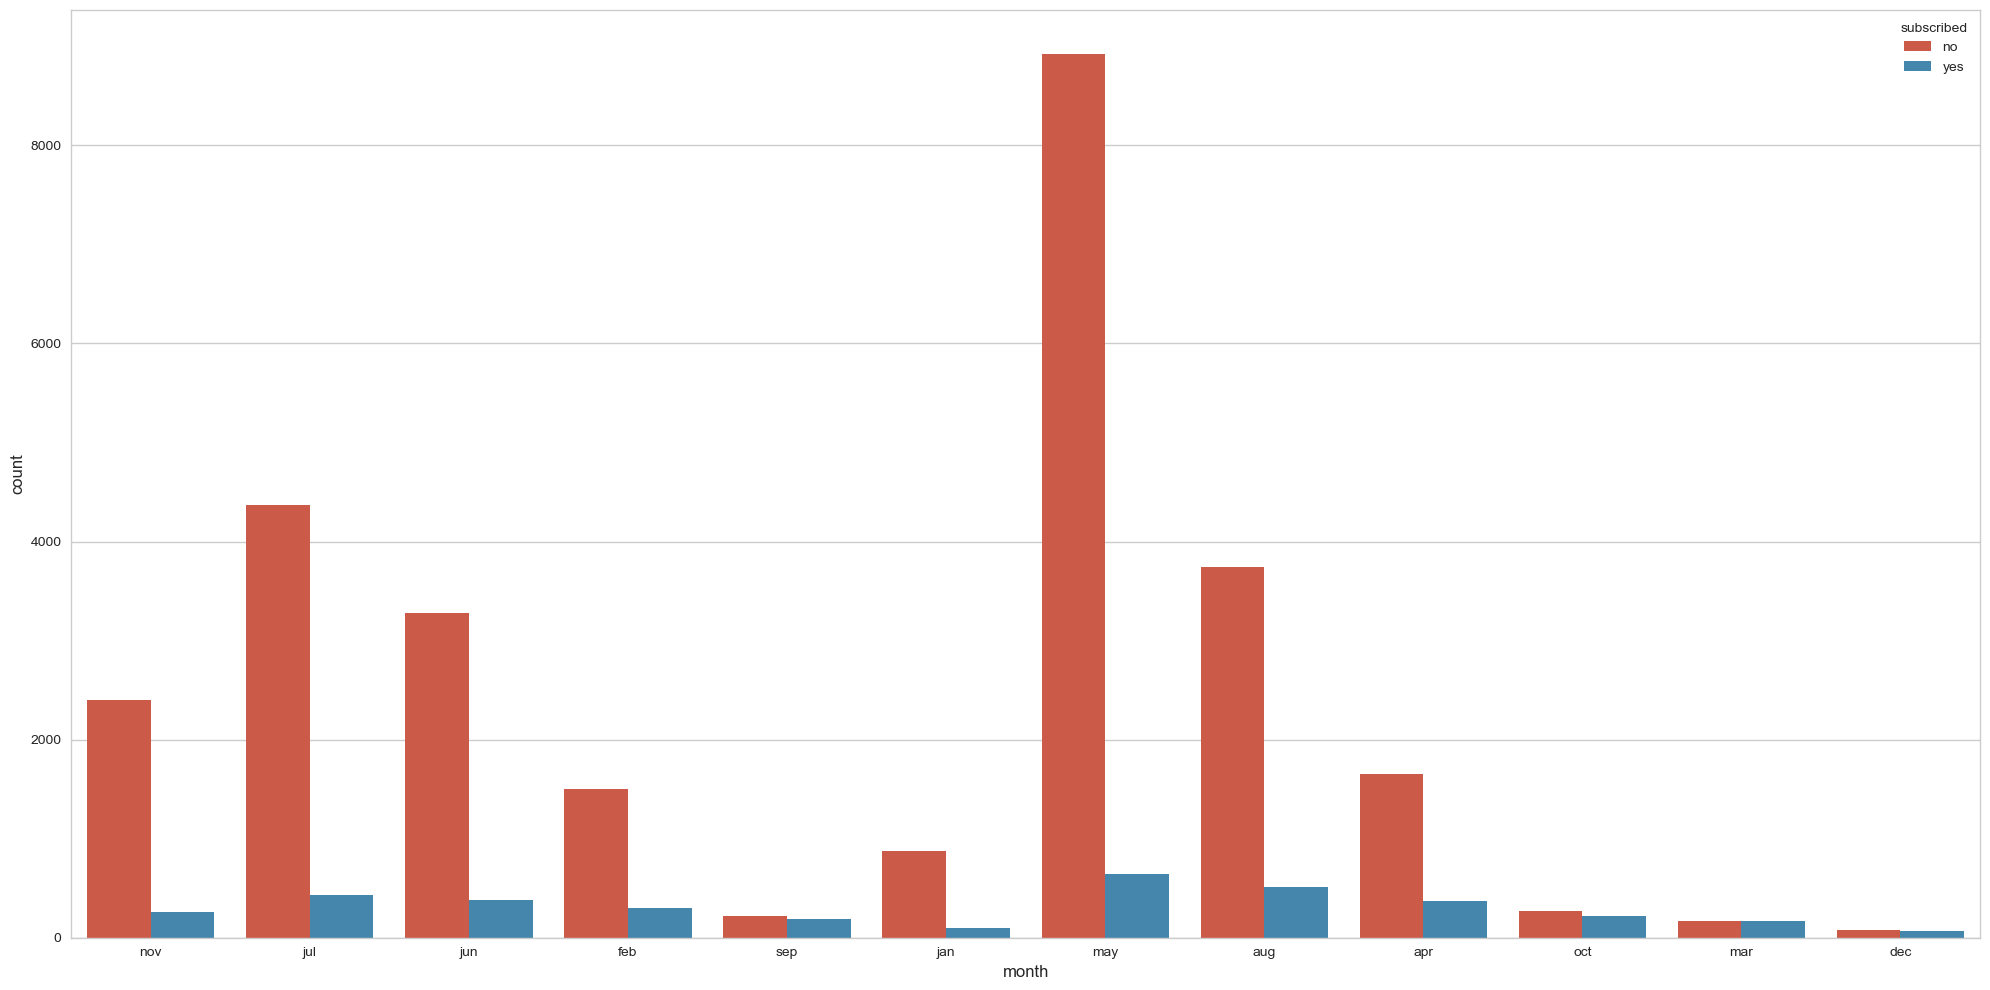

In [141]:
# Let us see the count of customers who subscribed to FD based on their last month of contact


plt.figure(figsize=(20,10))
sns.countplot(newdf2.month, hue = "subscribed", data=newdf2)
plt.tight_layout()

Quick Insights:

- May month seems to be best time to conact customer for increasing the rate of FD subscription
- April, jun, july, aug also seems to be farring well but march, dec and jan doesn't look idel time to campaign. 

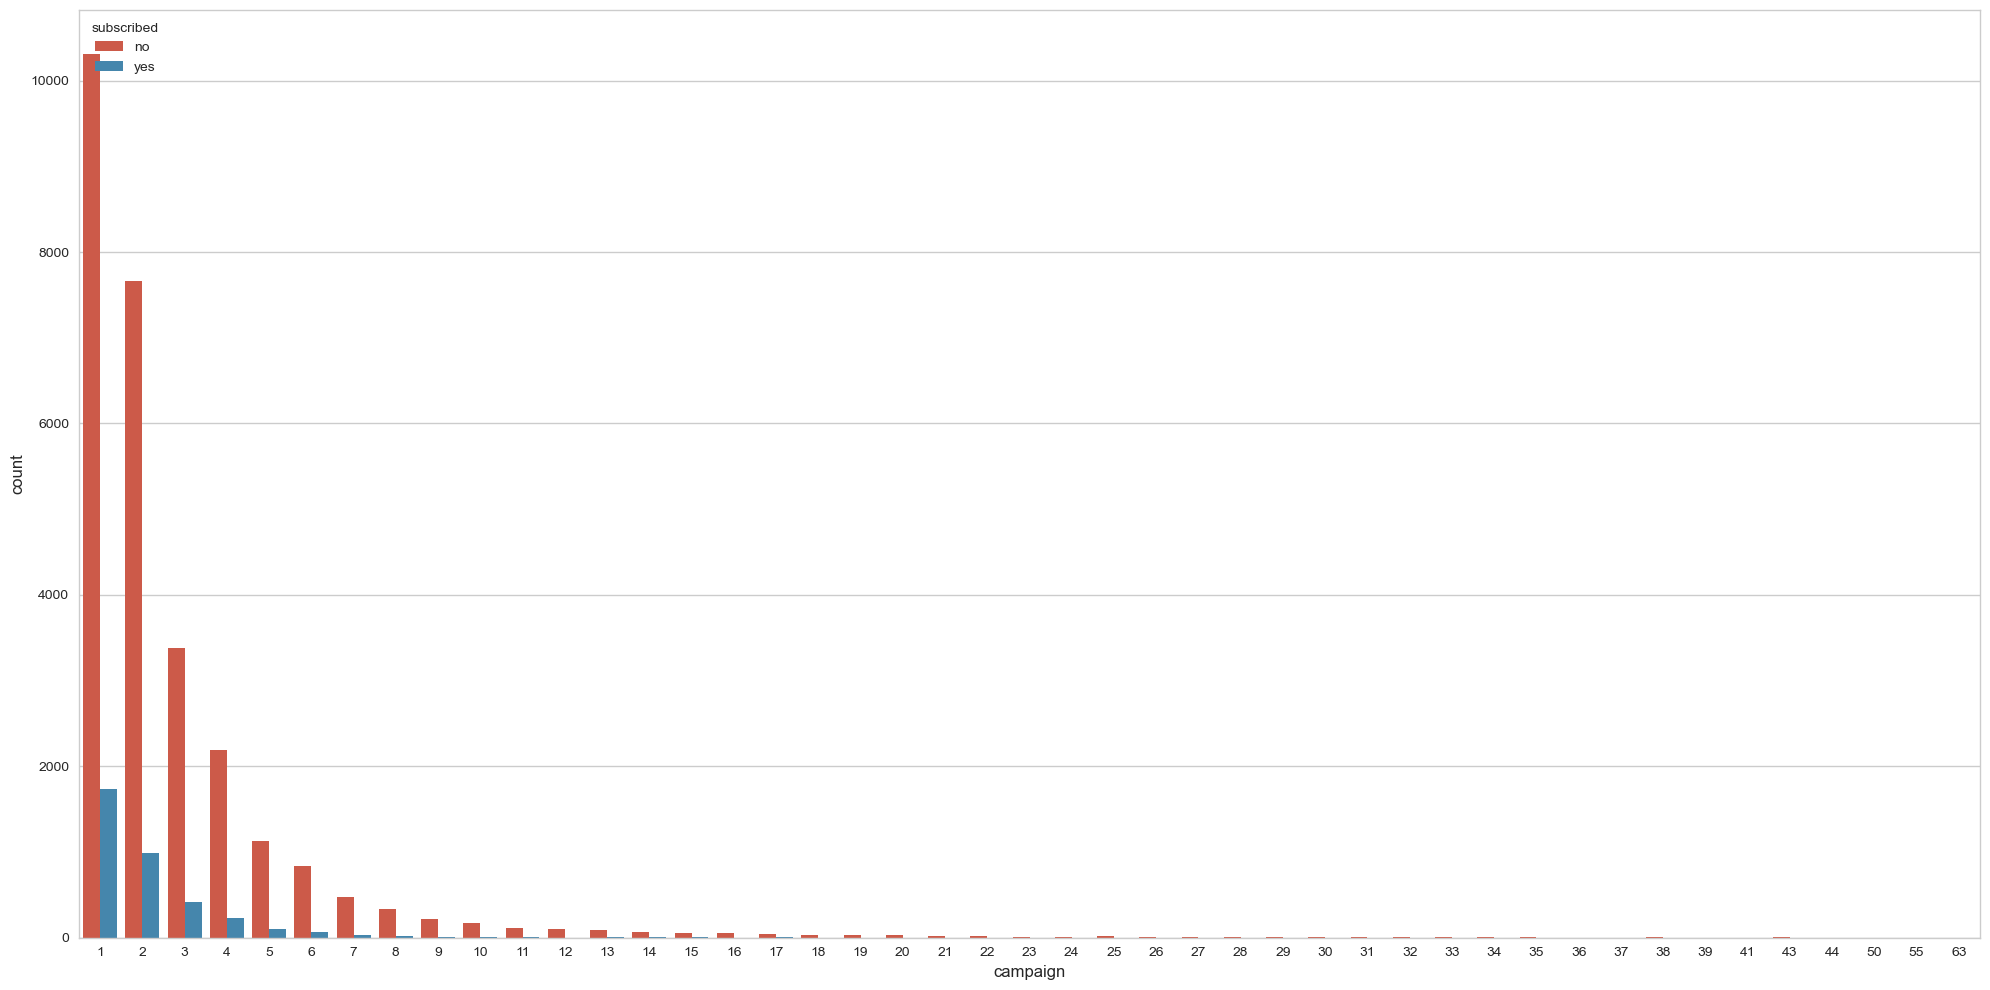

In [143]:
# Let us see the count of customers who subscribed to FD based on frequency of customr contact during the campaign


plt.figure(figsize=(20,10))
sns.countplot(newdf2.campaign, hue = "subscribed", data=newdf2)
plt.tight_layout()

Quick Insigts:

- it is clearly visible that if the customer is contacted not more than 5 times they are more likely to opt for FD option.

# AGE & BALANCE REALTIONSHIP:
Lets see how the bank balance and age are related . We removed some outlier in our balance attribute let;s use that data to 
see the result

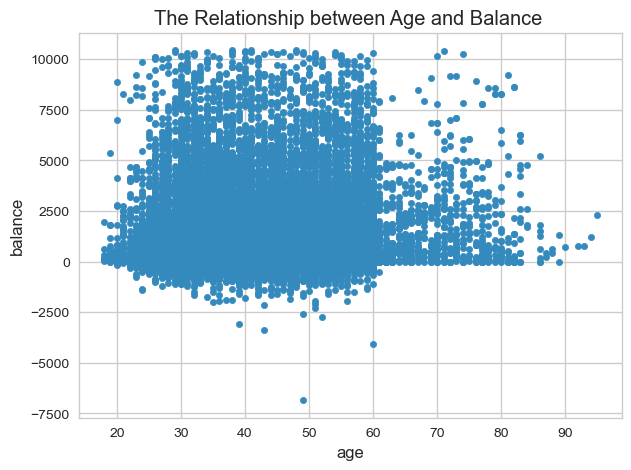

In [144]:
scatter_age_balance = newdf2.plot.scatter('age','balance',figsize = (7,5))

plt.title('The Relationship between Age and Balance ')
plt.show()

Quick Insights:
There seems to no linear relationship between age & balance and Based on this scatter plot, there is no clear relationship 
between client’s age and balance level. Nevertheless, over the age of 60, clients tend to have a significantly lower balance, 
mostly under 5,000 euros. This is due to the fact that most people retire after 60 and no longer have a reliable income source.

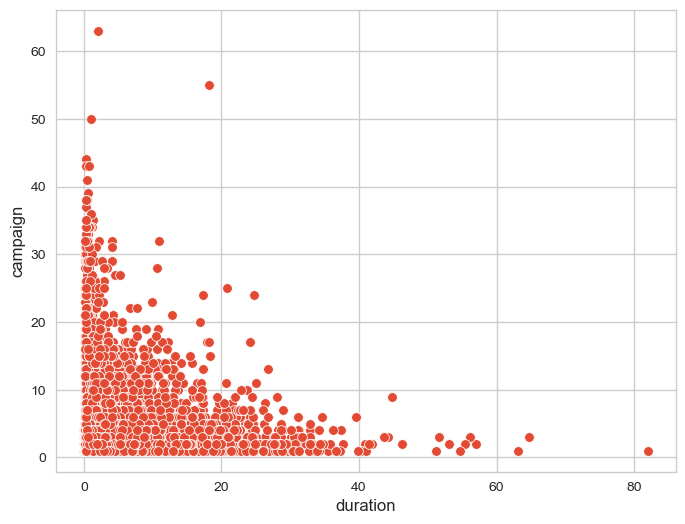

In [145]:
#2. Duration &  Campaign: 
plt.figure(figsize=(8,6))
sns.scatterplot(newdf2.duration, newdf2.campaign, palette= ['pink','lightblue'] )
plt.show()

Obseravtion:

- we can see some kind trend here, when frequency of contacting the same client increases, call duration which happens with the
client decreases, it's a kind of nrgative correlation.So it is advisable that the less is the frequency longer is the call 
duration which may result in better conversion rate. 
- If the contact frequency is between 5-10 call duration is more and it may result in better outcome as far as FD is concerned.

# EDUCATION & BANK BALANCE
Let's see how education impacts the bank balance of the customer

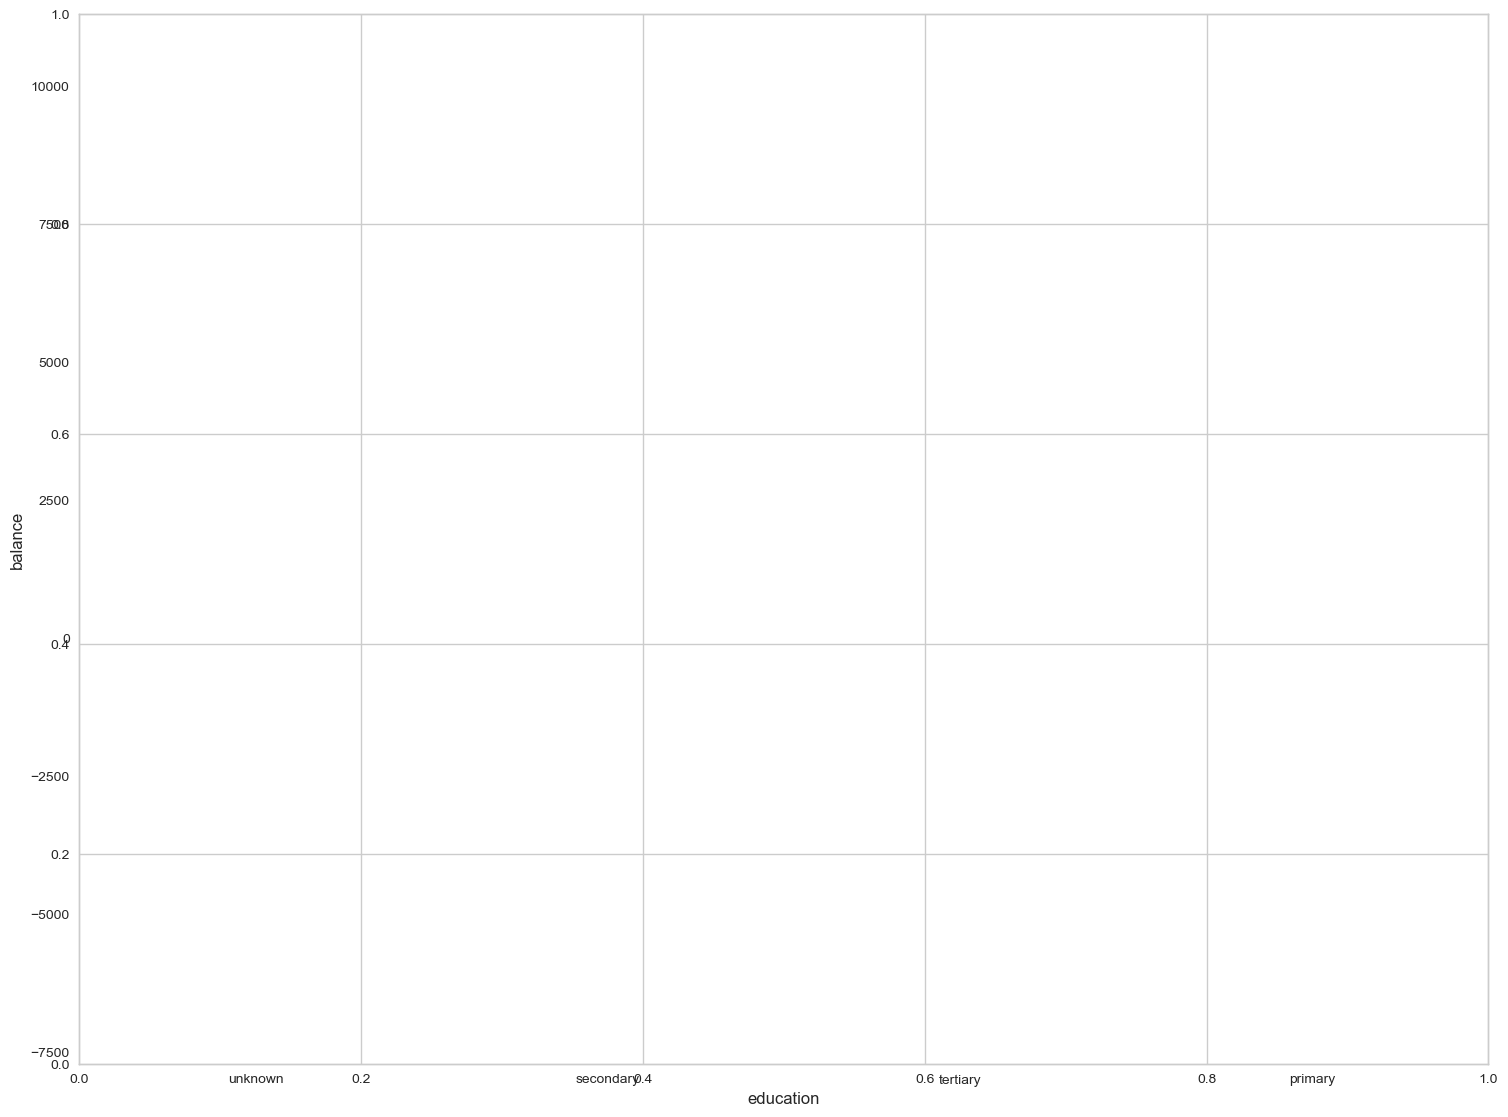

In [146]:
#imapct of job type, balance on fd suscription.

fig = plt.figure(figsize=(40,30))
ax1 = fig.add_subplot(221)
ax2= fig.add_subplot(221)
ax1 = sns.boxplot(newdf2['education'], newdf2['balance'], data=newdf2, ax =ax1)
#ax2 = sns.boxplot(newdf2['age'], newdf2['balance'], data=newdf2, ax =ax2)

In [148]:
#Before We measure the impacts of predcitor variable on our target let's have quick aggregation view using groupby
print(newdf2.groupby('subscribed').mean())
print(newdf2.groupby('subscribed').median())

                      ID        age      balance        day  duration  \
subscribed                                                              
no          21119.644435  40.797984  1038.301386  15.925518  3.691983   
yes         33158.598516  41.620500  1444.634515  15.140698  8.892495   

            campaign      pdays  previous  age_group  
subscribed                                            
no          2.847397  35.774442  0.496307  36.236583  
yes         2.157736  69.156087  1.158835  36.578730  
                 ID   age  balance   day  duration  campaign  pdays  previous  \
subscribed                                                                      
no          20793.0  39.0    402.0  16.0      2.73       2.0   -1.0       0.0   
yes         38950.0  38.0    706.0  15.0      7.08       2.0   -1.0       0.0   

            age_group  
subscribed             
no               30.0  
yes              30.0  


Quick Insights:

Avearge age of person who subscribed the FD is arond 41.
Average bank balance lying with the customer with who subscribed to FD is 1435 Euro.
It is observed the average call duration it took to convert cutomer to buy FD is around 9 minutes. Very less duration call 
seems to fail in converting the client to buy FD's.

# How Age Of The Customers Is Related To Fd Subscription:

subscribed         no        yes
age_group                       
20.0        82.645532  17.354468
30.0        89.421302  10.578698
40.0        90.847796   9.152204
50.0        90.294777   9.705223
60.0        67.336683  32.663317


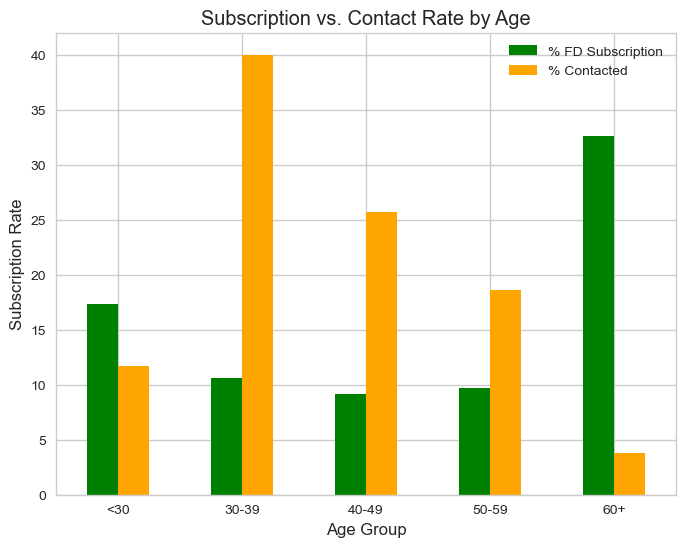

In [149]:
#Age & Target Variable
#Let's see of how age impacts the people's decision to take fd. 

#But First Let's Craete Age Grouping: 

lst = [newdf2]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60
    
    count_age_response_pct = pd.crosstab(newdf2['subscribed'],newdf2['age_group']).apply(lambda x: x/x.sum() * 100)
    
count_age_response_pct = count_age_response_pct.transpose() 
print(count_age_response_pct)

age = pd.DataFrame(newdf2['age_group'].value_counts())
age['% Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% FD Subscription'] = count_age_response_pct['yes']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

plot_age = age[['% FD Subscription','% Contacted']].plot(kind = 'bar', figsize=(8,6), color = ('green','orange'))
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5), ('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Subscription vs. Contact Rate by Age')
plt.show()


#ax = sns.boxplot(dataframe['Target'], newdf2['age_group'], data=newdf2)
    
    
    

Observation:
  - Orange Bar plot indicate that clients with a age of 60+ have the highest subscription rate. About 17% of the subscriptions
came from the clients aged between 18 to 29. More than 50% of the subscriptions are contributed by the youngest and the eldest
clients.

It is not surprising to see such a pattern because the main investment objective of older people is saving for retirement while
the middle-aged group tend to be more aggressive with a main objective of generating high investment income. Term deposits, as 
the least risky investment tool, are more preferable to the eldest. The youngest may not have enough money or professional 
knowledge to engage in sophisticated investments, such as stocks and mutual funds. Term deposits provide liquidity and generate
interest incomes that are higher than the regular saving account, so term deposits are ideal investments for students. However,
red vertical bars show that the bank focused its marketing efforts on the middle-aged group, which returned lower subscription 
rates than the younger and older groups. Thus, to make the marketing campaign more effective, the bank should target younger 
and older clients in the future.

- Some people beyoind 70 age has also been targeted, specially person between 80-90 ysr of age, which i feel is not a great 
right move cosidering the 

# FD subscription rate based on contacted customers balance level

subscribed              no        yes
balance_group                        
average balance  84.525972  15.474028
high balance     84.693878  15.306122
low balance      88.959961  11.040039
no balance       93.358005   6.641995


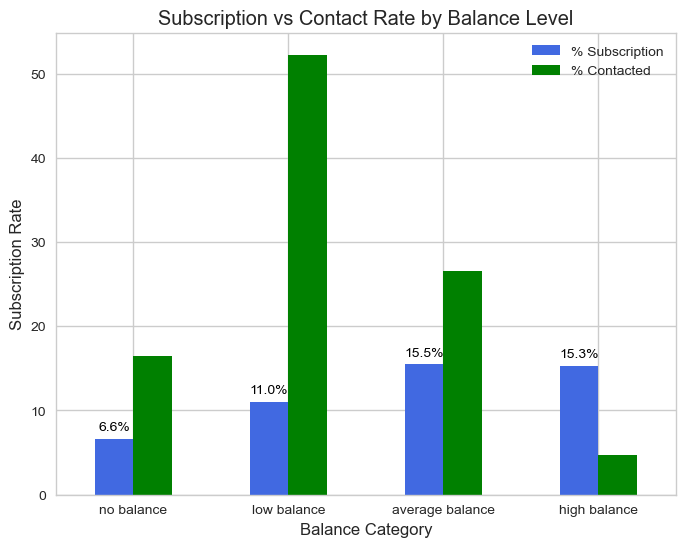

In [152]:
#Let's Seggregate The Balance  & Perform Transaformation To Have Better Insights

lst = [newdf2]
for column in lst:
    column.loc[column["balance"] <= 0,  'balance_group'] = 'no balance'
    column.loc[(column["balance"] > 0) & (column["balance"] <= 1000), 'balance_group'] = 'low balance'
    column.loc[(column["balance"] > 1000) & (column["balance"] <= 5000), 'balance_group'] = 'average balance'
    column.loc[(column["balance"] > 5000), 'balance_group'] = 'high balance'
    
count_balance_response_pct = pd.crosstab(newdf2['subscribed'],newdf2['balance_group']).apply(lambda x: x/x.sum() * 100)
count_balance_response_pct = count_balance_response_pct.transpose()

bal = pd.DataFrame(newdf2['balance_group'].value_counts())
bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
bal['% Subscription'] = count_balance_response_pct['yes']
bal.drop('balance_group',axis = 1,inplace = True)

bal['bal'] = [1,2,0,3]
bal = bal.sort_values('bal',ascending = True)

plot_balance = bal[['% Subscription','% Contacted']].plot(kind = 'bar',
                                               color = ('royalblue','green'),
                                               figsize = (8,6))

plt.title('Subscription vs Contact Rate by Balance Level')
plt.ylabel('Subscription Rate')
plt.xlabel('Balance Category')
plt.xticks(rotation = 'horizontal')

# label the bar
for rec, label in zip(plot_balance.patches, bal['% Subscription'].round(1).astype(str)):
    plot_balance.text(rec.get_x() + rec.get_width()/2, rec.get_height() + 1,  label+'%',   ha = 'center', color = 'black')

print(count_balance_response_pct)

#ax = sns.boxplot(newdf2['Target'], newdf2['balance'], data=newdf2)
    

Quick Insights For FD subscription rate against balance level:

To identify the trend more clearly, we have categorized customers into four groups based on their levels of balance:

No Balance: clients with a negative balance. Low Balance: clients with a balance between 0 and 1000 euros Average Balance: 
            clients with a balance between 1000 and 5000 euros. High Balance: clients with a balance greater than 5000 euros.

Our Box Plot shows a positive correlation between clients’ balance levels and fd subscription rate. Clients with negative 
balances only returned a fd subscription rate of 6.9% while clients with average or high balances had significantly higher 
FD subscription rates, nearing to 15%.

We have seen above that more than 50% of customers contacted had the low balance level.So bank has to taje care in the future
to target cusytomers with high bank balance level. People with negative balance are less likely to subscribe to FD.

# FD subscription rate by job

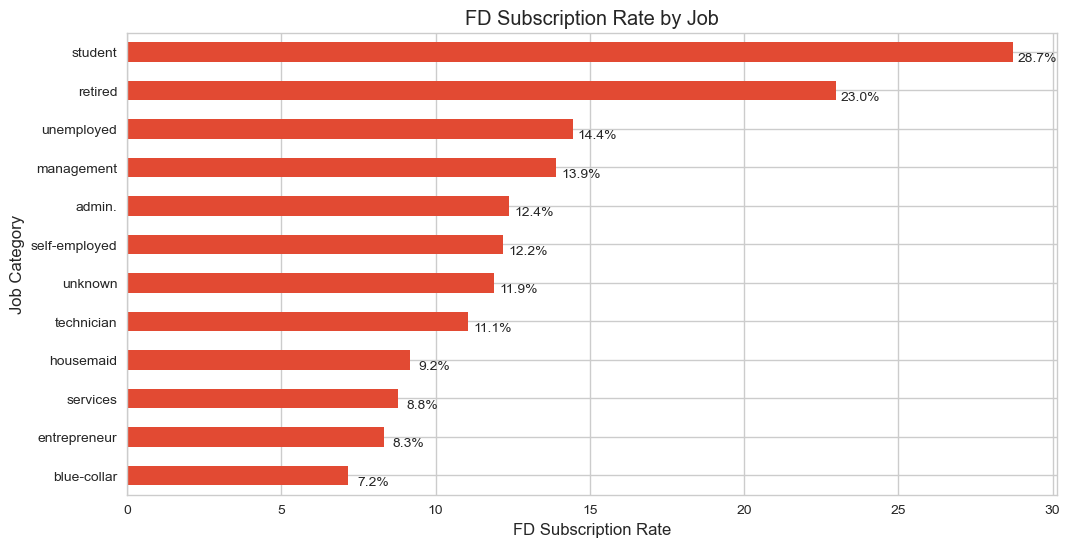

In [154]:
#First Let's Transform The Data, So that we can plot them meaningfully

count_job_target_pct = pd.crosstab(newdf2['subscribed'],newdf2['job']).apply(lambda x: x/x.sum() * 100)
count_job_target_pct = count_job_target_pct.transpose()

plot_job = count_job_target_pct['yes'].sort_values(ascending = True).plot(kind ='barh',figsize = (12,6))                                                                               
plt.title('FD Subscription Rate by Job')
plt.xlabel('FD Subscription Rate')
plt.ylabel('Job Category')

# Label each bar
for rec, label in zip(plot_job.patches, count_job_target_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, rec.get_y()+ rec.get_height()-0.5, label+'%', ha = 'center')

# Quick Insghts: For FD subscription rate by job

Here it is clearly laid down in our bar chart that students and retired clients account for more than 50% of FD subscription,
which is consistent with the previous finding of higher FD subscription rates among the younger and older.

# FD Subscription Rate Based on Marital Status

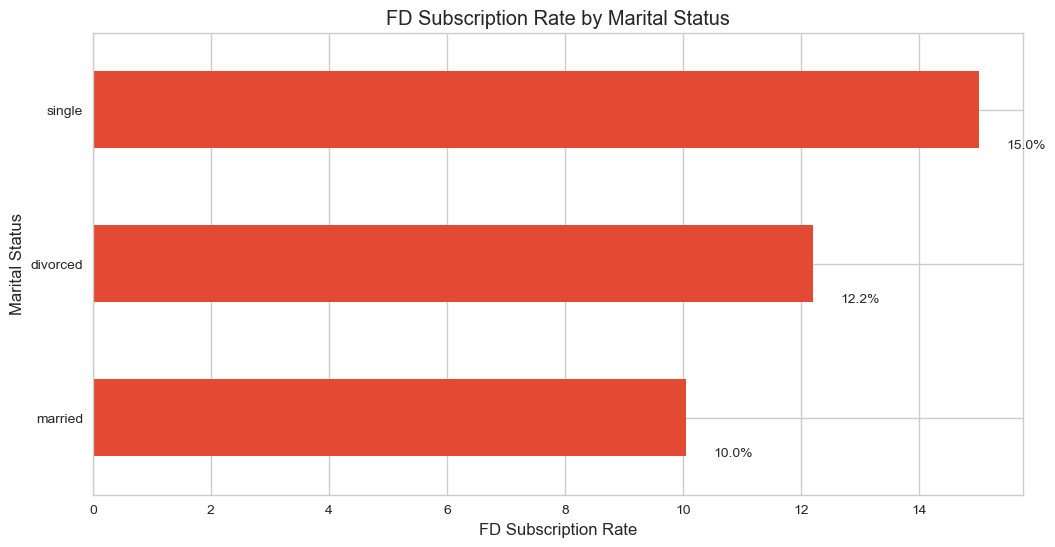

In [156]:
count_marital_target_pct = pd.crosstab(newdf2['subscribed'],newdf2['marital']).apply(lambda x: x/x.sum() * 100)
count_marital_target_pct = count_marital_target_pct.transpose()

plot_marital = count_marital_target_pct['yes'].sort_values(ascending = True).plot(kind ='barh',figsize = (12,6))                                                                               
plt.title('FD Subscription Rate by Marital Status')
plt.xlabel('FD Subscription Rate')
plt.ylabel('Marital Status')

# Label each bar
for rec, label in zip(plot_marital.patches, count_marital_target_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_marital.text(rec.get_width()+0.8, rec.get_y()+ rec.get_height()-0.5, label+'%', ha = 'center')

# Quick Insights : Marial Stataus Impact On FD Subscription:

As we saw above young that young people are more subsciber of FD, here also we can say that young unmarried person are leading
the way with 15 % FD subscription rate,out of total subscribed fd customer.
Divorce seems to unexpectedly ranking higher thab married customer.
Married one's are less oriented towards FD option.

# FD Subscription Rate Based on Education Level:

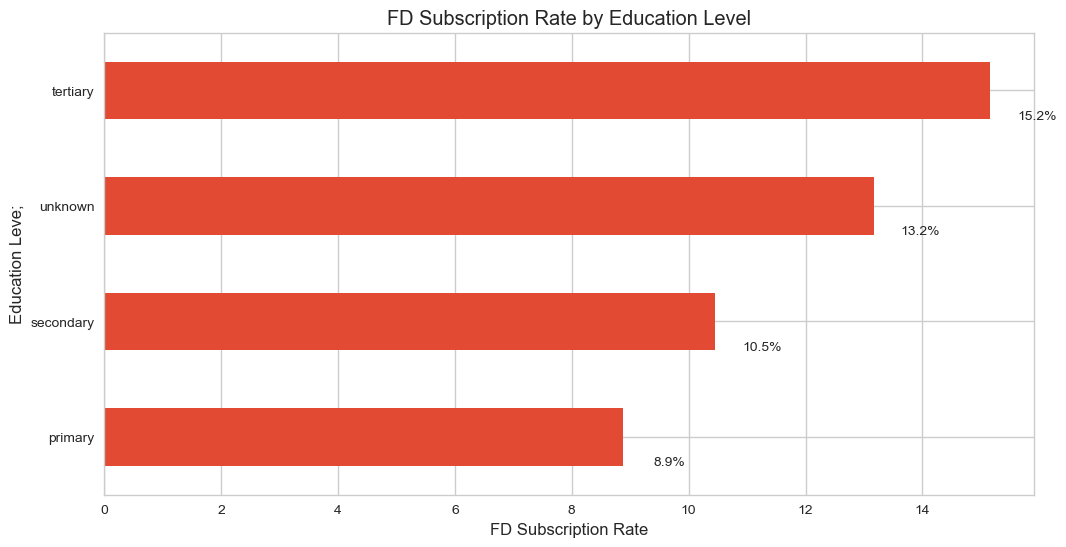

In [158]:
count_education_target_pct = pd.crosstab(newdf2['subscribed'],newdf2['education']).apply(lambda x: x/x.sum() * 100)
count_education_target_pct= count_education_target_pct.transpose()

plot_education = count_education_target_pct['yes'].sort_values(ascending = True).plot(kind ='barh',figsize = (12,6))                                                                               
plt.title('FD Subscription Rate by Education Level')
plt.xlabel('FD Subscription Rate')
plt.ylabel('Education Leve;')

# Label each bar
for rec, label in zip(plot_education.patches, count_education_target_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_education.text(rec.get_width()+0.8, rec.get_y()+ rec.get_height()-0.5, label+'%', ha = 'center')

# Quick Insights: people education level distribution who opted for FD

People with higher level of education has higher subscription rate . Here 15 % people with higher education level opted for FD out of all FD subsciber. 14 % user who education level is not capture as wanted acount for good 13 % out of total FD subscribers

# FD Subscription Rate Based On Personal Loan Status Of The Customers

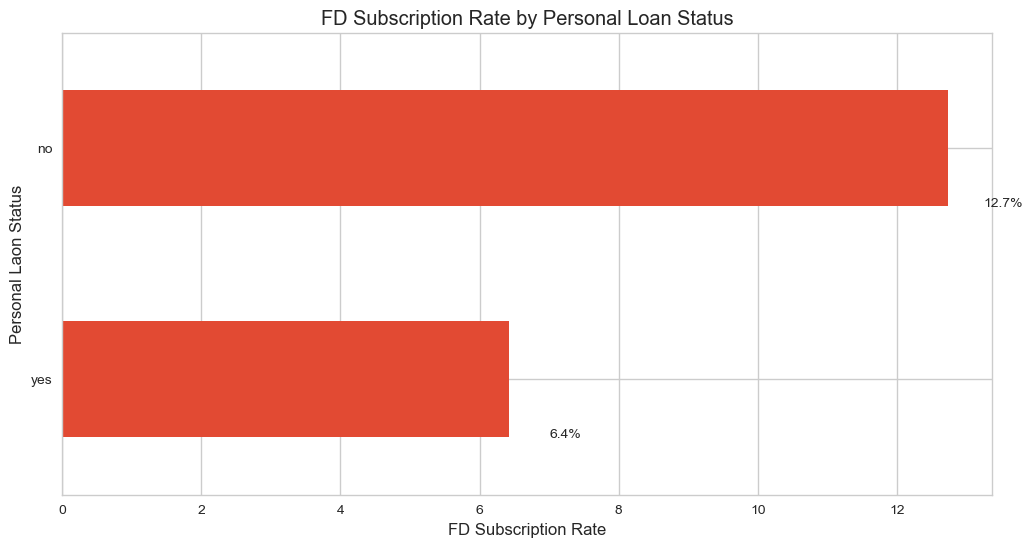

In [159]:
count_loan_target_pct = pd.crosstab(newdf2['subscribed'],newdf2['loan']).apply(lambda x: x/x.sum() * 100)
count_loan_target_pct= count_loan_target_pct.transpose()

plot_loan = count_loan_target_pct['yes'].sort_values(ascending = True).plot(kind ='barh',figsize = (12,6))                                                                               
plt.title('FD Subscription Rate by Personal Loan Status')
plt.xlabel('FD Subscription Rate')
plt.ylabel('Personal Laon Status')

# Label each bar
for rec, label in zip(plot_loan.patches, count_loan_target_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_loan.text(rec.get_width()+0.8, rec.get_y()+ rec.get_height()-0.5, label+'%', ha = 'center')

# Quick insights on FD Subscription Rate Based On Personal Loan Status Of The Customers:

 - Person with personal loan on their head seems to less interested in fd , as you can see only 6.7 % of them availed FD option
 - As expected people with no loan on their head a more likely to avail FD options. As it can be seen here that around 12.6 % 
    customer with no pl opted for FD 

# Impact Of Cutsomers Credit Default On FD Subscription:

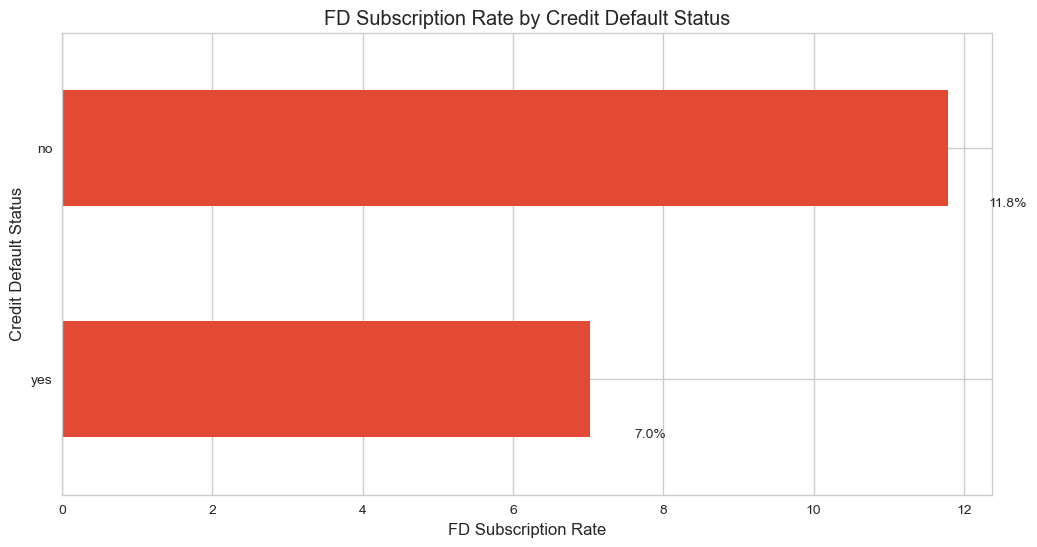

In [161]:
count_creditdefault_target_pct = pd.crosstab(newdf2['subscribed'],newdf2['default']).apply(lambda x: x/x.sum() * 100)
count_creditdefault_target_pct= count_creditdefault_target_pct.transpose()

plot_credit_default = count_creditdefault_target_pct['yes'].sort_values(ascending = True).plot(kind ='barh',figsize = (12,6))                                                                               
plt.title('FD Subscription Rate by Credit Default Status')
plt.xlabel('FD Subscription Rate')
plt.ylabel('Credit Default Status')

# Label each bar
for rec, label in zip(plot_credit_default.patches, count_creditdefault_target_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_credit_default.text(rec.get_width()+0.8, rec.get_y()+ rec.get_height()-0.5, label+'%', ha = 'center')

# Quick Insights On How Credit Default Status Is Related To FD Subscription:

- We can see that person with no default credit stastus has higher FD rate subscription which is as per expectations.
They account for around 12 %.
- Person with credit default history accounts for 6.4 % FD subscription. 

# Let's See How People With Housing loan responded to FD subscription camapign

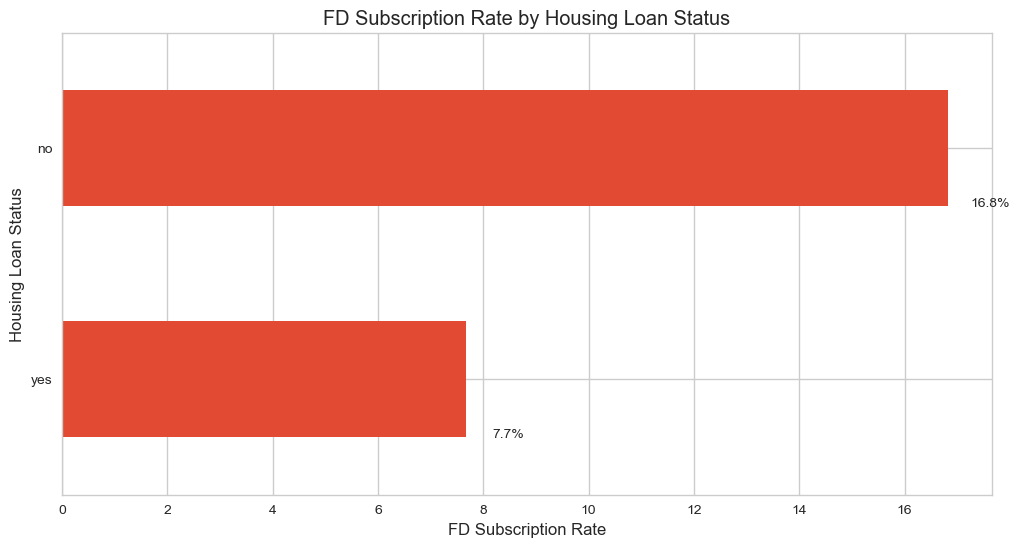

In [167]:
count_housingloan_target_pct = pd.crosstab(newdf['subscribed'],newdf['housing']).apply(lambda x: x/x.sum() * 100)
count_housingloan_target_pct= count_housingloan_target_pct.transpose()

plot_housing_loan = count_housingloan_target_pct['yes'].sort_values(ascending = True).plot(kind ='barh',figsize = (12,6))                                                                               
plt.title('FD Subscription Rate by Housing Loan Status')
plt.xlabel('FD Subscription Rate')
plt.ylabel('Housing Loan Status')

# Label each bar
for rec, label in zip(plot_housing_loan.patches, count_housingloan_target_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_housing_loan.text(rec.get_width()+0.8, rec.get_y()+ rec.get_height()-0.5, label+'%', ha = 'center')

    
#yhdf = newdf2[newdf2['housing']== "yes"]

# Quick Insights:

- customers with houing loan on their head are less likley to avail FD, here only 8 % of the customers with already having  housing loan availed fd option. This is as expected
- around 17 % of the cutomers with no housing loan opted for FD instrument. 

# Let's See How Mode Of Communication Impacts FD 

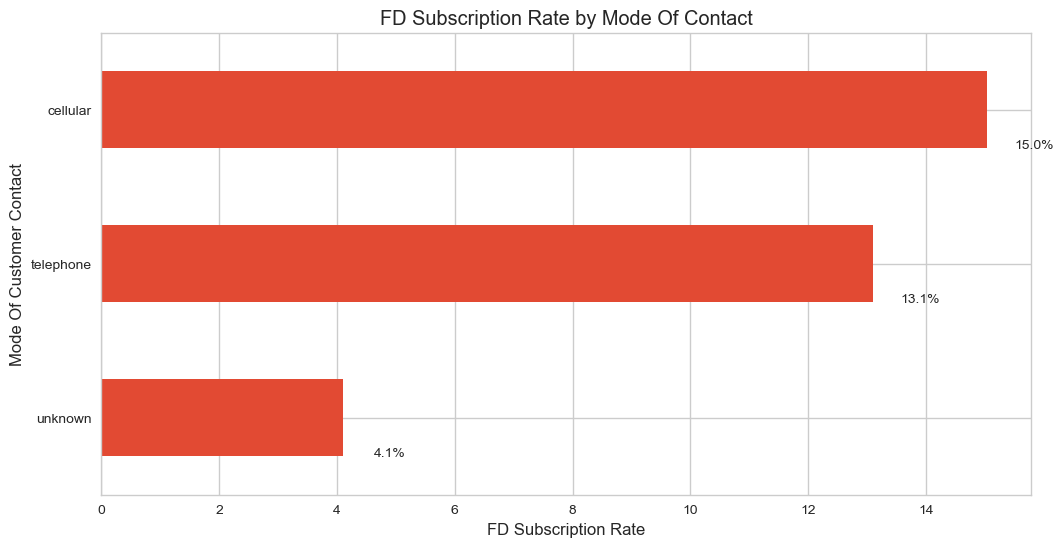

In [168]:
#Let's See How Mode Of Communication Impacts FD 
count_modeofcomm_target_pct = pd.crosstab(newdf['subscribed'],newdf['contact']).apply(lambda x: x/x.sum() * 100)
count_modeofcomm_target_pct= count_modeofcomm_target_pct.transpose()

plot_comm_mode = count_modeofcomm_target_pct['yes'].sort_values(ascending = True).plot(kind ='barh',figsize = (12,6))                                                                               
plt.title('FD Subscription Rate by Mode Of Contact')
plt.xlabel('FD Subscription Rate')
plt.ylabel('Mode Of Customer Contact')

# Label each bar
for rec, label in zip(plot_comm_mode.patches, count_modeofcomm_target_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_comm_mode.text(rec.get_width()+0.8, rec.get_y()+ rec.get_height()-0.5, label+'%', ha = 'center')

    
#yhdf = newdf2[newdf2['housing']== "yes"]

# Quick Insight :

  - Out of total customer who opted for fd , 15 % of them were converted usng cell phone as mode of contact. which seems to normal and expected
  - Telephine seems to be quite close to mobile and accounts for 13.4 % of FD conversion.   

# Impact Of Call Duration On FD Conversion:

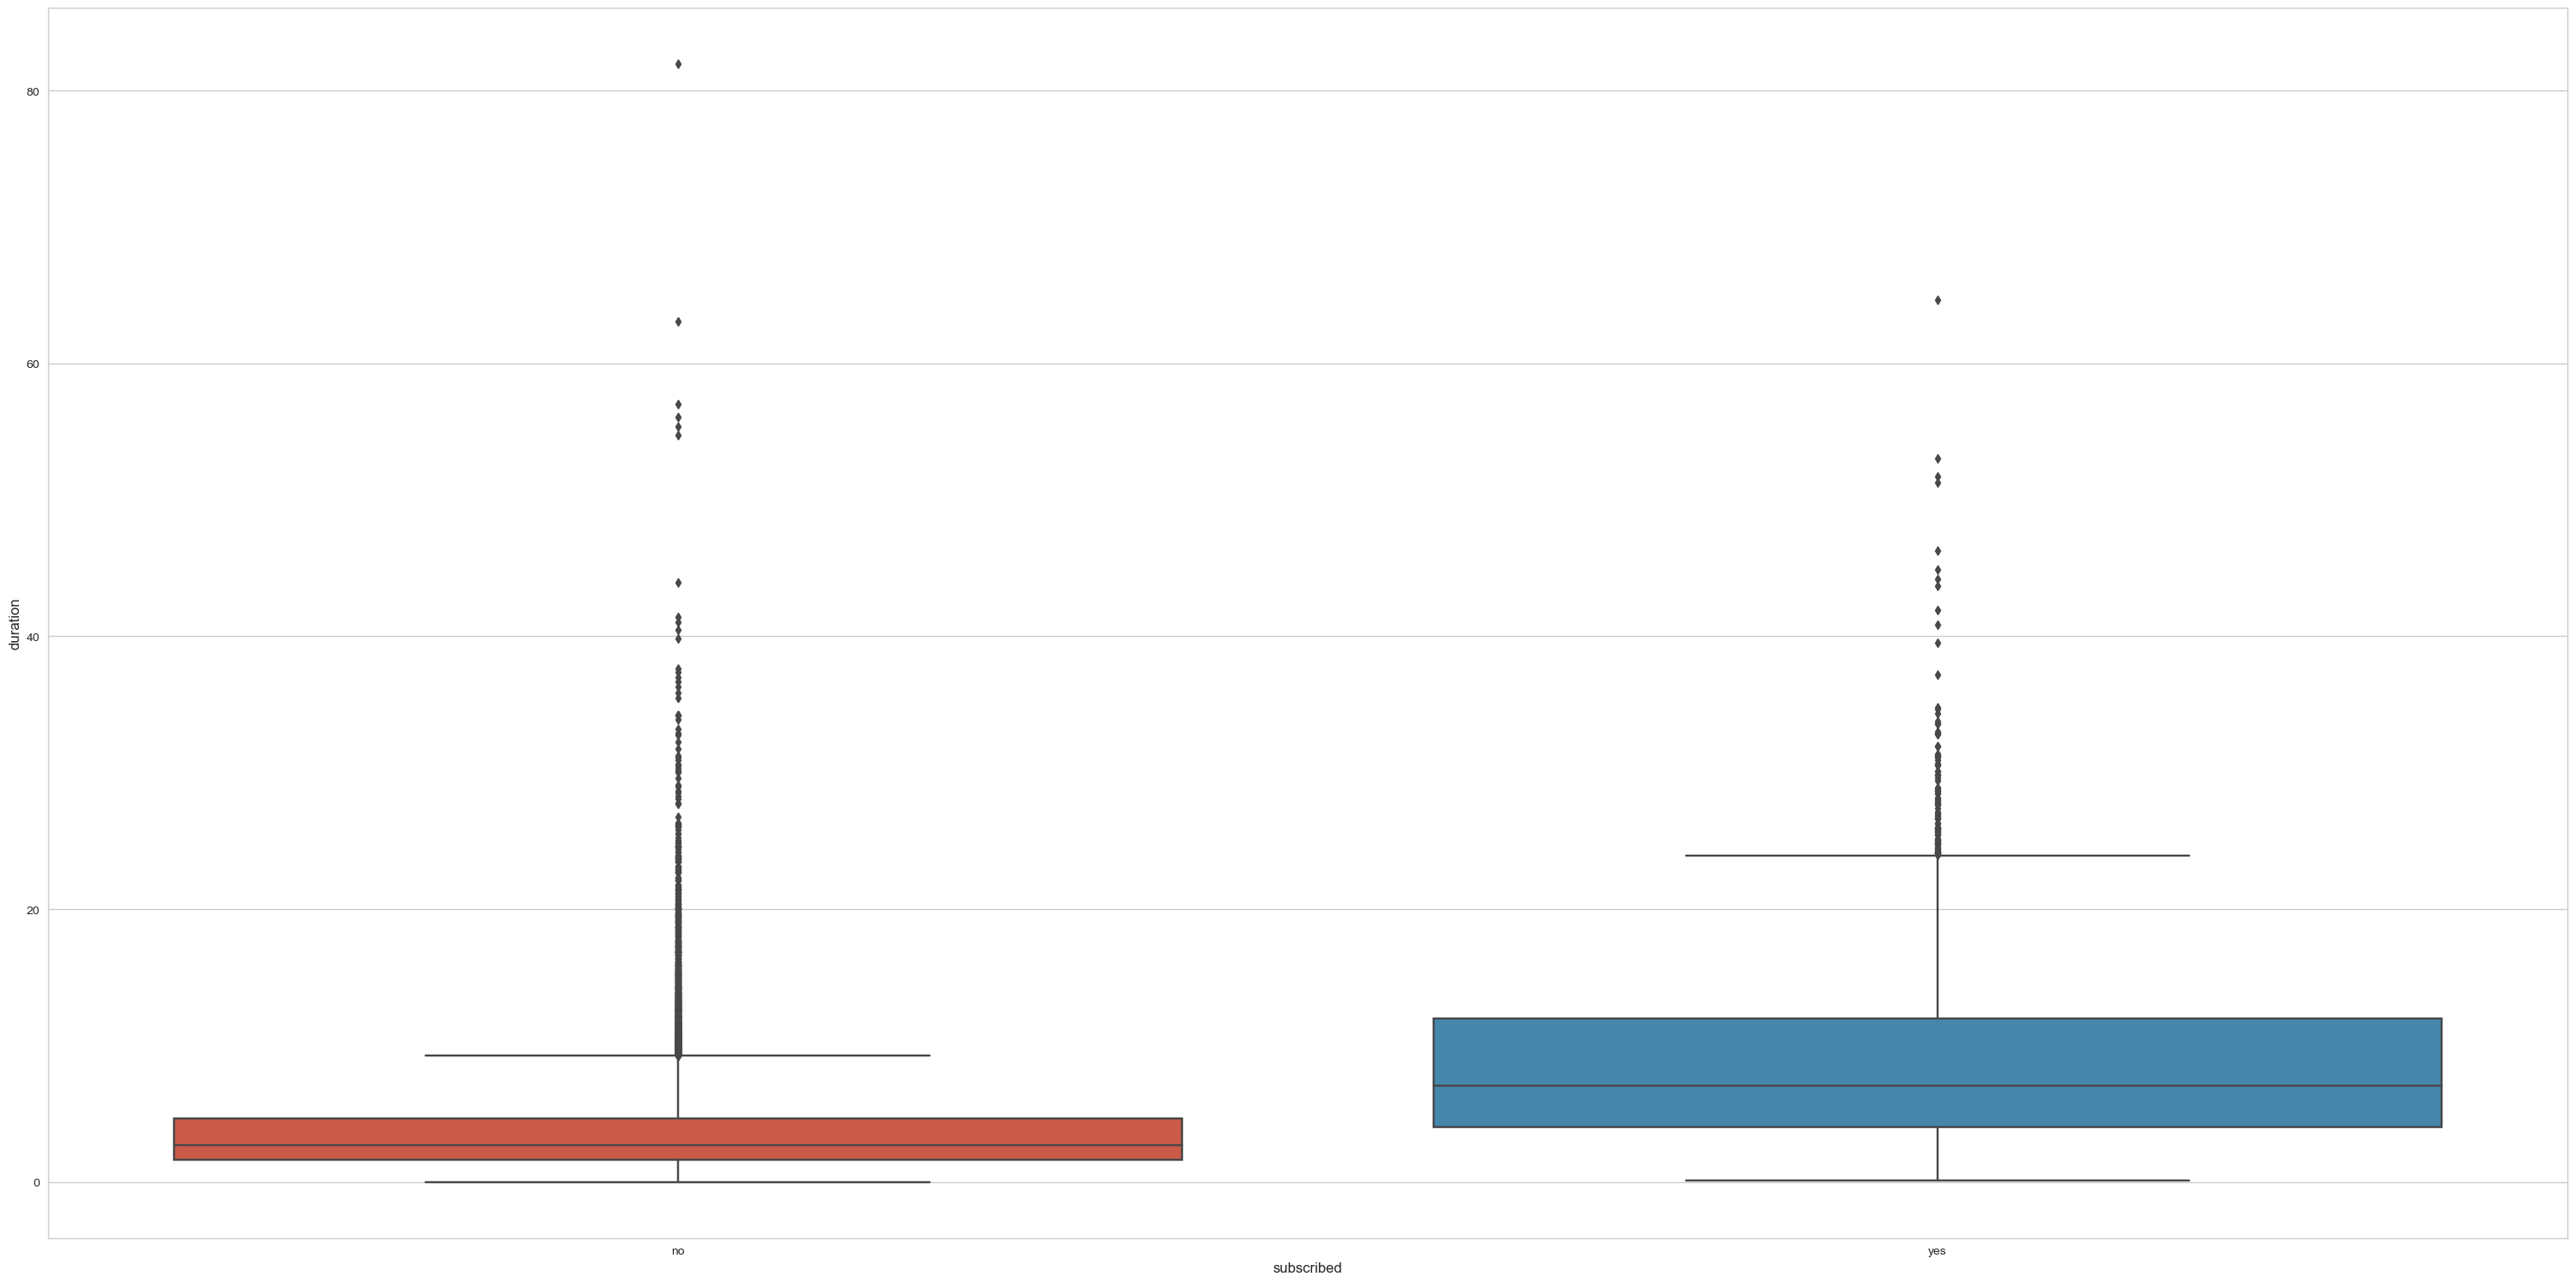

In [172]:
plt.figure(figsize=(30,15))
ax = sns.boxplot(newdf2['subscribed'], newdf2['duration'], data=newdf)
plt.tight_layout()

Quick Insight:

- If the call duration was less than 3-5 minutes customers were less likely to subscribe to FD option
- But If the call duration lasted between 5-10 minutes , customers were more likely to take FD

# FD subscription rate based on last contact month of year

subscribed         no        yes
month                           
apr         81.313869  18.686131
aug         87.999077  12.000923
dec         54.140127  45.859873
feb         83.305966  16.694034
jan         90.071648   9.928352
jul         90.895954   9.104046
jun         89.753879  10.246121
mar         49.122807  50.877193
may         93.287827   6.712173
nov         90.118577   9.881423
oct         56.250000  43.750000
sep         53.414634  46.585366


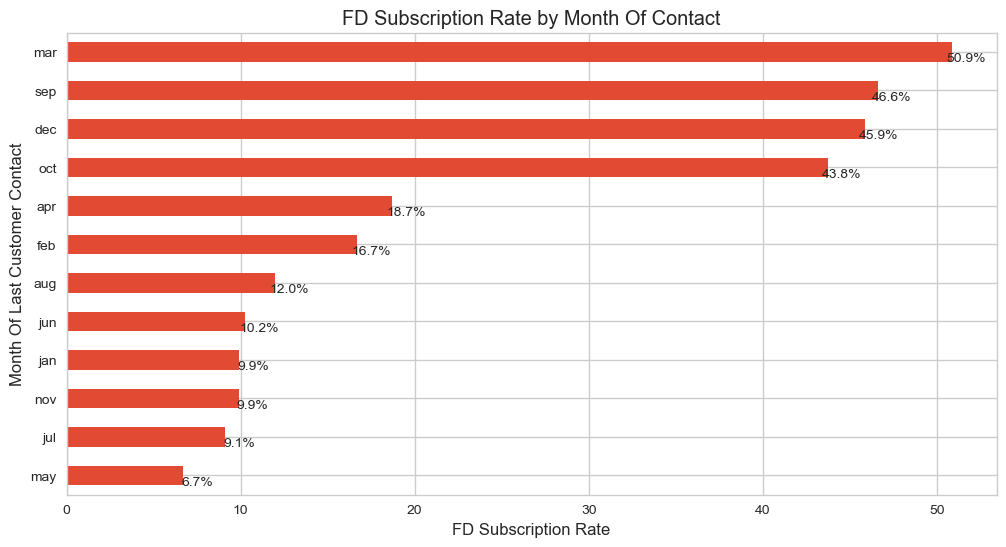

In [175]:
count_monthofcontact_target_pct = pd.crosstab(newdf['subscribed'],newdf['month']).apply(lambda x: x/x.sum() * 100)
count_monthofcontact_target_pct= count_monthofcontact_target_pct.transpose()
print(count_monthofcontact_target_pct)

plot_mnth_contact = count_monthofcontact_target_pct['yes'].sort_values(ascending = True).plot(kind ='barh',figsize = (12,6))                                                                               
plt.title('FD Subscription Rate by Month Of Contact')
plt.xlabel('FD Subscription Rate')
plt.ylabel('Month Of Last Customer Contact')

# Label each bar
for rec, label in zip(plot_mnth_contact.patches, count_monthofcontact_target_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_mnth_contact.text(rec.get_width()+0.8, rec.get_y()+ rec.get_height()-0.5, label+'%', ha = 'center')

# Quick Insight On Impact of customer contact monthwise on fd subscription rate:

-The highest fd subscription rate occurred in March, which is over 50%, and all subscription rates in September, October, 
and December are over 40%.Clearly, this gives some insights to the bank when to plan their campaign. Having said that they 
should also count external factor related to weather etc while planning their marketing camapign.

# How Marital Status Impacts Balance Of The Customer

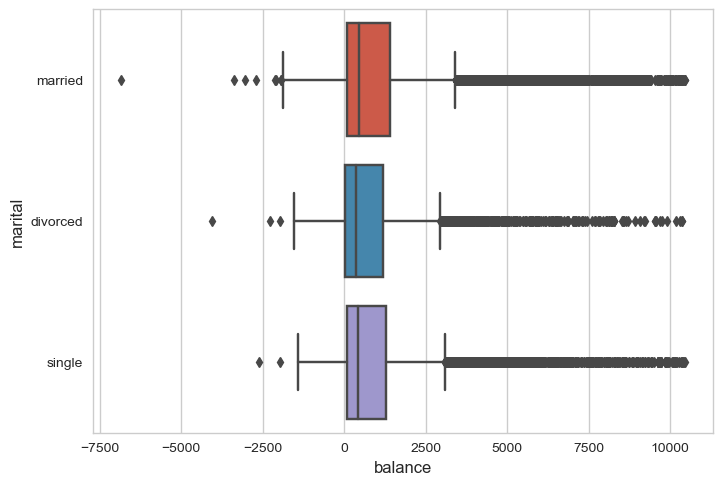

In [176]:
ax = sns.boxplot(newdf2['balance'], newdf2['marital'], data=newdf2)

# Quick Insights:

 - As seen form the box plot above married person have better financial status as compared to single & divorced person. 
 -  Divorced Person seems to borke, which is expected due to financail pressure one has to bear.

# Education Impact On Cutsomer Bank Balance:

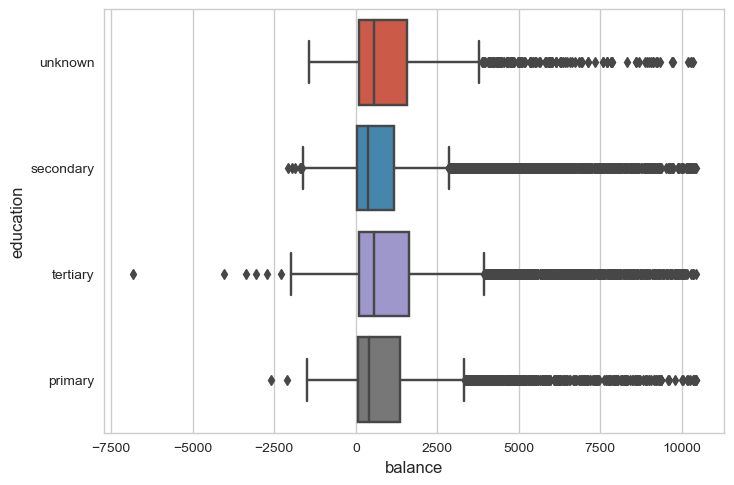

In [177]:
ax = sns.boxplot(newdf2['balance'], newdf2['education'], data=newdf2)

# Quick Insight:

   - The level of education also has a significant impact on the amount of balance a prospect has. As shown above the person with higher education has higher bank balance as compared to promary level educated person.
   - Unknown category whose info is not clear seems to be having more bank balance than primary, this needs to be taken care by bank executive to find the actual education level.
   - There is one interesting observation against people with secondary level eduaction , they seems to have low balance which can be due to the expense they need to plan for higher eduaction. 
   - Also person with higher education level also have more no. of person with negative bank balance with some outlier. 

# Impact Of Previous Personal Loan On Bank Balance

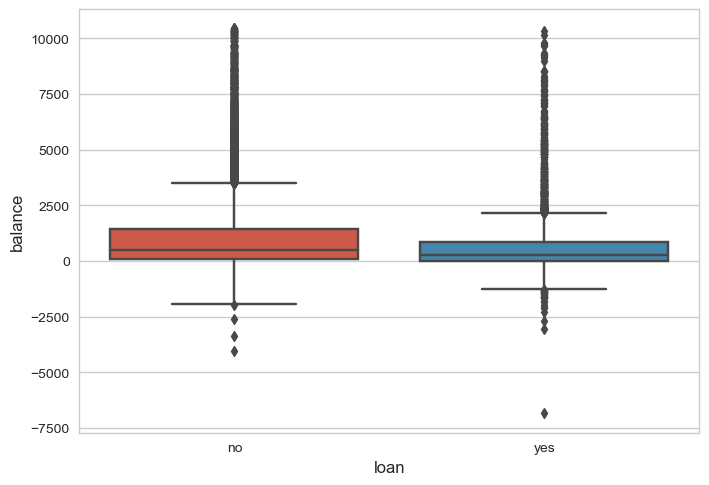

In [178]:
#Impact Of Previous Personal Loan On Bank Balance
ax = sns.boxplot(newdf2['loan'], newdf2['balance'], data=newdf2)

# Insights:

  - It is clear that person with previous PL seems to be struggling with bank balance as expected

# Impact Of Housing Loan On Customer Bank Balance

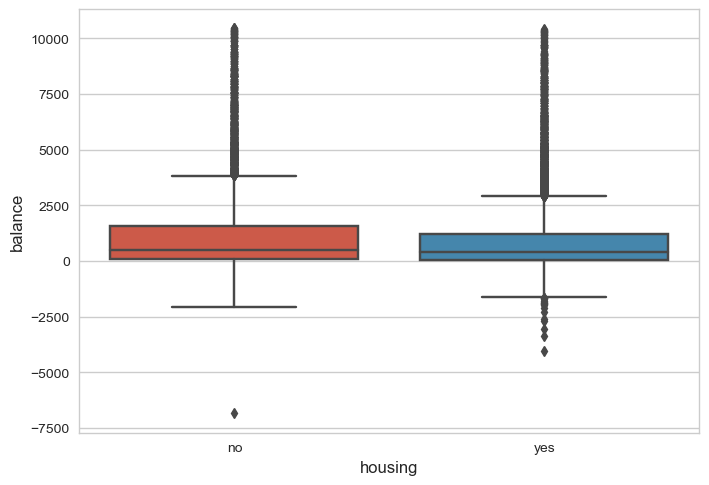

In [179]:
ax = sns.boxplot(newdf2['housing'], newdf2['balance'], data=newdf2)


# Quick Insights:

it is clear that person with previous housing loan has low bank balance

# Let's see default status of the customer impacts the bank balance

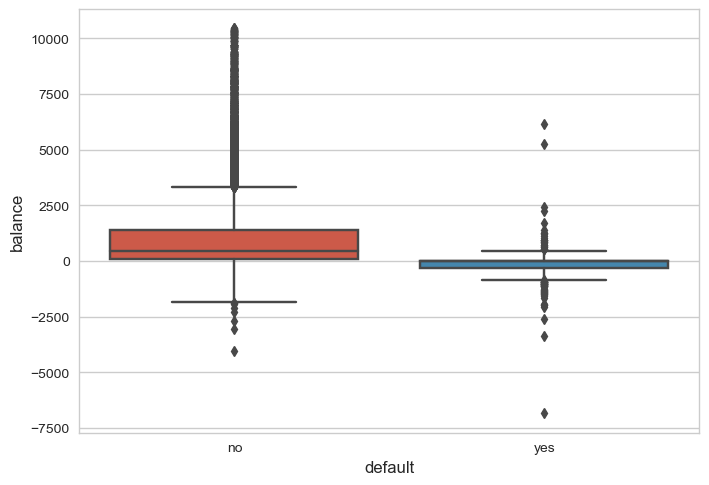

In [180]:
ax = sns.boxplot(newdf2['default'], newdf2['balance'], data=newdf2)

# Quick Insight:

it is visible that person with default credit history has borken bank balance.

# Multivariate Analysis:
Let's Visualize the relationship between 'duration' & 'campaign': with Target(FD) result

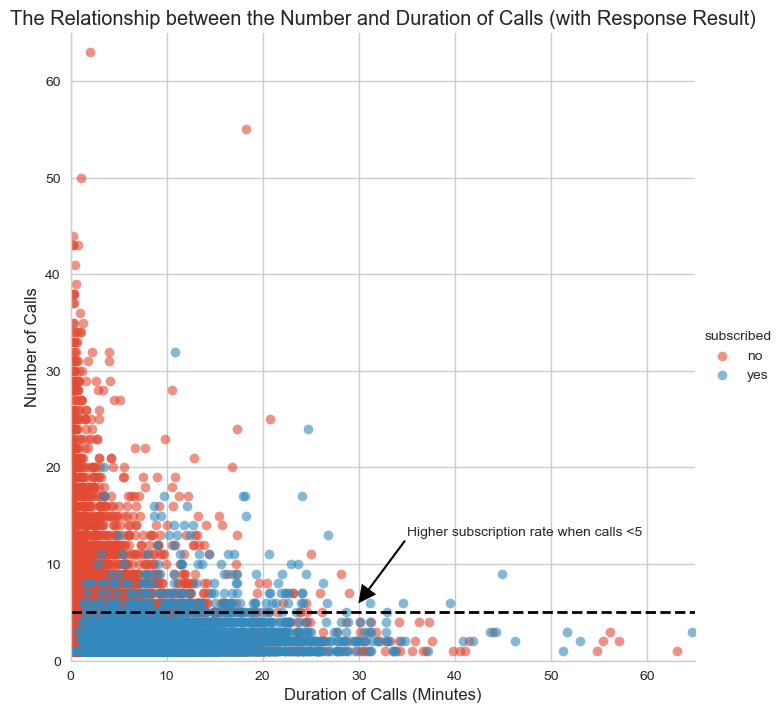

In [182]:
campaign_call_duration = sns.lmplot(x='duration', y='campaign',data = newdf2,hue = 'subscribed',fit_reg = False, scatter_kws={'alpha':0.6}, height =7)

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls (with Response Result)')

# Annotation
plt.axhline(y=5, linewidth=2, color="k", linestyle='--')
plt.annotate('Higher subscription rate when calls <5',xytext = (35,13),arrowprops=dict(color = 'k', width=1),xy=(30,6))
plt.show()

# Quick Insights:

- Here we can see that customer who said no, were contacted more than 10 times and had a small call duration . while customers 
who subscribed to FD were approached fewer times(less than 10 times ) 
and had longer call duration. It is visible that after five campaign calls, clients are more likely to reject the term deposit 
unless the call duration is high.

- Most of the customers who subscribed to fd were approached by less than 10 times.

So it is advisable that the bank should avoid calling a client for more than five times, as it seems that customers don't like
that move.

Let's understand how the subscription rate get's affected by customer's credit default status & bank balance

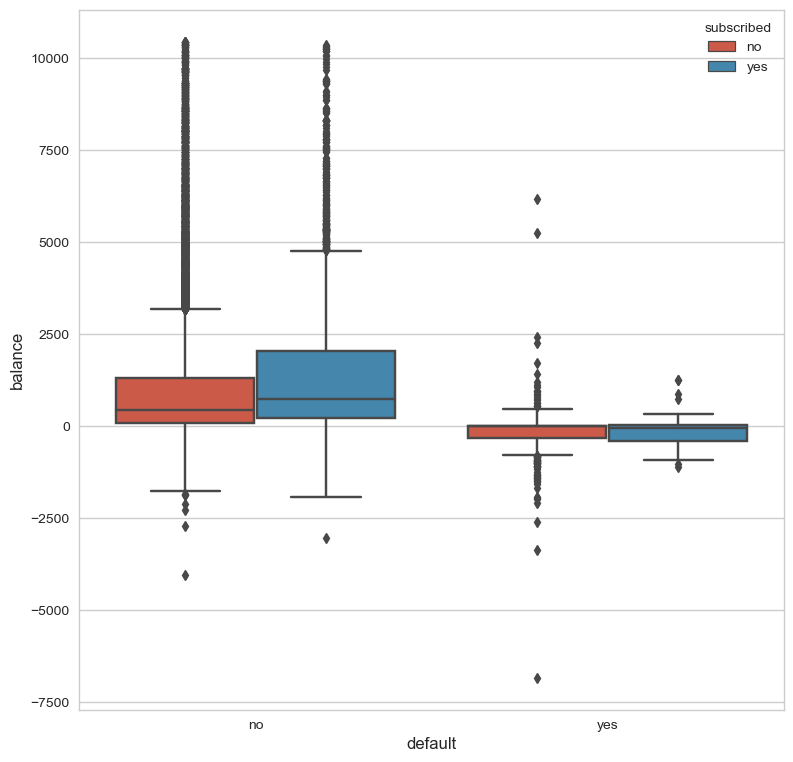

In [183]:
# ax.set_xticklabels(df["default"].unique(), rotation=45, rotation_mode="anchor")

# plt.style.use('dark_background')

fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(221)
ax = sns.boxplot(newdf2['default'], newdf2['balance'], hue = "subscribed", data=newdf2)

# quick insights:
There is clear insight that customers who has not defaulted, have higher average bank balance and more likely to subscribe to FD option
The customer with dafult stataus have negative to very low bank balance and are very less likely to avail FD.

# Let's understand how the subscription rate get's affected by customer's education level & bank balance

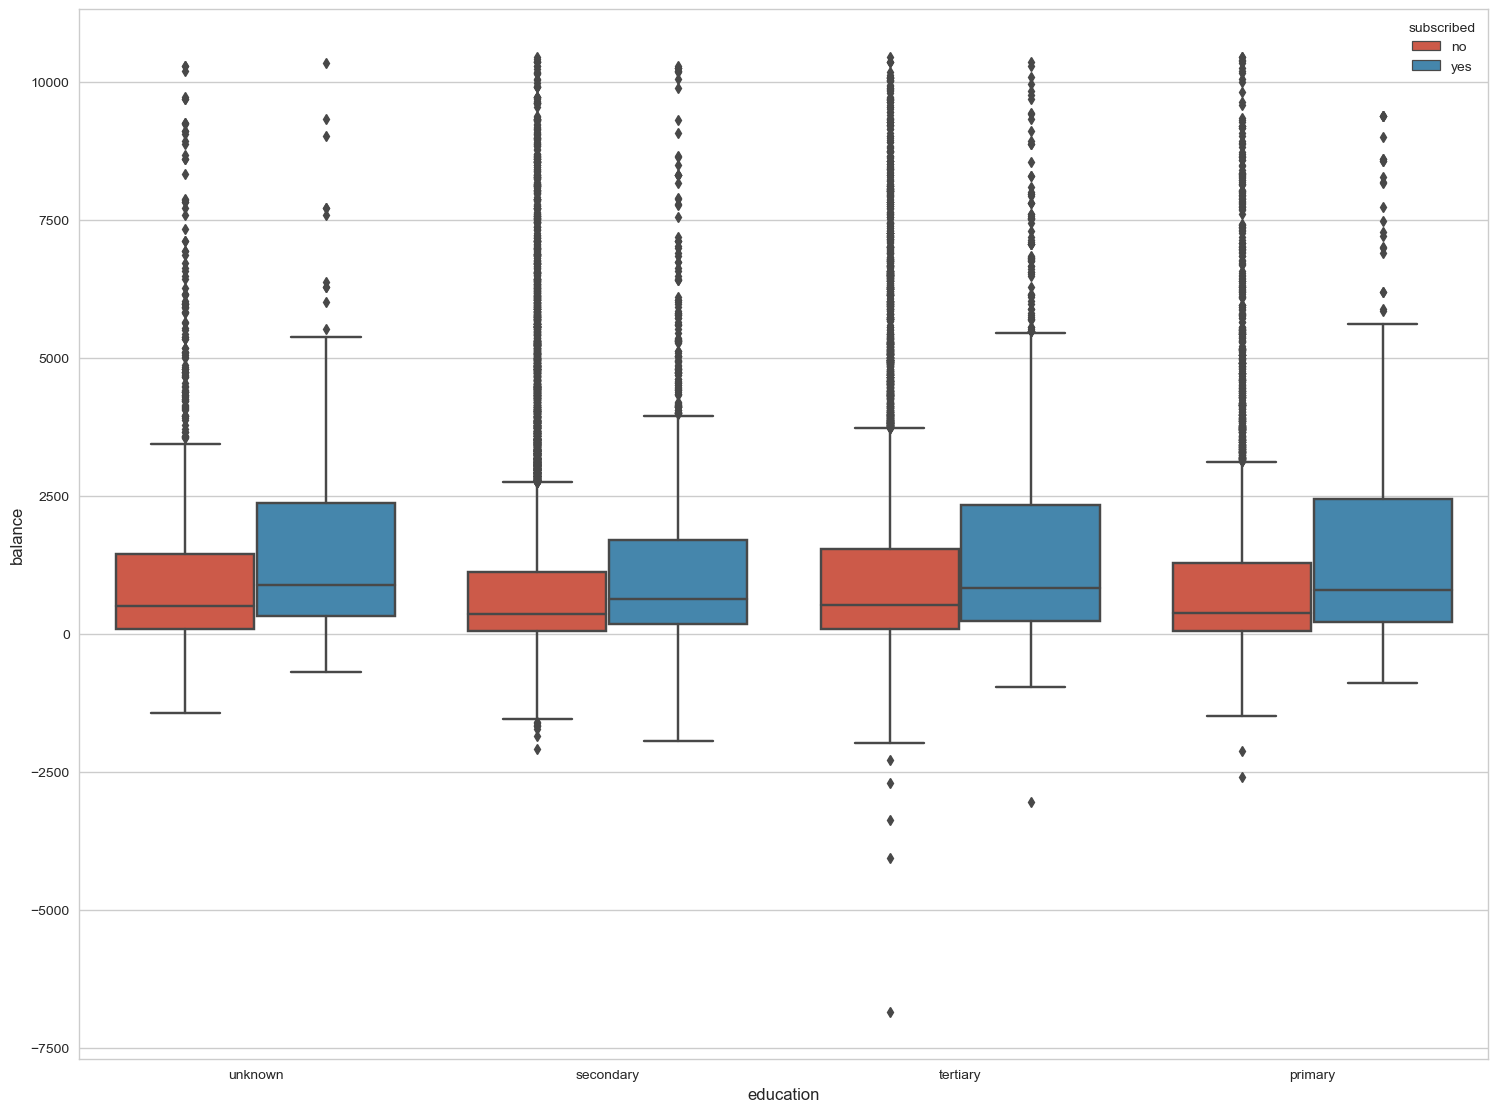

In [186]:
#imapct of job type, balance on fd suscription.

fig = plt.figure(figsize=(40,30))
ax1 = fig.add_subplot(221)
ax1 = sns.boxplot(newdf2['education'], newdf2['balance'], hue = "subscribed", data=newdf2)

# Quick Insights:

Customers with higher education tends to have higher bank balance and more fd subscription rate, they also have higher number of customers who refused fd option.
customers with unknown education level aslo seems to have higher fd subscription and ranks second to tertiary.
Customers with primary level eduaction also tends to have high fd subscription rate clos to tertiary
So there seems to be no clear trend here i terms of how education impacts fd subscription decision.

# Let's understand how the subscription rate get's affected by customer's Job Type & bank balance

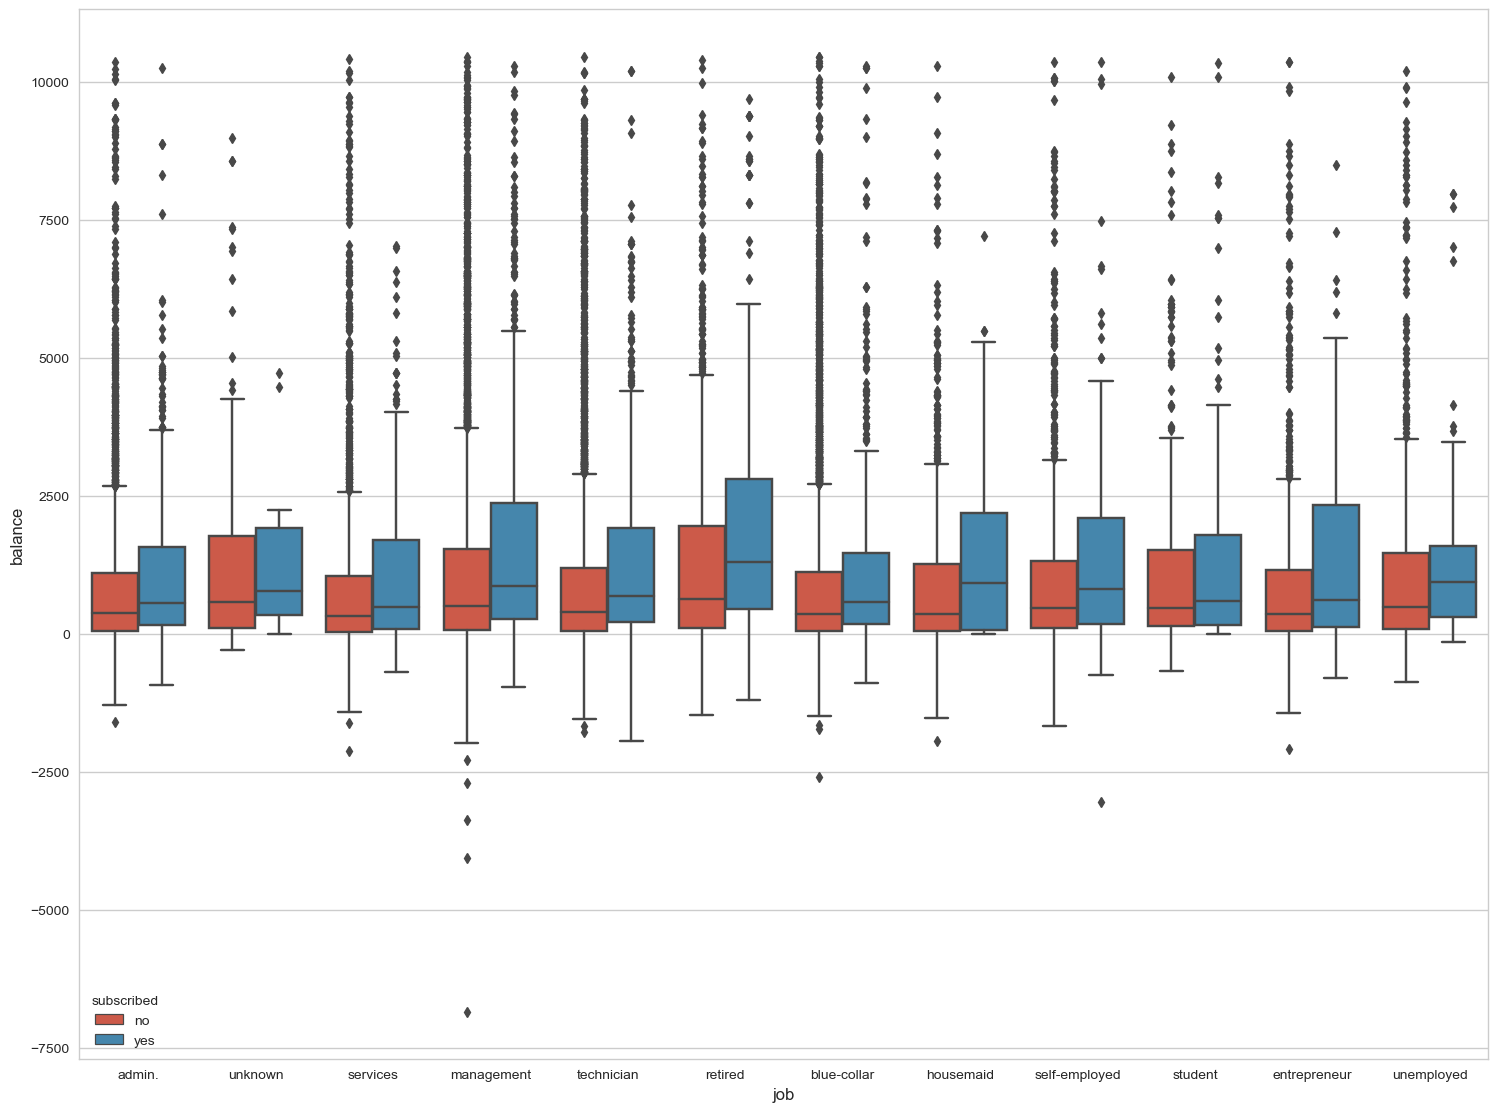

In [187]:
#imapct of education, balance on fd suscription.

fig = plt.figure(figsize=(40,30))
ax = fig.add_subplot(221)
ax = sns.boxplot(newdf2['job'], newdf2['balance'], hue = "subscribed", data=newdf2)

# Quick Insights:

 - Customers who are retired seems to have more bank balance and more FD subscription rate.
 -  Management professional seems to have less negative bank balance as compared to retired and also have second highest bank 
    balance and fd  subscription rate
 - student doesn't seems to have negative bank balance ans so is the case with housemaid who seems to have very little negative
bank balance . 

# Let's understand how the subscription rate get's affected by customer's marital status & bank balance

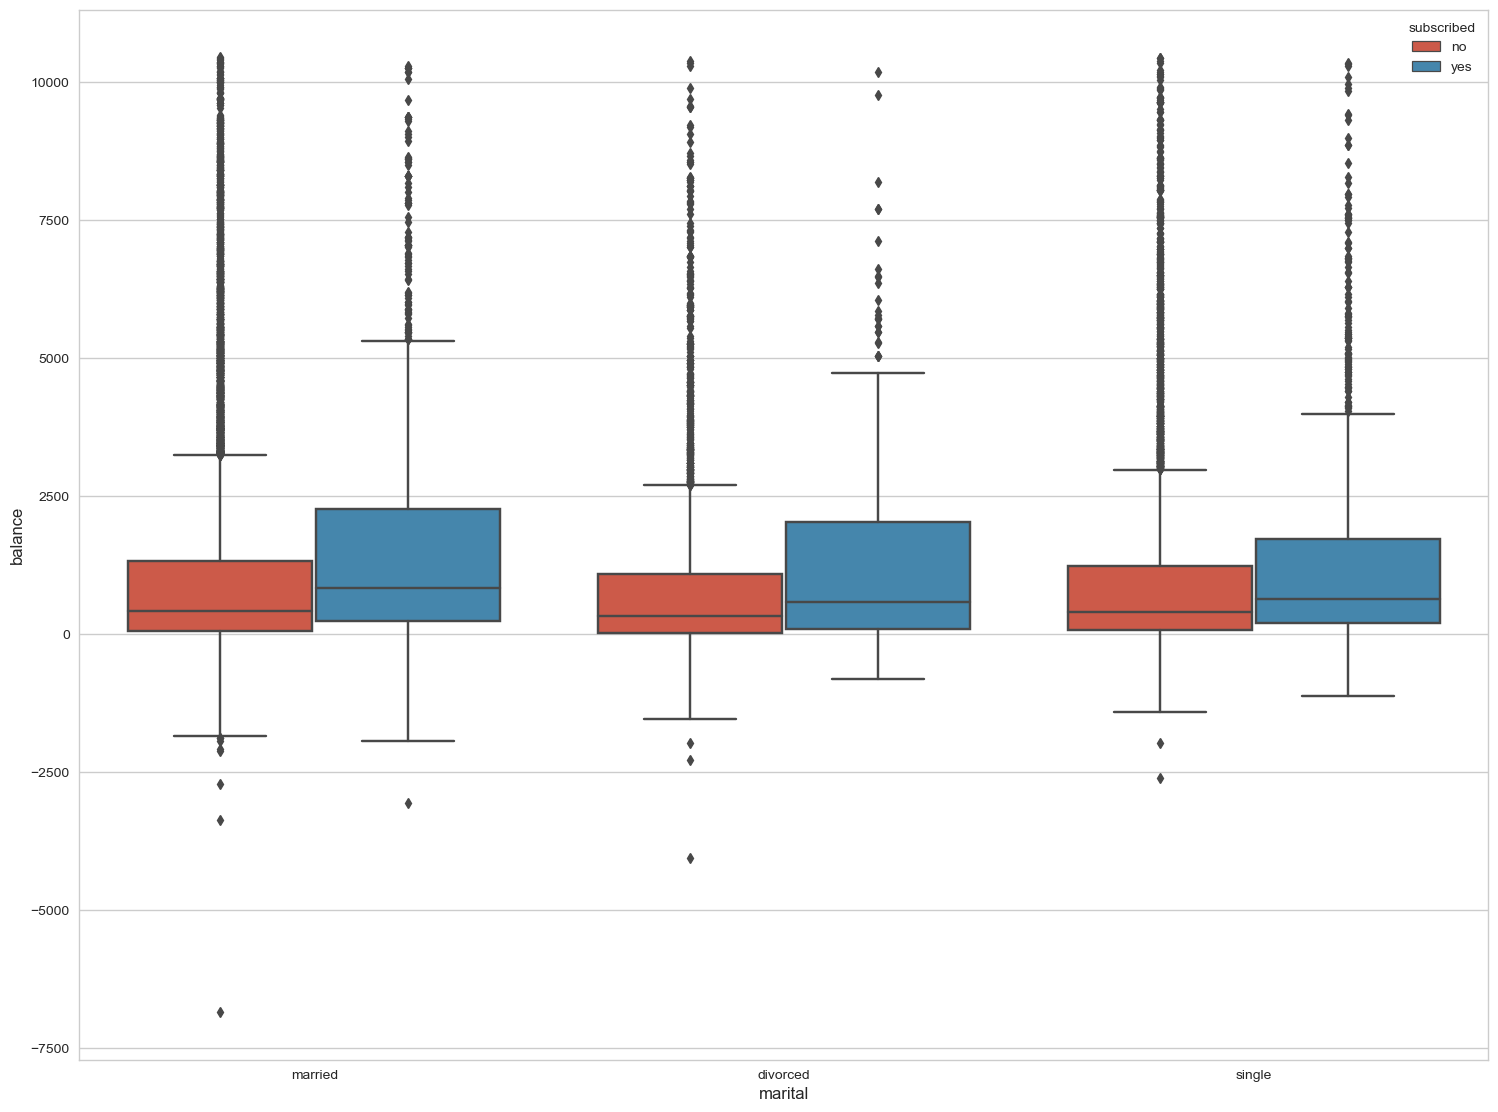

In [189]:
#imapct of marital status, balance on fd suscription.

fig = plt.figure(figsize=(40,30))
ax = fig.add_subplot(221)
ax = sns.boxplot(newdf2['marital'], newdf2['balance'], hue = "subscribed", data=newdf2)

# Insights:

married customers seems to have higher bank balance and so are more likely to subscriobe to FD.

# Let's understand how the subscription rate get's affected by customer's Personal loan status & bank balance

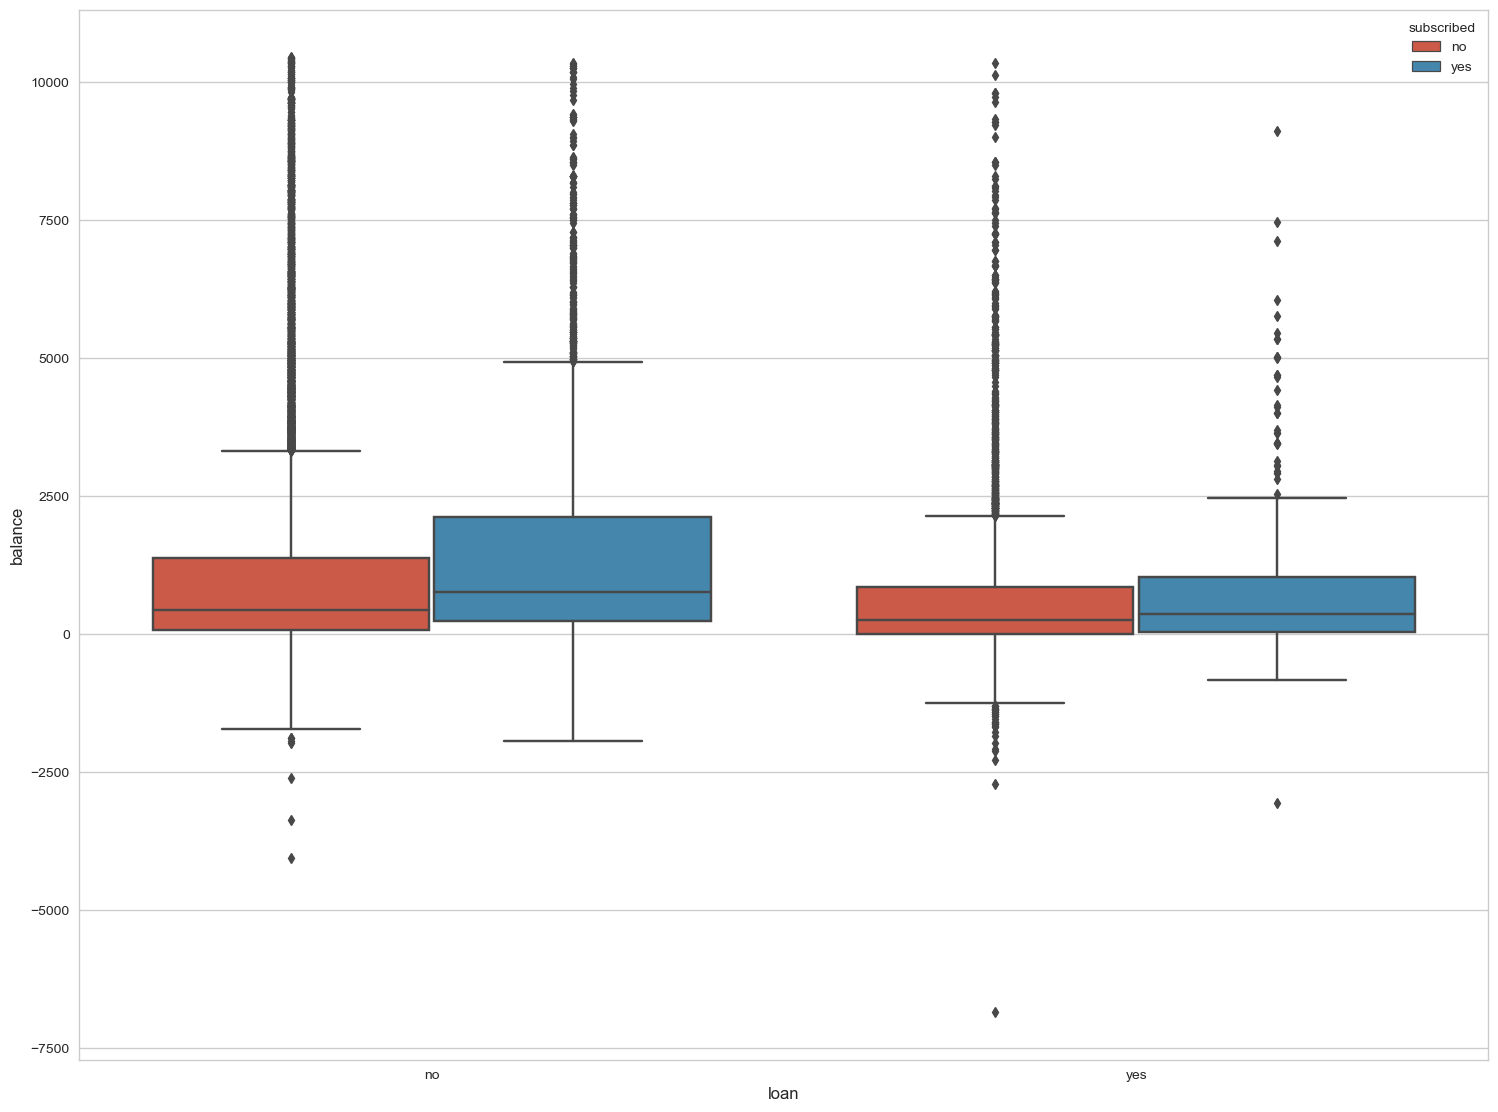

In [191]:
#imapct of personal loan status, balance on fd suscription.

fig = plt.figure(figsize=(40,30))
ax = fig.add_subplot(221)
ax = sns.boxplot(newdf2['loan'], newdf2['balance'], hue = "subscribed", data=newdf2)

# Insights: 
customers with no Personal loan seems to have higher bank balance and higer FD subscription rate

# Let's understand how the subscription rate get's affected by customer's housing loan status & bank balance

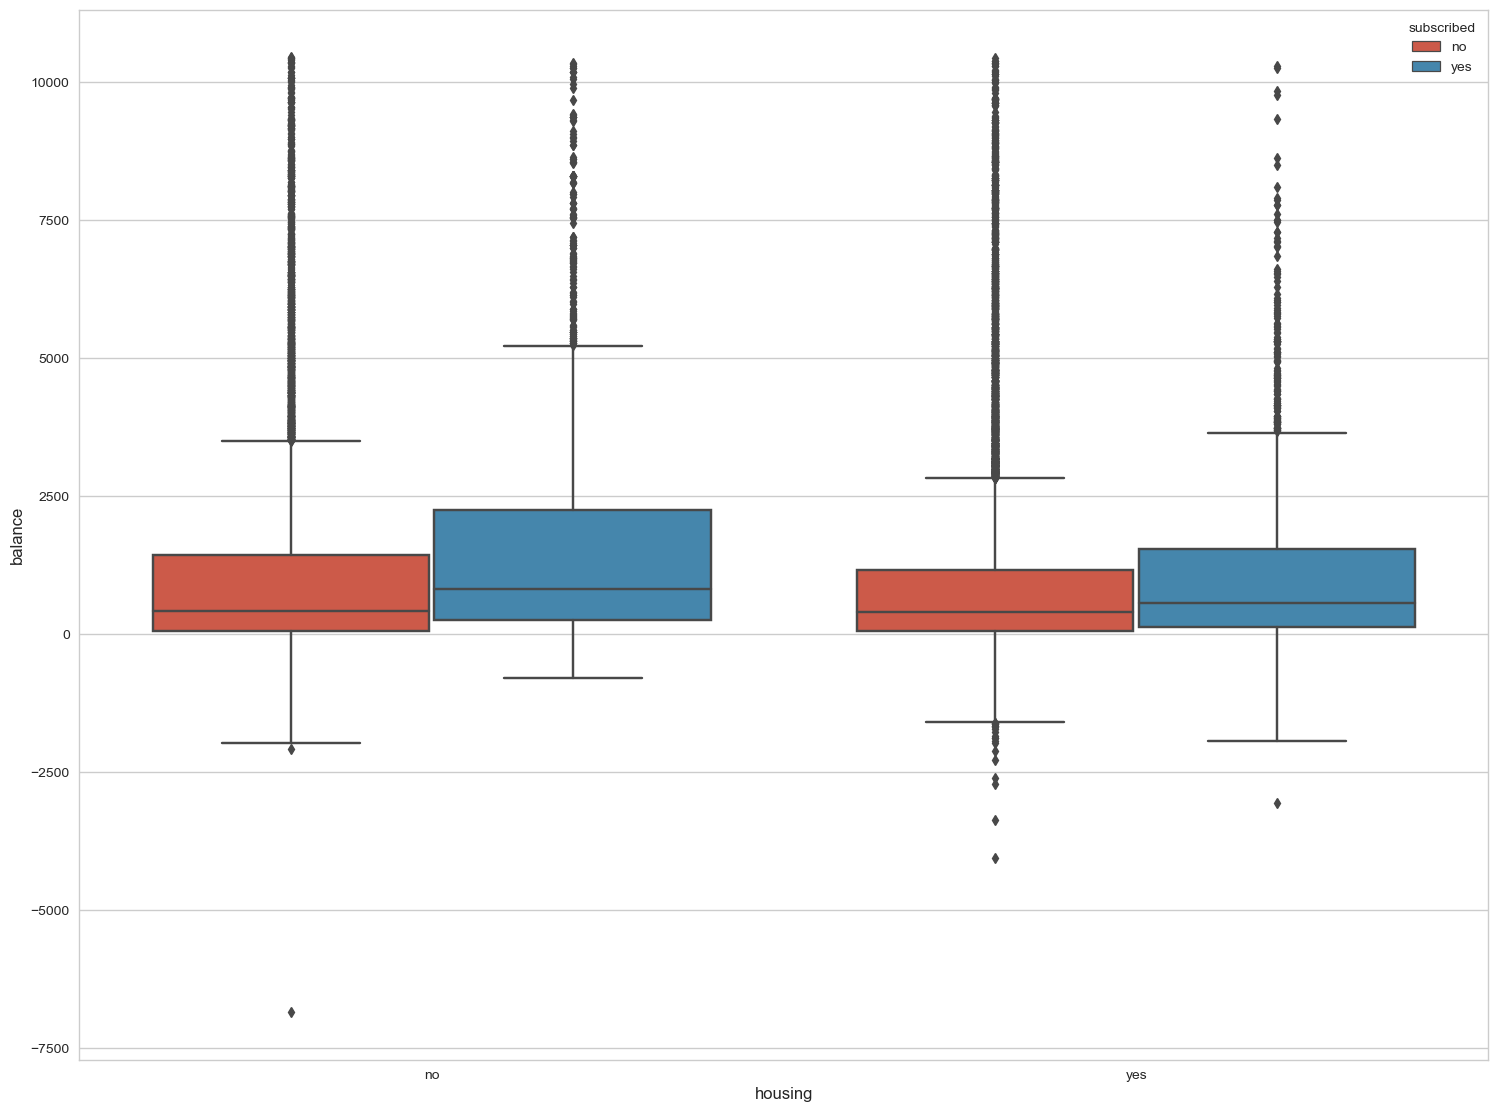

In [192]:
#imapct of housing loan status, balance on fd suscription.

fig = plt.figure(figsize=(40,30))
ax = fig.add_subplot(221)
ax = sns.boxplot(newdf2['housing'], newdf2['balance'], hue = "subscribed", data=newdf2)

# Insights: 
    Customers with no housing loan seems to have higher bank balance and so are more likely to opt for FD.

# Let's understand how the subscription rate get's affected by age & bank balance

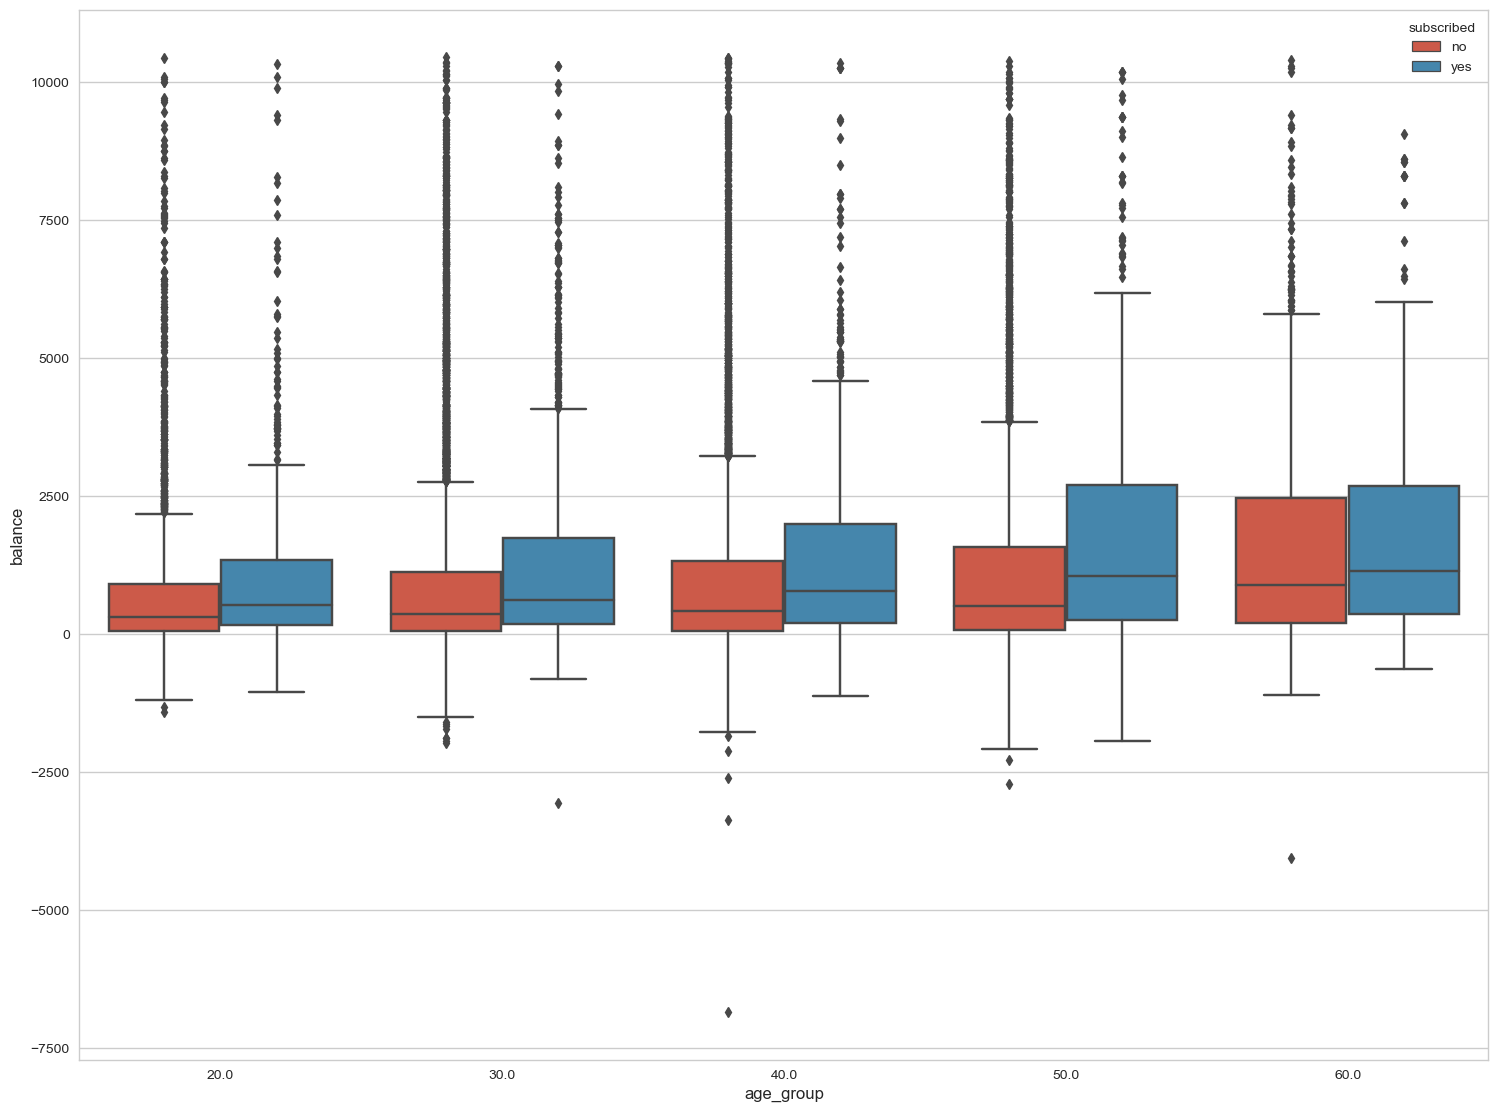

In [193]:
#imapct of contact type, bank balance on fd suscription.

fig = plt.figure(figsize=(40,30))
ax = fig.add_subplot(221)
ax = sns.boxplot(newdf2['age_group'], newdf2['balance'], hue = "subscribed", data=newdf2)

# imapact of contact type, bank balance on fd suscription.
Customers falling in the age gorup of 50-60 & 60-70 seems to have higher FD subscription rate, as they have 
higher bank balance also.
It seems like as age increases customer are more oriented towards FD as their best saving & investment option.

# Let's understand how each numerical attributes are correlated to measure their value proposition in building our model going forward:

In [194]:
#CORRELATION MATRIX FOR ALL THE NUMERICAL ATTRIBUTES: 

newdf2.corr()

# Let's Change 'month' from words to numbers for easier analysis
lst = [newdf2]
for column in lst:
    column.loc[column["month"] == "jan", "month_int"] = 1
    column.loc[column["month"] == "feb", "month_int"] = 2
    column.loc[column["month"] == "mar", "month_int"] = 3
    column.loc[column["month"] == "apr", "month_int"] = 4
    column.loc[column["month"] == "may", "month_int"] = 5
    column.loc[column["month"] == "jun", "month_int"] = 6
    column.loc[column["month"] == "jul", "month_int"] = 7
    column.loc[column["month"] == "aug", "month_int"] = 8
    column.loc[column["month"] == "sep", "month_int"] = 9
    column.loc[column["month"] == "oct", "month_int"] = 10
    column.loc[column["month"] == "nov", "month_int"] = 11
    column.loc[column["month"] == "dec", "month_int"] = 12
    
    


def convert(newdf2, new_column, old_column):
    newdf2[new_column] = newdf2[old_column].apply(lambda x: 0 if x == 'no' else 1)
    return newdf2[new_column].value_counts()

Correlation Matrix
                age   balance       day  duration  campaign     pdays  \
age        1.000000  0.105362 -0.010213 -0.004216  0.006860 -0.021642   
balance    0.105362  1.000000  0.007624  0.037935 -0.021395  0.013297   
day       -0.010213  0.007624  1.000000 -0.032512  0.160345 -0.088301   
duration  -0.004216  0.037935 -0.032512  1.000000 -0.080591  0.000184   
campaign   0.006860 -0.021395  0.160345 -0.080591  1.000000 -0.088383   
pdays     -0.021642  0.013297 -0.088301  0.000184 -0.088383  1.000000   
month_int  0.096305  0.102645  0.097734 -0.007151  0.055479 -0.103977   
previous   0.005708  0.025610 -0.048766  0.002122 -0.032834  0.428036   

           month_int  previous  
age         0.096305  0.005708  
balance     0.102645  0.025610  
day         0.097734 -0.048766  
duration   -0.007151  0.002122  
campaign    0.055479 -0.032834  
pdays      -0.103977  0.428036  
month_int   1.000000 -0.029255  
previous   -0.029255  1.000000  


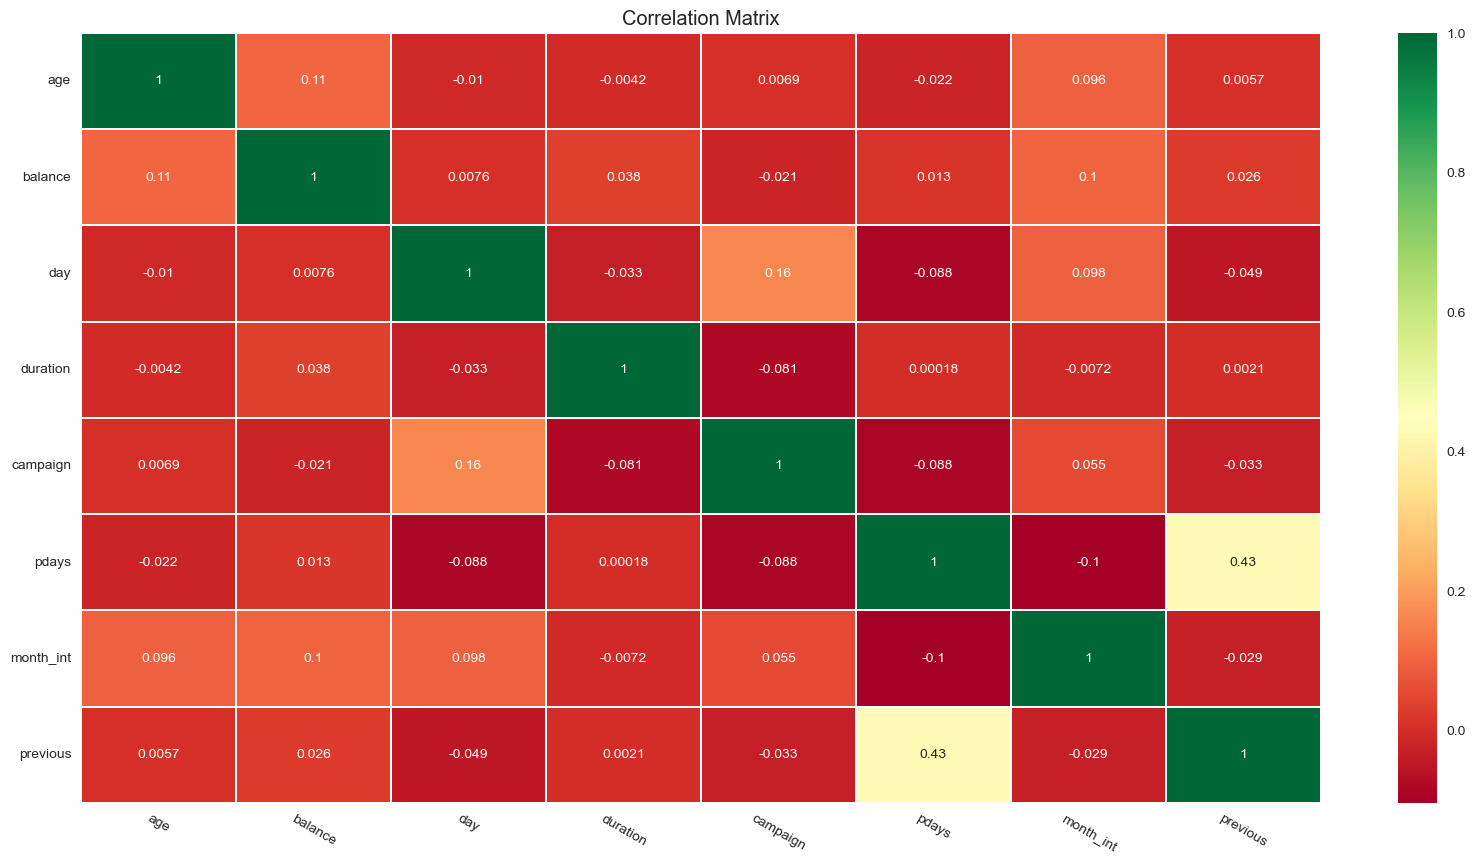

In [197]:
corr_data = newdf2[['age','balance','day','duration','campaign','pdays','month_int', 'previous','subscribed']]
corr = corr_data.corr()
print("Correlation Matrix")
print(corr)

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

# Quick Insights On Correlation Matrix:

-  Clearly, “campaign outcome” has a strong correlation with “duration”, a moderate correlation with “previous contacts”, 
and mild correlations between “balance”, “month of contact” and “number of campaign”. 
- We will further understand their influences on campaign outcome while building ML models.

# Pairplot Analysis For All Numercial Attributes:

In [198]:
#sns.pairplot(newdf2,diag_kind="kde")

# Cleaning Up Data & Preparing Data For Model Building

# 1. Removing Any Missing Or Meaningless Values

In [199]:
#As we saw at the start of the project that there are no missing value as such

newdf2.describe()

ID           age       balance           day      duration  \
count  31122.000000  31122.000000  31122.000000  31122.000000  31122.000000   
mean   22527.322409     40.894158   1085.812673     15.833751      4.300063   
std    13082.845175     10.597502   1720.978118      8.345385      4.282899   
min        2.000000     18.000000  -6847.000000      1.000000      0.000000   
25%    11194.000000     33.000000     68.000000      8.000000      1.720000   
50%    22442.500000     39.000000    431.000000     16.000000      3.000000   
75%    33867.500000     48.000000   1351.000000     21.000000      5.320000   
max    45211.000000     95.000000  10443.000000     31.000000     81.970000   

           campaign         pdays      previous     age_group     month_int  
count  31122.000000  31122.000000  31122.000000  31122.000000  31122.000000  
mean       2.766757     39.677656      0.573774     36.276589      6.129747  
std        3.114535     99.542851      2.430111     10.353060      2.395894  
min        1.000000     -1.000000      0.000000     20.000000      1.000000  
25%        1.000000     -1.000000      0.000000     30.000000      5.000000  
50%        2.000000     -1.000000      0.000000     30.000000      6.000000  
75%        3.000000     -1.000000      0.000000     40.000000      8.000000  
max       63.000000    871.000000    275.000000     60.000000     12.000000

In [207]:
#Let's See below what are the attributes which has some meaningless data which are not adding any vals for building better model
newdf2.head(31647)

ID  age         job   marital  education default  balance housing  \
0      26110   56      admin.   married    unknown      no     1933      no   
1      40576   31     unknown   married  secondary      no        3      no   
2      15320   27    services   married  secondary      no      891     yes   
3      43962   57  management  divorced   tertiary      no     3287      no   
4      29842   31  technician   married  secondary      no      119     yes   
...      ...  ...         ...       ...        ...     ...      ...     ...   
31642  36483   29  management    single   tertiary      no        0     yes   
31643  40178   53  management  divorced   tertiary      no      380      no   
31644  19710   32  management    single   tertiary      no      312      no   
31645  38556   57  technician   married  secondary      no      225     yes   
31646  14156   55  management  divorced  secondary      no      204     yes   

      loan    contact  ...  month duration  campaign  pdays  previous  \
0       no  telephone  ...    nov     0.73         2     -1         0   
1       no   cellular  ...    jul     1.52         2     -1         0   
2       no   cellular  ...    jul     4.00         1     -1         0   
3       no   cellular  ...    jun    14.45         1     84         3   
4       no   cellular  ...    feb     6.33         1     -1         0   
...    ...        ...  ...    ...      ...       ...    ...       ...   
31642   no   cellular  ...    may     1.93         2     -1         0   
31643  yes   cellular  ...    jun     7.30         2     -1         0   
31644   no   cellular  ...    aug     0.62         3     -1         0   
31645   no  telephone  ...    may     0.37         7    337        12   
31646   no   cellular  ...    jul    32.88         2     -1         0   

       poutcome subscribed age_group    balance_group month_int  
0       unknown         no      50.0  average balance      11.0  
1       unknown         no      30.0      low balance       7.0  
2       unknown         no      20.0      low balance       7.0  
3       success        yes      50.0  average balance       6.0  
4       unknown         no      30.0      low balance       2.0  
...         ...        ...       ...              ...       ...  
31642   unknown         no      20.0       no balance       5.0  
31643   unknown        yes      50.0      low balance       6.0  
31644   unknown         no      30.0      low balance       8.0  
31645   failure         no      50.0      low balance       5.0  
31646   unknown        yes      50.0      low balance       7.0  

[29854 rows x 21 columns]

# There are attributes having values like “unknown”, “others”, which are helpless just like missing values. Thus, these ambiguous values are removed from the dataset.

 - poutcome has many unknown values which doesn't makes any sense, so we can remove it. 
 - Let's identify and treat them below  

In [208]:
# Step 1: Delete the rows in  column 'poutcome' where it contains 'other'
condition = newdf2.poutcome == 'other'
newdf2.drop(newdf2[condition].index, axis = 0, inplace = True)
newdf2.describe()

ID           age       balance           day      duration  \
count  29854.000000  29854.000000  29854.000000  29854.000000  29854.000000   
mean   21964.331982     40.933208   1080.827795     15.882897      4.301710   
std    13006.310332     10.569387   1718.928569      8.345580      4.288686   
min        2.000000     18.000000  -6847.000000      1.000000      0.000000   
25%    10734.250000     33.000000     66.000000      8.000000      1.730000   
50%    21499.500000     39.000000    426.000000     16.000000      3.000000   
75%    33135.500000     48.000000   1341.750000     22.000000      5.300000   
max    45210.000000     95.000000  10443.000000     31.000000     81.970000   

           campaign         pdays      previous     age_group     month_int  
count  29854.000000  29854.000000  29854.000000  29854.000000  29854.000000  
mean       2.779661     31.612950      0.426375     36.321431      6.158471  
std        3.157044     89.928251      1.506934     10.337194      2.359020  
min        1.000000     -1.000000      0.000000     20.000000      1.000000  
25%        1.000000     -1.000000      0.000000     30.000000      5.000000  
50%        2.000000     -1.000000      0.000000     30.000000      6.000000  
75%        3.000000     -1.000000      0.000000     40.000000      8.000000  
max       63.000000    871.000000     38.000000     60.000000     12.000000

As we removed other variable from poutcome attribure we can see that now the total record count has changed to 29854 from 
original 31647 .Treating Education & Job Column

In [209]:
for col in newdf2.select_dtypes(include='object').columns:
    print(col)
    print(newdf2[col].unique())

job
['admin.' 'unknown' 'services' 'management' 'technician' 'retired'
 'blue-collar' 'housemaid' 'self-employed' 'student' 'entrepreneur'
 'unemployed']
marital
['married' 'divorced' 'single']
education
['unknown' 'secondary' 'tertiary' 'primary']
default
['no' 'yes']
housing
['no' 'yes']
loan
['no' 'yes']
contact
['telephone' 'cellular' 'unknown']
month
['nov' 'jul' 'jun' 'feb' 'sep' 'jan' 'may' 'aug' 'apr' 'oct' 'mar' 'dec']
poutcome
['unknown' 'success' 'failure']
subscribed
['no' 'yes']
balance_group
['average balance' 'low balance' 'no balance' 'high balance']


In [210]:
newdf2[['job','education']] = newdf2[['job','education']].replace(['unknown'],'other')

#Let's See our dataframe & verify if it has been updated
print("\n\nAfter Treatment", newdf2['education'].count)




After Treatment <bound method Series.count of 0            other
1        secondary
2        secondary
3         tertiary
4        secondary
           ...    
31642     tertiary
31643     tertiary
31644     tertiary
31645    secondary
31646    secondary
Name: education, Length: 29854, dtype: object>


# Let's get rid of contact Column As It has no significant role to play in predicting outcome.

In [211]:
newdf2['contact'].value_counts() 

cellular     18945
unknown       9026
telephone     1883
Name: contact, dtype: int64

In [212]:
# Drop column "contact" which seems to be not so useful

new_df1 = newdf2.copy()
newdf2.drop('contact', axis=1, inplace = True)
new_df2 = newdf2.copy()

In [213]:
# Let's get rid of  customer values with 'other' in education column as it doesn't make any sense to have such values in making 
#any useful predcition .

logic = (new_df2['education'] == 'other')
new_df2.drop(new_df2[logic].index, axis = 0, inplace = True)
new_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28604 entries, 1 to 31646
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             28604 non-null  int64  
 1   age            28604 non-null  int64  
 2   job            28604 non-null  object 
 3   marital        28604 non-null  object 
 4   education      28604 non-null  object 
 5   default        28604 non-null  object 
 6   balance        28604 non-null  int64  
 7   housing        28604 non-null  object 
 8   loan           28604 non-null  object 
 9   day            28604 non-null  int64  
 10  month          28604 non-null  object 
 11  duration       28604 non-null  float64
 12  campaign       28604 non-null  int64  
 13  pdays          28604 non-null  int64  
 14  previous       28604 non-null  int64  
 15  poutcome       28604 non-null  object 
 16  subscribed     28604 non-null  object 
 17  age_group      28604 non-null  float64
 18  balanc

# Pre-Processing Data
In this section we will deal with

Transforming the required attribute which are categorical to numerical so that our mdoel can process

Data imbalance

Steps to treat data imbalance

Selcting most relevant features for model building

# Transforming All Categorical Column to Numercial Values using encoding

In [215]:
# Function to replace marital values with numercial
def marital_num(df):
    mar= [df]
    for data in mar: 
        data.loc[data['marital'] == "married", "marital_int"] = 1
        data.loc[data['marital'] == "single", "marital_int"] = 2
        data.loc[data['marital'] == "divorced", "marital_int"] = 3
        
#Job

#JOB: 
def job_num(df):
    jb= [df]
    for data in jb: 
        data.loc[data['job'] == "management", "Job_int"] = 1
        data.loc[data['job'] == "technician", "Job_int"] = 2
        data.loc[data['job'] == "entrepreneur", "Job_int"] = 3
        data.loc[data['job'] == "blue-collar", "Job_int"] = 4
        data.loc[data['job'] == "retired", "Job_int"] = 5
        data.loc[data['job'] == "admin.", "Job_int"] = 6
        data.loc[data['job'] == "services", "Job_int"] = 7
        data.loc[data['job'] == "self-employed", "Job_int"] = 8
        data.loc[data['job'] == "unemployed", "Job_int"] = 9
        data.loc[data['job'] == "student", "Job_int"] = 10
        data.loc[data['job'] == "housemaid", "Job_int"] = 11
        data.loc[data['job'] == "other", "Job_int"] = 12
        
#Education:

def edu_num(df):
    edu= [df]
    for data in edu: 
        data.loc[data['education'] == "primary", "education_int"] = 1
        data.loc[data['education'] == "secondary",  "education_int"] = 2
        data.loc[data['education'] == "tertiary", "education_int"] = 3
        data.loc[data['education'] == "unknown", "education_int"] = 4
    

#    
def pout_num(df):
    pout= [df]
    for data in pout: 
        data.loc[data['poutcome'] == "failure", "poutcome_int"] = 1
        data.loc[data['poutcome'] == "success",  "poutcome_int"] = 2
        data.loc[data['poutcome'] == "unknown", "poutcome_int"] = 3  


marital_num(new_df2)
job_num(new_df2)
edu_num(new_df2)
pout_num(new_df2)
    

convert(new_df2, "housing_binary", "housing")
convert(new_df2, "default_binary", "default")
convert(new_df2, "loan_binary", "loan")
convert(new_df2, "Fd Outcome", "subscribed")


new_df2.drop(['age','job', 'balance_group','housing','marital', 'default', 'loan', 'housing', 'education', 'month', 'poutcome', 'subscribed'], axis = 1, inplace = True) 
new_df2

ID  balance  day  duration  campaign  pdays  previous  age_group  \
1      40576        3   20      1.52         2     -1         0       30.0   
2      15320      891   18      4.00         1     -1         0       20.0   
3      43962     3287   22     14.45         1     84         3       50.0   
4      29842      119    4      6.33         1     -1         0       30.0   
5      29390        0    2      1.93         3     -1         0       30.0   
...      ...      ...  ...       ...       ...    ...       ...        ...   
31642  36483        0   12      1.93         2     -1         0       20.0   
31643  40178      380    5      7.30         2     -1         0       50.0   
31644  19710      312    7      0.62         3     -1         0       30.0   
31645  38556      225   15      0.37         7    337        12       50.0   
31646  14156      204   11     32.88         2     -1         0       50.0   

       month_int  marital_int  Job_int  education_int  poutcome_int  \
1            7.0          1.0     12.0            2.0           3.0   
2            7.0          1.0      7.0            2.0           3.0   
3            6.0          3.0      1.0            3.0           2.0   
4            2.0          1.0      2.0            2.0           3.0   
5            2.0          2.0      1.0            3.0           3.0   
...          ...          ...      ...            ...           ...   
31642        5.0          2.0      1.0            3.0           3.0   
31643        6.0          3.0      1.0            3.0           3.0   
31644        8.0          2.0      1.0            3.0           3.0   
31645        5.0          1.0      2.0            2.0           1.0   
31646        7.0          3.0      1.0            2.0           3.0   

       housing_binary  default_binary  loan_binary  Fd Outcome  
1                   0               0            0           0  
2                   1               0            0           0  
3                   0               0            0           1  
4                   1               0            0           0  
5                   1               0            0           0  
...               ...             ...          ...         ...  
31642               1               0            0           0  
31643               0               0            1           1  
31644               0               0            0           0  
31645               1               0            0           0  
31646               1               0            0           1  

[28604 rows x 17 columns]

# LABEL ENCODER():

In [361]:
# import the library LABEL ENCODER :
from sklearn.preprocessing import LabelEncoder

In [363]:
#Fit the transform
LE = LabelEncoder()
train["subscribed"]=LE.fit_transform(train["subscribed"])

In [365]:
# apply the transform:
train.subscribed.value_counts()

0    27932
1     3715
Name: subscribed, dtype: int64

# Let's Do A Pairplot Analysis:
Before we move ahead to clean & pre-process our data. As all our attributes has been transformed to numercial values.

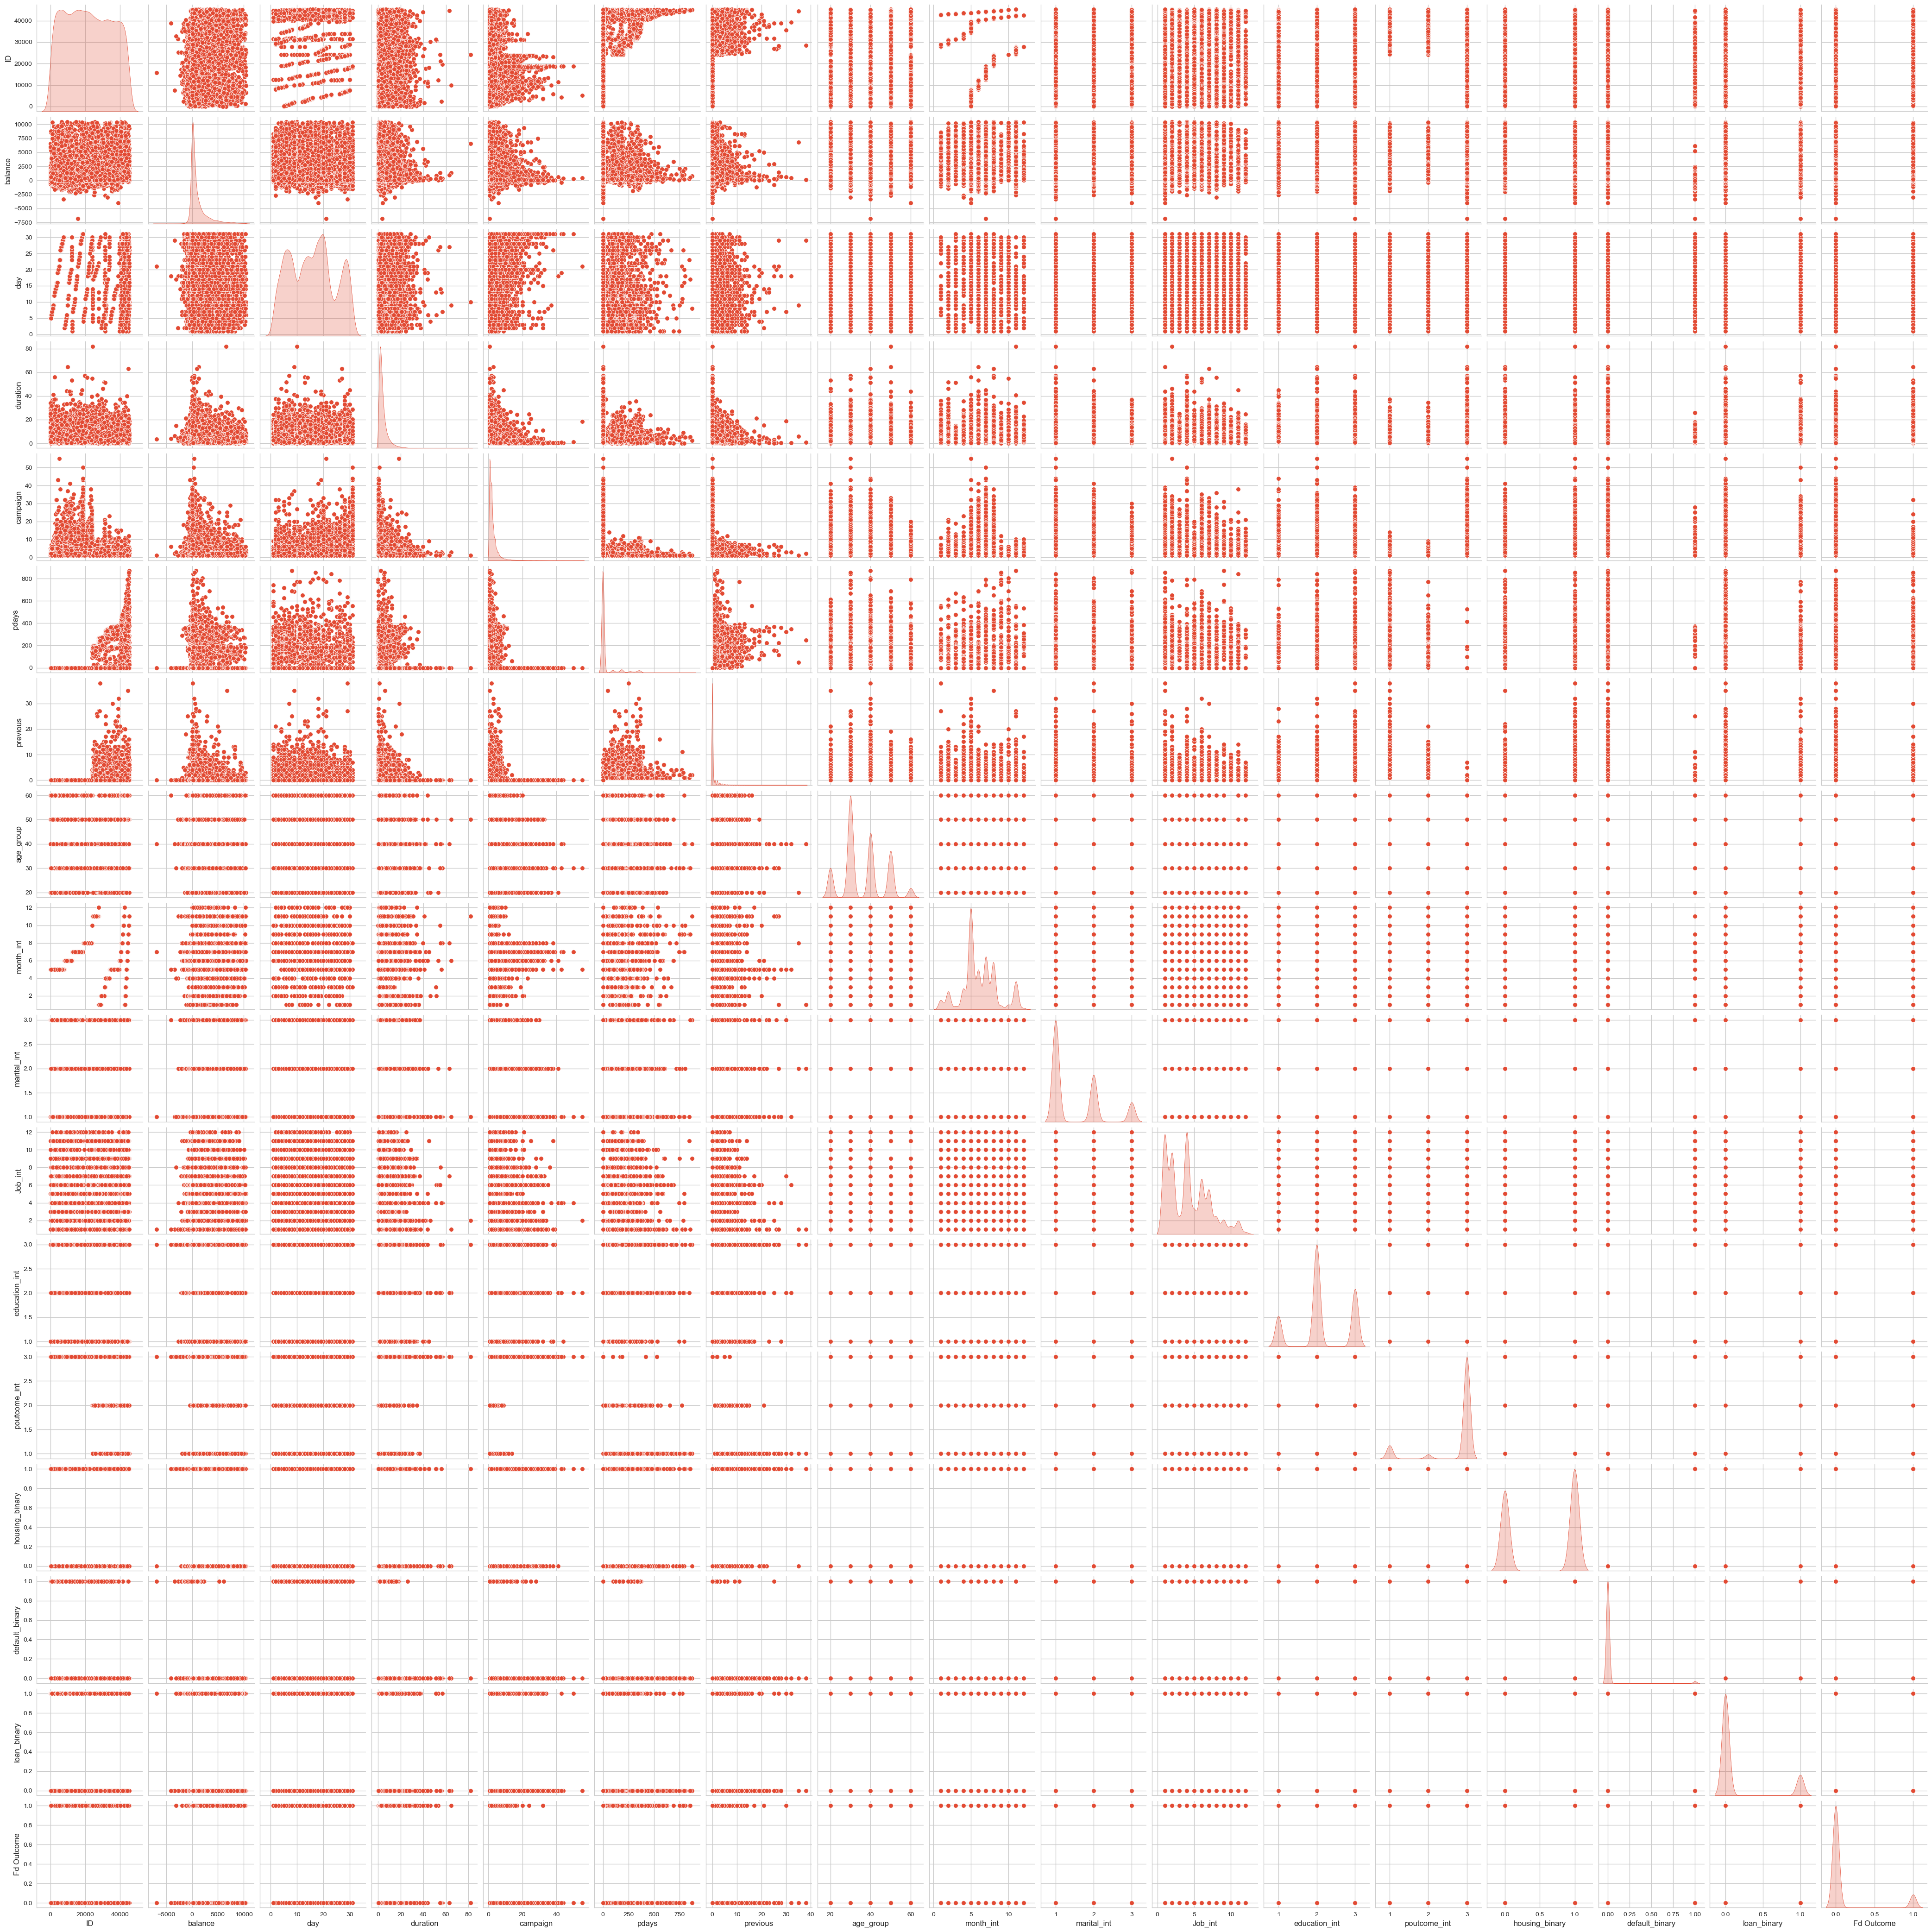

In [217]:
sns.pairplot(new_df2,diag_kind="kde")

# Let's Create Some Important Functions Which will be used frequently in our model building:

In [218]:
# # # Models to Fit & Evaluate

#from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_recall_curve
from sklearn.metrics import confusion_matrix,classification_report,f1_score, precision_score, recall_score, roc_curve, auc, average_precision_score, roc_auc_score, accuracy_score, precision_recall_curve, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Creating two different data sets of dependent and independent attributes
We will separate data into feature & target set
Then we will split our data sets into train & test data

In [231]:
from sklearn.model_selection import train_test_split

# # # Split Into Training and Testing Sets

# Separate out the features and targets & Print Their Shape.
#features = new_df2.drop(columns='Fd Outcome')
#targets = pd.DataFrame(new_df2['Fd Outcome'])

array = new_df2.values

X = array[:,0:15]
y = array[:,15]

#print("Y value is : ", y)
#print("\nTarget value is : ", targets)

# Split into 70% training and 30% testing set
#X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size = 0.3, random_state = 42)
# Split into 70% training and 30% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

# Feature Scaling:
Feature scaling (also known as data normalization) is the method used to standardize the range of features of data. Since,
the range of values of data may vary widely, it becomes a necessary step in data preprocessing while using machine learning
algorithms.

Specially when there is any algorithm that computes distance or assumes normality, scale your features1. When dealing with
datframe series with diffrent unit type and if the diffrence of sclae within the series varies a lot, we should look for 
feature scaling as a major pre-processing step before ml model building.

# Standardization:
    We will use Min-Max Scaler/standardscaler as this will suit to our requirement:

In [ ]:
Some examples of algorithms where feature scaling matters are:
k-nearest neighbors with an Euclidean distance measure if want all features to contribute equally
k-means (see k-nearest neighbors)
logistic regression, SVMs, perceptrons, neural networks etc.
if we are using gradient descent/ascent-based optimization, otherwise some weights will update much faster than others.

In [233]:
#Min-Max Scaling & Standard Scaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#MINMAX: 
minmax= MinMaxScaler()
X_train2 = pd.DataFrame(minmax.fit_transform(X_train))
X_test2 = pd.DataFrame(minmax.transform(X_test))


MinMax_X_train = X_train2
MinMax_X_test = X_test2
#print("Mimmax scaled train data\n", MinMax_X_train)
#print("Mimmax scaled test data\n", MinMax_X_test)

#STANDARD Sclaer: 

stdsc= StandardScaler()
X_train3 = pd.DataFrame(stdsc.fit_transform(X_train))
X_test3 = pd.DataFrame(stdsc.transform(X_test))

StdSc_X_train = X_train3
StdSc_X_test = X_test3

# Normalization: :

In [234]:
from sklearn.preprocessing import Normalizer
from scipy import stats

#Normalization Using Normalizer(): 
norm= Normalizer()
X_train4 = pd.DataFrame(norm.fit_transform(X_train))
X_test4 = pd.DataFrame(norm.transform(X_test))

Norm_X_train = X_train4
Norm_X_test = X_test4

In [ ]:
Hunt For Best Base Classification Supervised Learning Model:
1. Logistic Model
We will make use of both non-scaled & Scaled data (X_train, X_test & MinMax_X_train, MinMax_X_test):

# Balancing dataset:

In [409]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [410]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')

In [411]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy=0.5)

In [412]:
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)

In [426]:
# define dataset
X, y = make_classification(n_samples=10000, weights=[0.12], flip_y=0)

In [428]:
# example of random oversampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
# define dataset
X, y = make_classification(n_samples=10000, weights=[0.12], flip_y=0)
# summarize class distribution
print(Counter(y))
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='auto')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_over))

Counter({1: 8800, 0: 1200})
Counter({0: 8800, 1: 8800})


# BEST RANDOM STATE:

In [502]:
# checking testing accuracy:
lr=LogisticRegression()
lr.fit(X_train,y_train)
predlr=lr.predict(X_test)
acc=accuracy_score(y_test,predlr)
print('testing accuracy',acc,'random_state',i)

testing accuracy 0.9485 random_state 1


In [503]:
# checking best accuracy:
print("Best accuracy is",acc,'random_state',i)

Best accuracy is 0.9485 random_state 1


In [506]:
# checking testing accuracy:
KNN=KNeighborsClassifier()
KNN.fit(X_train,y_train)
predlr=KNN.predict(X_test)
acc=accuracy_score(y_test,predKNN)
print('testing accuracy',acc,'random_state',i)

testing accuracy 0.939 random_state 1


In [507]:
# checking best accuracy:
print("Best accuracy is",acc,'random_state',i)

Best accuracy is 0.939 random_state 1


In [429]:
# checking testing accuracy:
rdf=RandomForestClassifier()
rdf.fit(X_train,y_train)
predrf=rdf.predict(X_test)
acc=accuracy_score(y_test,predrf)
print('testing accuracy',acc,'random_state',i)

testing accuracy 0.831973898858075 random_state 1


In [430]:
# checking best accuracy:
print("Best accuracy is",acc,'random_state',i)

Best accuracy is 0.831973898858075 random_state 1


In [499]:
# checking testing accuracy:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
predt=dt.predict(X_test)
acc=accuracy_score(y_test,preddt)
print('testing accuracy',acc,'random_state',i)

testing accuracy 0.954 random_state 1


In [500]:
# checking best accuracy:
print("Best accuracy is",acc,'random_state',i)

Best accuracy is 0.954 random_state 1


In [519]:
# checking testing accuracy:
svc=SVC()
svc.fit(X_train,y_train)
predsvc=dt.predict(X_test)
acc=accuracy_score(y_test,predsvc)
print('testing accuracy',acc,'random_state',i)

testing accuracy 0.953 random_state 1


In [520]:
# checking best accuracy:
print("Best accuracy is",acc,'random_state',i)

Best accuracy is 0.953 random_state 1


# train_test_split:

In [438]:
#Creating train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=1)

In [436]:
#check the shape of train and test:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(8582,)

# Applying Models:

In [439]:
#import lOGISTICrEGRESSION model:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_train,y_train)
predlr=lr.predict(X_test)
pred_train_lr=lr.predict(X_train)
print("Test Accuracy",accuracy_score(y_test,predlr)*100)
print("Training Accuracy",accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Test Accuracy 94.85
Training Accuracy 94.85
[[ 153   75]
 [  28 1744]]
              precision    recall  f1-score   support

           0       0.85      0.67      0.75       228
           1       0.96      0.98      0.97      1772

    accuracy                           0.95      2000
   macro avg       0.90      0.83      0.86      2000
weighted avg       0.95      0.95      0.95      2000



In [511]:
#import KNN (KNeighborsClassifier) model:
from sklearn.neighbors import KNeighborsClassifier
KNN= KNeighborsClassifier()
KNN.fit(X_train,y_train)
predKNN=KNN.predict(X_test)
pred_train_KNN=KNN.predict(X_train)
print("Test Accuracy",accuracy_score(y_test,predKNN)*100)
print("Training Accuracy",accuracy_score(y_test,predKNN)*100)
print(confusion_matrix(y_test,predKNN))
print(classification_report(y_test,predKNN)) 

Test Accuracy 93.89999999999999
Training Accuracy 93.89999999999999
[[ 122  106]
 [  16 1756]]
              precision    recall  f1-score   support

           0       0.88      0.54      0.67       228
           1       0.94      0.99      0.97      1772

    accuracy                           0.94      2000
   macro avg       0.91      0.76      0.82      2000
weighted avg       0.94      0.94      0.93      2000



In [441]:
#import DecisontreeClassifier predicting accuracy for best quality of wine:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
preddt=dt.predict(X_test)
pred_train_dt=dt.predict(X_train)
print("Test Accuracy",accuracy_score(y_test,predlr)*100)
print("Training Accuracy",accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Test Accuracy 94.85
Training Accuracy 94.85
[[ 197   31]
 [  61 1711]]
              precision    recall  f1-score   support

           0       0.76      0.86      0.81       228
           1       0.98      0.97      0.97      1772

    accuracy                           0.95      2000
   macro avg       0.87      0.91      0.89      2000
weighted avg       0.96      0.95      0.96      2000



In [510]:
#import RandomForestClassifier model:
from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier()
rdf.fit(X_train,y_train)
predrdf=rdf.predict(X_test)
pred_train_rdf=rdf.predict(X_train)
print("Test Accuracy",accuracy_score(y_test,predrdf)*100)
print("Training Accuracy",accuracy_score(y_test,predrdf)*100)
print(confusion_matrix(y_test,predrdf))
print(classification_report(y_test,predrdf))

Test Accuracy 97.39999999999999
Training Accuracy 97.39999999999999
[[ 187   41]
 [  11 1761]]
              precision    recall  f1-score   support

           0       0.94      0.82      0.88       228
           1       0.98      0.99      0.99      1772

    accuracy                           0.97      2000
   macro avg       0.96      0.91      0.93      2000
weighted avg       0.97      0.97      0.97      2000



In [509]:
#import SVM model:(support vector machine)
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
pred_svc=svc.predict(X_test)
pred_train_svc=svc.predict(X_train)
print("Test Accuracy",accuracy_score(y_test,pred_svc)*100)
print("Training Accuracy",accuracy_score(y_test,pred_svc)*100)
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

Test Accuracy 95.05
Training Accuracy 95.05
[[ 133   95]
 [   4 1768]]
              precision    recall  f1-score   support

           0       0.97      0.58      0.73       228
           1       0.95      1.00      0.97      1772

    accuracy                           0.95      2000
   macro avg       0.96      0.79      0.85      2000
weighted avg       0.95      0.95      0.94      2000



# Our Objective :
Using the collected data from the existing customers, build a model that will help the marketing team identify potential 
customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.

# So our base model would be RandomForestClassifier .


In [ ]:
-RandomForestClassifier seems to fare well compare all the models, 
based on f1 score & recall score cumulatively RandomForestClassifier leads the way.

# CROSS VALIDATION:

In [444]:
from sklearn.model_selection import cross_val_score
#validation accuracy
cr_1=cross_val_score(lr,X,y,cv=5)
print("Cross Validation Score of LogisticRegression model :",cr_1.mean())

Cross Validation Score of LogisticRegression model : 0.9451


In [445]:
from sklearn.model_selection import cross_val_score
#validation accuracy
cr_2=cross_val_score(KNN,X,y,cv=5)
print("Cross Validation Score of KNeighborsClassifier model :",cr_2.mean())

Cross Validation Score of KNeighborsClassifier model : 0.9319000000000001


In [446]:
from sklearn.model_selection import cross_val_score
#validation accuracy
cr_3=cross_val_score(svc,X,y,cv=5)
print("Cross Validation Score of SVM model :",cr_3.mean())

Cross Validation Score of SVM model : 0.9506


In [447]:
from sklearn.model_selection import cross_val_score
#validation accuracy
cr_4=cross_val_score(rdf,X,y,cv=5)
print("Cross Validation Score of RandomForestClassifier model :",cr_4.mean())

Cross Validation Score of RandomForestClassifier model : 0.9687000000000001


In [448]:
from sklearn.model_selection import cross_val_score
#validation accuracy
cr_5=cross_val_score(dt,X,y,cv=5)
print("Cross Validation Score of DecisionTreeClassifier model :",cr_5.mean())

Cross Validation Score of DecisionTreeClassifier model : 0.9522


# HyperParameterTunning:

In [513]:
#Hypertunning :
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier()
from sklearn.model_selection import GridSearchCV
parameters={"max_features":['sqrt','log2'],
    'max_depth':[5,6,7,8],
    'criterion':['gini','entrophy'],
    'n_estimators':[100,200,300,400,500]}

In [515]:
#GCV=GridSearchCV
GCV=GridSearchCV(estimator=RandomForestClassifier(),
                param_grid=parameters,
                cv=4,
                scoring="accuracy")
GCV.fit(X_train,y_train)
#fitting the dataset in model:
GCV.best_params_
#printing the best parameters found by GridsearchCV
type(GCV)
#RandomForestClassifier()
GCV.best_estimator_

RandomForestClassifier(max_depth=8, max_features='sqrt', n_estimators=500)

In [516]:
#predicting the best accuracy parameters
#checking the first accuracy:
GCV_pred=GCV.predict(X_test)
accuracy_score(y_test,GCV_pred)

0.966

# ROC and AUC plot:

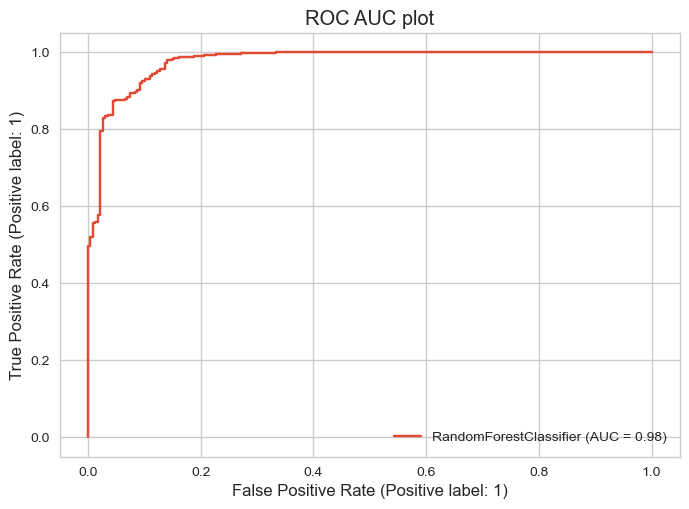

In [517]:
from sklearn.metrics import plot_roc_curve, auc 

plot_roc_curve(GCV.best_estimator_,X_test,y_test)
plt.title("ROC AUC plot")
plt.show()

# Pickeling of file or serialization of a file:

In [518]:
import joblib
joblib.dump(GCV.best_estimator_,"Term_Deposit.pkl")

['Term_Deposit.pkl']